# Import library and Dataset

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import json
import zipfile
import os
from pathlib import Path
api_token = {"username":"rattapornk","key":"9a9017f57e099d1b52bfccf94afccf30"}
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_token,handl)

In [ ]:
! kaggle datasets download -d rattapornk/memcat-datacat

  0% 0.00/255k [00:00<?, ?B/s]
100% 255k/255k [00:00<00:00, 110MB/s]


In [ ]:
! unzip /content/memcat-datacat.zip

Archive:  /content/memcat-datacat.zip
  inflating: animal.csv              
  inflating: food.csv                
  inflating: landscape.csv           
  inflating: sports.csv              
  inflating: vehicle.csv             


In [ ]:
!kaggle datasets download -d rattapornk/memcat-split-csv

  0% 0.00/66.1k [00:00<?, ?B/s]
100% 66.1k/66.1k [00:00<00:00, 65.2MB/s]


In [ ]:
! unzip /content/memcat-split-csv.zip

Archive:  /content/memcat-split-csv.zip
  inflating: test_animal_new.csv     
  inflating: test_food_new.csv       
  inflating: test_landscape_new.csv  
  inflating: train_animal_new.csv    
  inflating: train_food_new.csv      
  inflating: train_landscape_new.csv  
  inflating: val_animal_new.csv      
  inflating: val_food_new.csv        
  inflating: val_landscape_new.csv   


In [ ]:
! kaggle datasets download -d rattapornk/memcat-cat

100% 1.09G/1.09G [00:18<00:00, 32.6MB/s]
100% 1.09G/1.09G [00:18<00:00, 63.1MB/s]


In [ ]:
! unzip /content/memcat-cat.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape/n09376198_10845.jpg  
  inflating: landscape/n09376198_10901.jpg  
  inflating: landscape/n09376198_11171.jpg  
  inflating: landscape/n09376198_11360.jpg  
  inflating: landscape/n09376198_12294.jpg  
  inflating: landscape/n09376198_12692.jpg  
  inflating: landscape/n09376198_13588.jpg  
  inflating: landscape/n09376198_13928.jpg  
  inflating: landscape/n09376198_1396.jpg  
  inflating: landscape/n09376198_14485.jpg  
  inflating: landscape/n09376198_14571.jpg  
  inflating: landscape/n09376198_15308.jpg  
  inflating: landscape/n09376198_15319.jpg  
  inflating: landscape/n09376198_15467.jpg  
  inflating: landscape/n09376198_15858.jpg  
  inflating: landscape/n09376198_16065.jpg  
  inflating: landscape/n09376198_16253.jpg  
  inflating: landscape/n09376198_16513.jpg  
  inflating: landscape/n09376198_16757.jpg  
  inflating: landscape/n09376198_17428.jpg  
  inflating: landscape/n09376198_178.jpg  
  infla

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import cv2

import numpy as np
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision import transforms
import torchvision
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.utils import shuffle
import torchvision.models as models
import gc
from tqdm import tqdm
import torch.optim as optim
import random
import pandas as pd
from sklearn.utils import shuffle
import time

from transformers import ResNetConfig, ResNetModel
from transformers import AutoImageProcessor, ConvNextImageProcessor, ConvNextModel
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import timm

In [ ]:
! pip install torchsummary

In [ ]:
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
from scipy.stats import spearmanr
import time

# Preprocess & Split

In [ ]:
df_sports = pd.read_csv("/content/sports.csv")
df_sports["image_file"] =df_sports["image_file"].apply(lambda file: "/content/sports" +"/"+ file) # Create image path
df_sports["memorability_wo_fa_correction"] = df_sports["memorability_wo_fa_correction"].values.astype(np.float32)

In [ ]:
df_sports.head()

Unnamed: 0                        image_file category        subcategory  \
0        6001  /content/sports/000000021983.jpg   sports  American football   
1        6002  /content/sports/000000099336.jpg   sports  American football   
2        6003  /content/sports/000000124841.jpg   sports  American football   
3        6004  /content/sports/000000474255.jpg   sports  American football   
4        6005  /content/sports/000000546020.jpg   sports  American football   

   current_height  current_width source searched_label  resize_factor   H  FA  \
0           427.0          640.0   coco    sports ball            1.0  76  16   
1           425.0          640.0   coco    sports ball            1.0  82   3   
2           456.0          640.0   coco    sports ball            1.0  63   1   
3           480.0          640.0   coco    sports ball            1.0  86   0   
4           417.0          640.0   coco    sports ball            1.0  64   0   

   n_resp  memorability_wo_fa_correction  memorability_w_fa_correction  
0      93                       0.817204                      0.645161  
1      99                       0.828283                      0.797980  
2      91                       0.692308                      0.681319  
3     106                       0.811321                      0.811321  
4      97                       0.659794                      0.659794

Image shape: (2000, 224, 224, 3)
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 118.64765429023171
Standard deviation of pixel values: 67.84658216273661


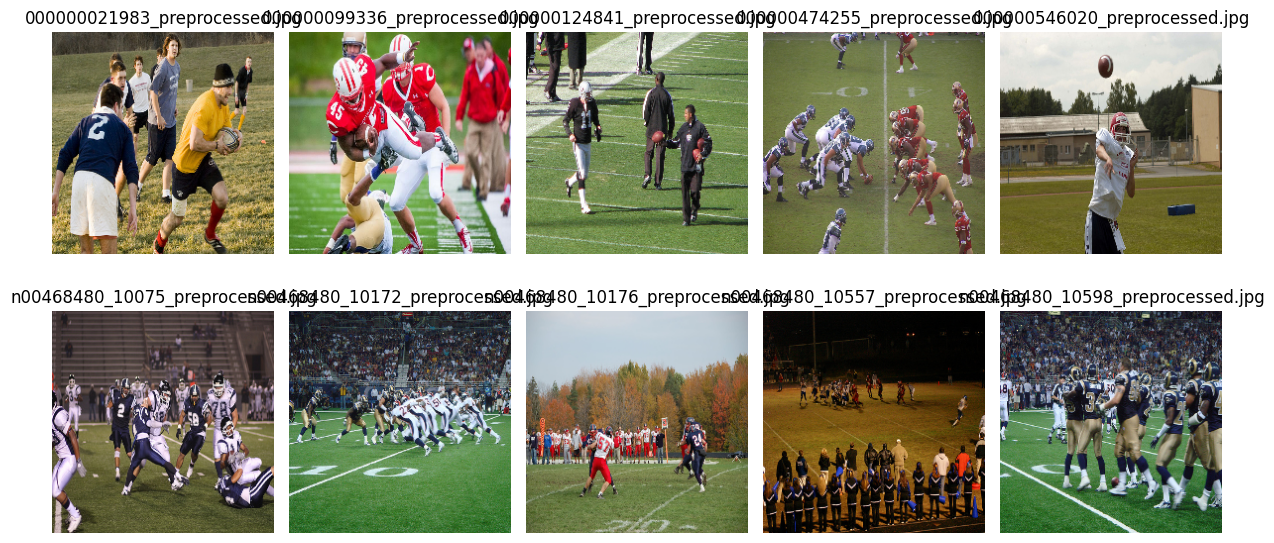

In [ ]:
# Sample data (replace this with your DataFrame)
df_sports = pd.DataFrame({
    'image_file': df_sports["image_file"],
    'memoscore': df_sports["memorability_wo_fa_correction"]
})

# Create a new column to store the paths of preprocessed images
df_sports['preprocessed_image_path'] = ''

# Empty lists to store preprocessed images
images = []

# Load and preprocess images
for index, row in df_sports.iterrows():
    image_path = row['image_file']
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error reading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize image if necessary

    # Save preprocessed image to the same path
    preprocessed_path = os.path.splitext(image_path)[0] + '_preprocessed.jpg'
    cv2.imwrite(preprocessed_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    # Store preprocessed image path in the DataFrame
    df_sports.at[index, 'preprocessed_image_path'] = preprocessed_path

    images.append(image)

# Convert the list of images into a NumPy array
images = np.array(images)

# Save preprocessed images as NumPy array (if needed)
#np.save('/content/drive/MyDrive/your_folder/preprocessed_images.npy', images)

# Calculate basic image statistics
print('Image shape:', images.shape)
print('Minimum pixel value:', np.min(images))
print('Maximum pixel value:', np.max(images))
print('Mean pixel value:', np.mean(images))
print('Standard deviation of pixel values:', np.std(images))

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(min(10, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(df_sports.at[i, 'preprocessed_image_path']))  # Display file name as title
plt.tight_layout()
plt.show()

# Display the updated DataFrame with preprocessed image paths
#print(df_landscape)

In [ ]:
df_sports.head()

image_file  memoscore  \
0  /content/sports/000000021983.jpg   0.817204   
1  /content/sports/000000099336.jpg   0.828283   
2  /content/sports/000000124841.jpg   0.692308   
3  /content/sports/000000474255.jpg   0.811321   
4  /content/sports/000000546020.jpg   0.659794   

                         preprocessed_image_path  
0  /content/sports/000000021983_preprocessed.jpg  
1  /content/sports/000000099336_preprocessed.jpg  
2  /content/sports/000000124841_preprocessed.jpg  
3  /content/sports/000000474255_preprocessed.jpg  
4  /content/sports/000000546020_preprocessed.jpg

In [ ]:
del df_sports["image_file"]

In [ ]:
df_sports.head()

memoscore                        preprocessed_image_path
0   0.817204  /content/sports/000000021983_preprocessed.jpg
1   0.828283  /content/sports/000000099336_preprocessed.jpg
2   0.692308  /content/sports/000000124841_preprocessed.jpg
3   0.811321  /content/sports/000000474255_preprocessed.jpg
4   0.659794  /content/sports/000000546020_preprocessed.jpg

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(pd.DataFrame(df_sports.drop('memoscore', axis=1)), pd.DataFrame(df_sports['memoscore']), test_size=0.1)

# Split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

# Print the train, validation, and test set sizes
print('Train set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test set size:', len(X_test))

Train set size: 1800
Validation set size: 100
Test set size: 100


In [ ]:
X_train.head()

preprocessed_image_path
1874  /content/sports/4575138b6f7a9772_preprocessed.jpg
1804  /content/sports/b81c309ace9a87e9_preprocessed.jpg
893   /content/sports/4656464d55472d7f_preprocessed.jpg
291   /content/sports/03f74f6c5682c786_preprocessed.jpg
1597      /content/sports/000000230863_preprocessed.jpg

In [ ]:
merged_train_sports= pd.concat([X_train, y_train], axis=1)
merged_train_sports

preprocessed_image_path  memoscore
1874  /content/sports/4575138b6f7a9772_preprocessed.jpg   0.785714
1804  /content/sports/b81c309ace9a87e9_preprocessed.jpg   0.836957
893   /content/sports/4656464d55472d7f_preprocessed.jpg   0.840000
291   /content/sports/03f74f6c5682c786_preprocessed.jpg   0.777778
1597      /content/sports/000000230863_preprocessed.jpg   0.820755
...                                                 ...        ...
896   /content/sports/4882db1a7d20bbe3_preprocessed.jpg   0.831169
1652      /content/sports/000000576630_preprocessed.jpg   0.765432
1653      /content/sports/000000002191_preprocessed.jpg   0.733333
1008  /content/sports/7e8f1095b4e20df9_preprocessed.jpg   0.810000
1683      /content/sports/000000122896_preprocessed.jpg   0.854369

[1800 rows x 2 columns]

In [ ]:
merged_val_sports = pd.concat([X_val, y_val], axis=1)
merged_val_sports

preprocessed_image_path  memoscore
122       /content/sports/000000484528_preprocessed.jpg   0.838384
1224    /content/sports/n00445351_6771_preprocessed.jpg   0.849057
1958  /content/sports/10802a3111e8ddd6_preprocessed.jpg   0.853933
1207   /content/sports/n00445351_13626_preprocessed.jpg   0.859504
1993  /content/sports/ca24144abcf2bb19_preprocessed.jpg   0.710526
...                                                 ...        ...
967   /content/sports/82f1a9e2176a2145_preprocessed.jpg   0.914894
815   /content/sports/3f18498b871d51ba_preprocessed.jpg   0.686957
1216    /content/sports/n00445351_5398_preprocessed.jpg   0.807018
585       /content/sports/000000056868_preprocessed.jpg   0.609756
1119  /content/sports/bdee38873a2c3482_preprocessed.jpg   0.904762

[100 rows x 2 columns]

In [ ]:
merged_test_sports = pd.concat([X_test, y_test], axis=1)
merged_test_sports

preprocessed_image_path  memoscore
866   /content/sports/eb2406b3c32c6eb4_preprocessed.jpg   0.820755
756   /content/sports/64d859e02180217e_preprocessed.jpg   0.878788
602       /content/sports/000000211737_preprocessed.jpg   0.767677
1907  /content/sports/af37e50ad04c4749_preprocessed.jpg   0.790698
1270  /content/sports/87733c5baa723da3_preprocessed.jpg   0.784091
...                                                 ...        ...
635   /content/sports/02214e9e87af8091_preprocessed.jpg   0.834711
52    /content/sports/dc58527c9d626af4_preprocessed.jpg   0.821429
1423      /content/sports/000000291373_preprocessed.jpg   0.750000
1660      /content/sports/000000039098_preprocessed.jpg   0.772277
59        /content/sports/000000013195_preprocessed.jpg   0.794393

[100 rows x 2 columns]

# Save CSV To GGDrive

In [ ]:
# บันทึกตารางเป็นไฟล์ CSV
csv_train_sports = '/content/drive/MyDrive/IS/MemCat_data/dataproject/train/sports_ResNet.csv'
merged_train_sports.to_csv(csv_train_sports, index=False)

In [ ]:
csv_val_sports = '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/sports_ResNet.csv'
merged_val_sports.to_csv(csv_val_sports, index=False)

In [ ]:
csv_test_sports = '/content/drive/MyDrive/IS/MemCat_data/dataproject/test/sports_ResNet.csv'
merged_test_sports.to_csv(csv_test_sports, index=False)

#Load Dataset

In [ ]:
df_train_sports = pd.read_csv("/content/drive/MyDrive/IS/MemCat_data/dataproject/train/sports_ResNet.csv")
df_val_sports = pd.read_csv( '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/sports_ResNet.csv')
df_test_sports = pd.read_csv('/content/drive/MyDrive/IS/MemCat_data/dataproject/test/sports_ResNet.csv')

In [ ]:
df_train_sports.head()

preprocessed_image_path  memoscore
0  /content/sports/8cf8644a06d41d6a_preprocessed.jpg   0.804348
1      /content/sports/000000135959_preprocessed.jpg   0.897727
2  /content/sports/f99a36f6710cbaa5_preprocessed.jpg   0.847826
3  /content/sports/9ad90193550e2037_preprocessed.jpg   0.851485
4  /content/sports/b5678b52b307cb83_preprocessed.jpg   0.858491

In [ ]:
df_train_sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   preprocessed_image_path  1800 non-null   object 
 1   memoscore                1800 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


#Load Pretrain

In [ ]:
# Define function to add data/model in to GPU (cuda)
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    # if data is list or tuple, move each of them to device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device) -> None:
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            # yield only execuate when the function is called
            yield to_device(b, self. device)

    def __len__(self):
        return len(self.dl)

## Train

In [ ]:
class Dataset_res_sports(Dataset):
    def __init__(self, df,Resnet_transform =None):
        self.labels = df_train_sports["memoscore"]
        self.images = df_train_sports["preprocessed_image_path"]
        self.Resnet_transform  = Resnet_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.Resnet_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
#trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
Resnet_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds = Dataset_res_sports(df_train_sports, Resnet_transform =Resnet_transform )
train_dl = DataLoader(train_ds, batch_size=32, shuffle=False)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
class ResNet_model_train_sports(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):    #microsoft/resnet-50
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)
        #self.res_AdaptiveAvgPool = nn.AdaptiveAvgPool2d((1, None))


    def forward(self, x):
        resfeat = self.res(x)
        #adap = self.res_AdaptiveAvgPool(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res =  ResNet_model_train_sports( arch="resnet50.a1_in1k")


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [ ]:
# Assuming your model is an instance of YourModelClass and is already on GPU
model =ResNet_model_train_sports().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
model_res  = to_device(model_res  , device)

In [ ]:
params = [param for param in list(model_res.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-5)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res, train_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(50, model_res , train_dl)
torch.save(model_res.state_dict(), "model_weights_1")

In [ ]:
true_values_list = []
predicted_values_list = []

for x_trans, yb in train_dl:
    preds = model_res(x_trans)
    true_values_list.extend(yb.cpu().detach().numpy())
    predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_sports' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_train_sports['preprocessed_image_path'],
    'True Value': true_values_list,  # Replace with your actual true values
    'Predicted Value': predicted_values_list  # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)



                                             Image Path  True Value  \
0     /content/sports/8cf8644a06d41d6a_preprocessed.jpg    0.804348   
1         /content/sports/000000135959_preprocessed.jpg    0.897727   
2     /content/sports/f99a36f6710cbaa5_preprocessed.jpg    0.847826   
3     /content/sports/9ad90193550e2037_preprocessed.jpg    0.851485   
4     /content/sports/b5678b52b307cb83_preprocessed.jpg    0.858491   
...                                                 ...         ...   
1795  /content/sports/7374801616e3a84f_preprocessed.jpg    0.857143   
1796  /content/sports/b758d8693bf30491_preprocessed.jpg    0.673267   
1797  /content/sports/1f92541b4f439e51_preprocessed.jpg    0.937500   
1798  /content/sports/313e3ff66d04b28a_preprocessed.jpg    0.673267   
1799      /content/sports/000000018444_preprocessed.jpg    0.896907   

      Predicted Value  
0            0.805211  
1            0.898314  
2            0.849547  
3            0.852571  
4            0.860184  
...

In [ ]:
from prettytable import PrettyTable

# Assuming 'df_result' is your DataFrame
# The 'Image Path' column should contain the paths to your images

# Create a PrettyTable instance
table = PrettyTable()

# Add column names
table.field_names = df_result.columns.tolist()

# Add rows
for _, row in df_result.iterrows():
    table.add_row(row.tolist())

# Display the table
print(table)

+---------------------------------------------------+------------+--------------------+
|                     Image Path                    | True Value |  Predicted Value   |
+---------------------------------------------------+------------+--------------------+
| /content/sports/8cf8644a06d41d6a_preprocessed.jpg | 0.8043478  | 0.8052111268043518 |
|   /content/sports/000000135959_preprocessed.jpg   | 0.89772725 | 0.8983136415481567 |
| /content/sports/f99a36f6710cbaa5_preprocessed.jpg | 0.84782606 | 0.8495474457740784 |
| /content/sports/9ad90193550e2037_preprocessed.jpg | 0.85148513 | 0.8525714874267578 |
| /content/sports/b5678b52b307cb83_preprocessed.jpg | 0.8584906  | 0.8601835370063782 |
| /content/sports/80f83da8bdc0ae70_preprocessed.jpg | 0.8595041  | 0.8602502346038818 |
|   /content/sports/000000067084_preprocessed.jpg   | 0.83908045 | 0.8404297828674316 |
|   /content/sports/000000060904_preprocessed.jpg   | 0.77319586 | 0.7738655209541321 |
| /content/sports/84e3ccf7d57f3b

## Valid

In [ ]:
class Dataset_val_resnet_sports(Dataset):
    def __init__(self, df,res_transform=None):
        self.labels = df_val_sports["memoscore"]
        self.images = df_val_sports["preprocessed_image_path"]
        self.res_transform = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform(image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
val_ds =Dataset_val_resnet_sports(df_val_sports,res_transform=res_transform)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
class ResNet_model_val_sports(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)


    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_val =  ResNet_model_val_sports( arch="resnet50.a1_in1k")

In [ ]:


# Assuming your model is an instance of YourModelClass and is already on GPU
model = ResNet_model_val_sports().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
device = get_default_device()
val_dl = DeviceDataLoader(val_dl, device)
model_res_val  = to_device(model_res_val  , device)

In [ ]:
params = [param for param in list(model_res_val.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-5)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
#Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values_val, predicted_values_val, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values_val, predicted_values_val, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values_val')
    plt.ylabel('Predicted Values_val')
    plt.grid(True)
    plt.show()


def fit(epochs,model_res_val , val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model_res_val .train()
        batch_num = 16
        true_values_list_val = []
        predicted_values_list_val = []

        for x_trans, yb in val_dl :

            total_loss_val = 0
            total_loss_rmse_val = 0
            total_r2_val = 0
            total_mae_val = 0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get val
            preds = model_res_val (x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list_val.extend(yb.cpu().detach().numpy())
            predicted_values_list_val.extend(preds.squeeze().cpu().detach().numpy())


            # Calculate Spearman correlation coefficient
            #spearman_corr, _ = spearmanr(preds.squeeze().cpu().detach().numpy(), yb.cpu().detach().numpy())

            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss_val += loss.item()
            total_loss_rmse_val += loss_rmse.item()
            total_r2_val += r2.item()
            total_mae_val += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            batch_num += 10

        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss_val, total_loss_rmse_val)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2_val / batch_num
        mean_mae = total_mae_val / batch_num
        #mean_spearman = total_spearman / batch_num


        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_val = {total_loss_val}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse_val  = {total_loss_rmse_val}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2_val  = {total_r2_val}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE_val  = {total_mae_val}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')


        # Plot scatter plot after each epoch
        plot_scatter(true_values_list_val, predicted_values_list_val, epoch)

In [ ]:
# val the model and save weights
fit(150, model_res_val , val_dl )
torch.save(model_res_val .state_dict(), "model_weights_s")

In [ ]:
true_values_list_val = []
predicted_values_list_val = []

for x_trans, yb in val_dl:
    preds = model_res_val(x_trans)
    true_values_list_val.extend(yb.cpu().detach().numpy())
    predicted_values_list_val.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_sports' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_val_sports['preprocessed_image_path'],
    'True Value': true_values_list_val,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_val # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                           Image Path  True Value  \
0   /content/sports/121794a37b3aab8b_preprocessed.jpg    0.796460   
1       /content/sports/000000166376_preprocessed.jpg    0.839623   
2   /content/sports/544cf56975736880_preprocessed.jpg    0.806452   
3   /content/sports/cc89a78d3c9dbb26_preprocessed.jpg    0.901961   
4       /content/sports/000000170208_preprocessed.jpg    0.621359   
..                                                ...         ...   
95  /content/sports/3e7d95d9fd61b760_preprocessed.jpg    0.873684   
96      /content/sports/000000257387_preprocessed.jpg    0.854167   
97  /content/sports/9f10eef51818ce72_preprocessed.jpg    0.967391   
98  /content/sports/19b4672fc09b7f74_preprocessed.jpg    0.782609   
99  /content/sports/a35f36389c0cac44_preprocessed.jpg    0.854167   

    Predicted Value  
0          0.738913  
1          0.790034  
2          0.745981  
3          0.797781  
4          0.626115  
..              ...  
95         0.7969

## Test

In [ ]:
df_test_sports.head()


preprocessed_image_path  memoscore
0  /content/sports/94ca4d01f90bef1c_preprocessed.jpg   0.715909
1  /content/sports/f8c03a5c3f92c873_preprocessed.jpg   0.739130
2  /content/sports/d6686aeee94c1def_preprocessed.jpg   0.580952
3  /content/sports/4575138b6f7a9772_preprocessed.jpg   0.785714
4  /content/sports/b8942e8ca4682cb2_preprocessed.jpg   0.742857

In [ ]:
class Dataset_test_res_sports(Dataset):
    def __init__(self, df, res_transform =None):
        self.labels = df_test_sports["memoscore"]
        self.images = df_test_sports["preprocessed_image_path"]
        self.res_transform  = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
test_ds = Dataset_test_res_sports(df_test_sports, res_transform =res_transform )
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

In [ ]:
print(test_ds)

In [ ]:
class Resnet_model_test_res_sports(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)

    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_test = Resnet_model_test_res_sports( arch="resnet50.a1_in1k")

In [ ]:
device = get_default_device()
test_dl = DeviceDataLoader(test_dl, device)
model_res_test  = to_device(model_res_test  , device)

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad ]
optimizer = torch.optim.Adam(params, lr=1e-5)   #,weight_decay=1e-7

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:1056: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)



 Epoch: (1/50) Loss = 0.11328694224357605

 Epoch: (1/50) Loss_rmse = 0.3365812599658966

 Epoch: (1/50) R^2 = -2.4918031692504883

 Epoch: (1/50) MAE = 0.29166150093078613
Spearman correlation coefficient: SignificanceResult(statistic=0.039324871049963614, pvalue=0.7036459986077361)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666666

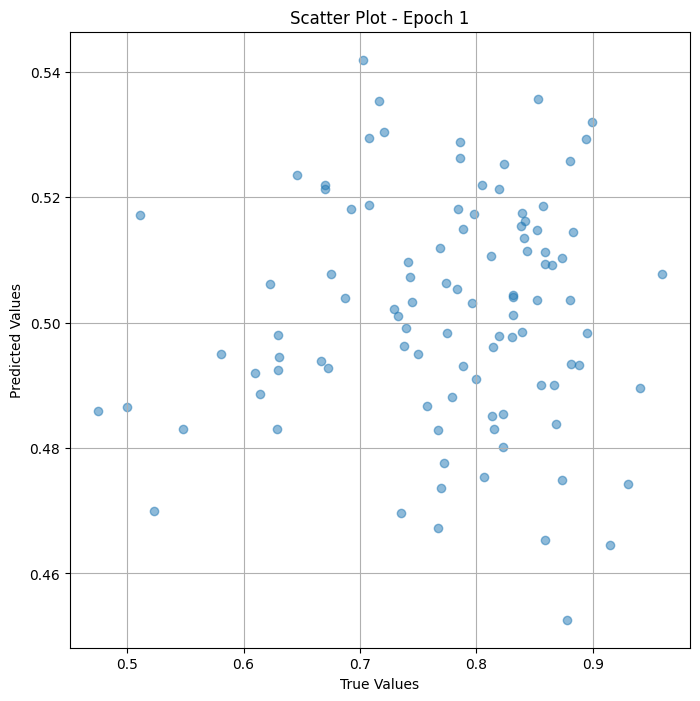

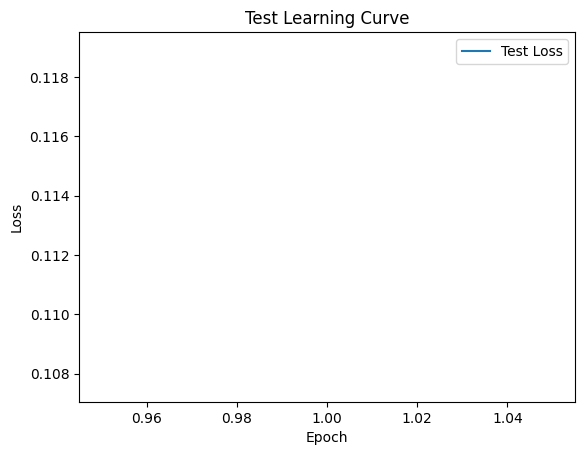


 Epoch: (2/50) Loss = 0.10737603902816772

 Epoch: (2/50) Loss_rmse = 0.32768282294273376

 Epoch: (2/50) R^2 = -2.3096134662628174

 Epoch: (2/50) MAE = 0.28446751832962036
Spearman correlation coefficient: SignificanceResult(statistic=0.05957060062639366, pvalue=0.5642523485945592)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666666

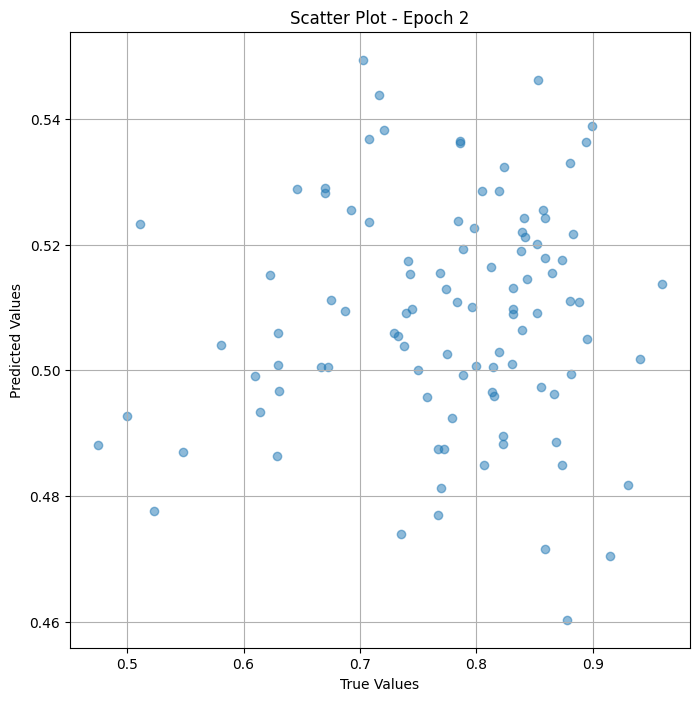

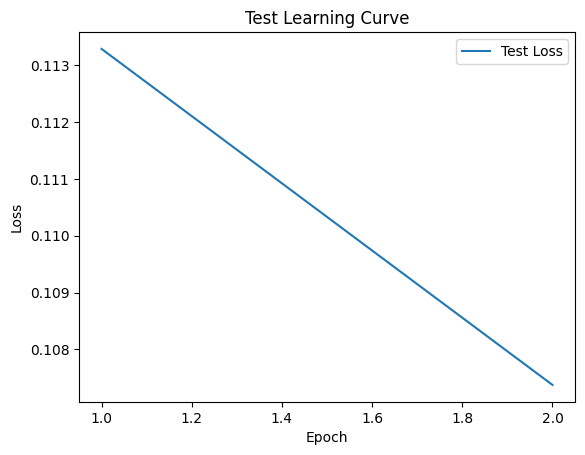


 Epoch: (3/50) Loss = 0.10157963633537292

 Epoch: (3/50) Loss_rmse = 0.3187156021595001

 Epoch: (3/50) R^2 = -2.130953073501587

 Epoch: (3/50) MAE = 0.27722179889678955
Spearman correlation coefficient: SignificanceResult(statistic=0.0659732702143836, pvalue=0.5230622716910083)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666665, 

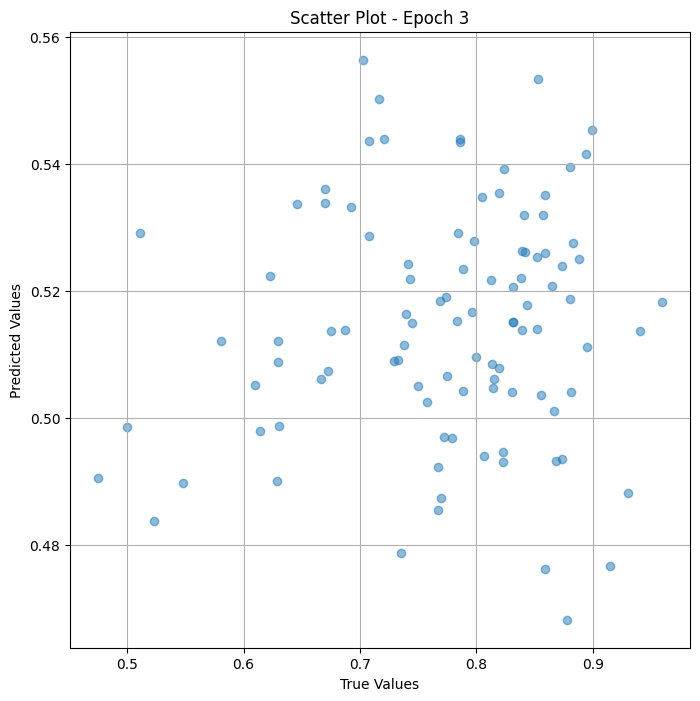

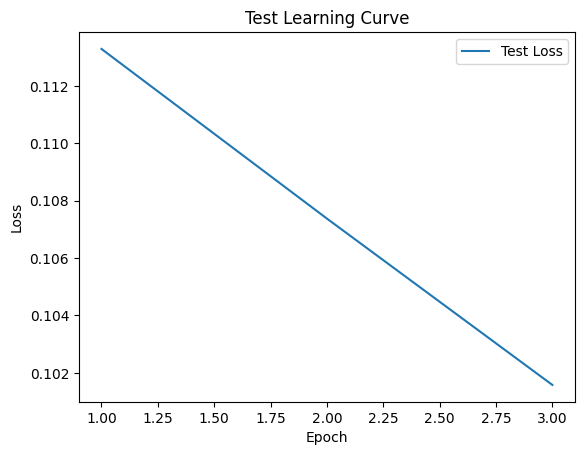


 Epoch: (4/50) Loss = 0.09618310630321503

 Epoch: (4/50) Loss_rmse = 0.31013402342796326

 Epoch: (4/50) R^2 = -1.9646177291870117

 Epoch: (4/50) MAE = 0.2702384293079376
Spearman correlation coefficient: SignificanceResult(statistic=0.07632334838310462, pvalue=0.459848656068501)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666665,

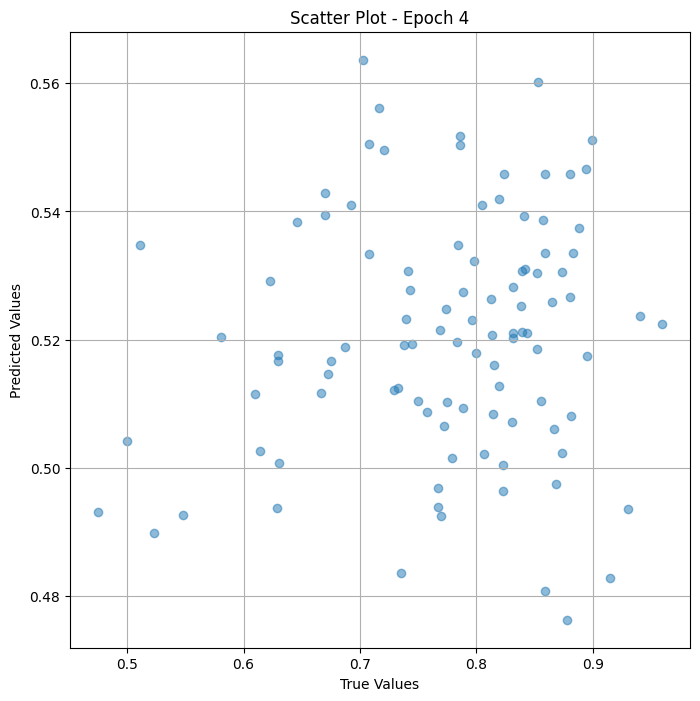

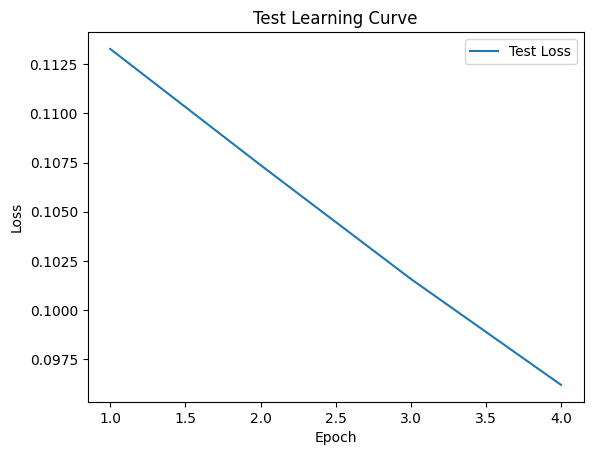


 Epoch: (5/50) Loss = 0.09099435061216354

 Epoch: (5/50) Loss_rmse = 0.3016526997089386

 Epoch: (5/50) R^2 = -1.8046865463256836

 Epoch: (5/50) MAE = 0.26331305503845215
Spearman correlation coefficient: SignificanceResult(statistic=0.08303801246372965, pvalue=0.42120313700109957)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666666

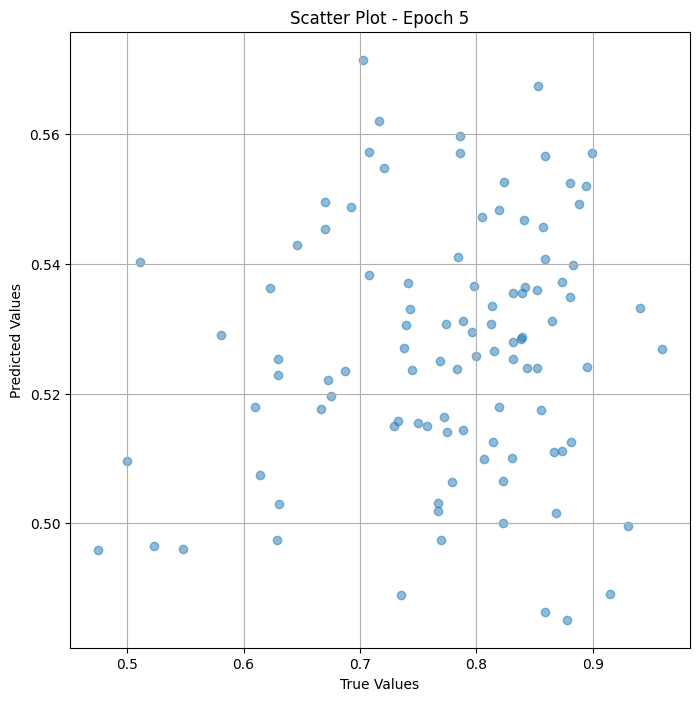

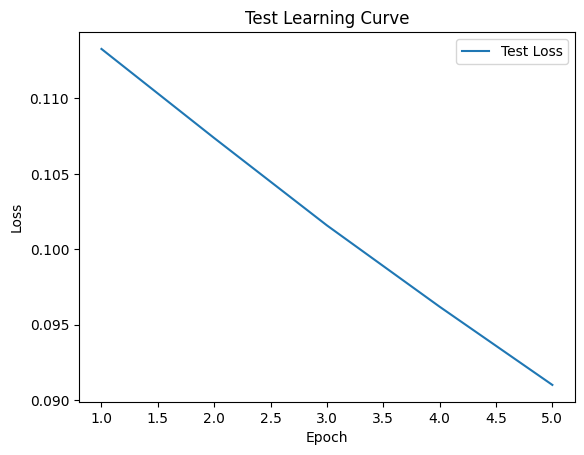


 Epoch: (6/50) Loss = 0.08571028709411621

 Epoch: (6/50) Loss_rmse = 0.29276320338249207

 Epoch: (6/50) R^2 = -1.641817569732666

 Epoch: (6/50) MAE = 0.2559354305267334
Spearman correlation coefficient: SignificanceResult(statistic=0.0846793747945491, pvalue=0.41205004589992045)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666665,

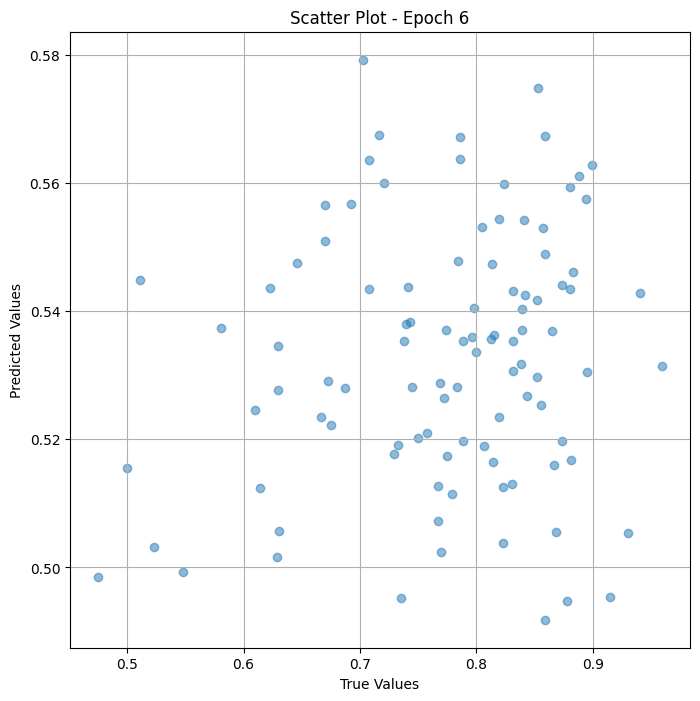

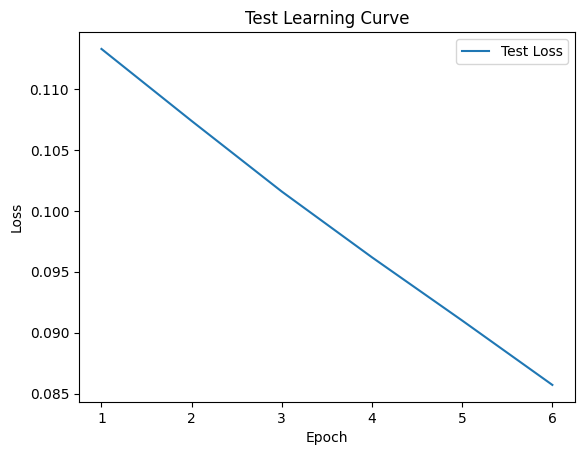


 Epoch: (7/50) Loss = 0.08041109889745712

 Epoch: (7/50) Loss_rmse = 0.28356850147247314

 Epoch: (7/50) R^2 = -1.478482723236084

 Epoch: (7/50) MAE = 0.24820974469184875
Spearman correlation coefficient: SignificanceResult(statistic=0.0859477002320005, pvalue=0.40505738524476187)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666665

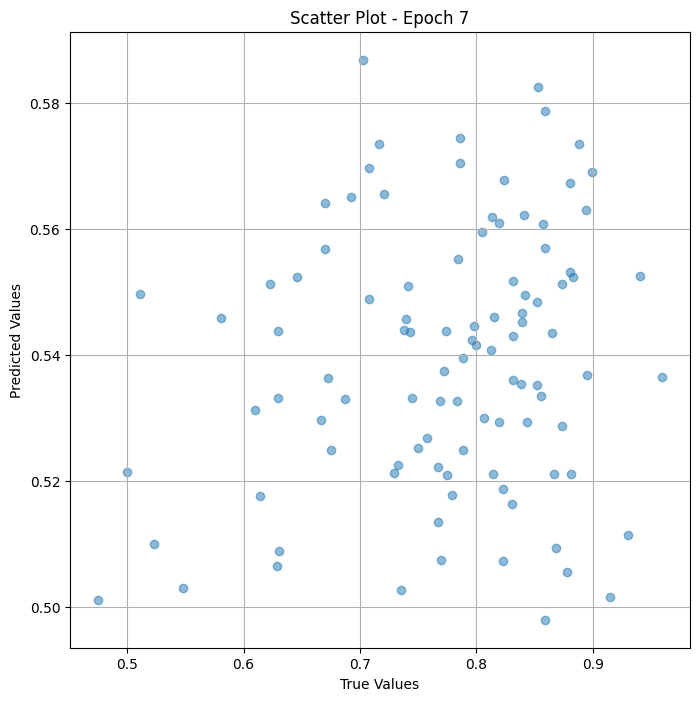

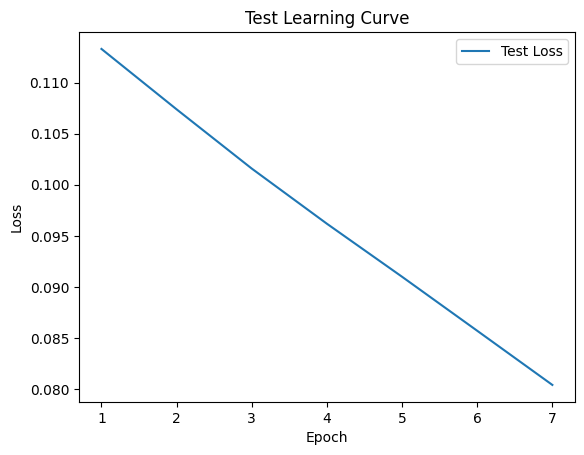


 Epoch: (8/50) Loss = 0.07484740763902664

 Epoch: (8/50) Loss_rmse = 0.2735825479030609

 Epoch: (8/50) R^2 = -1.306994915008545

 Epoch: (8/50) MAE = 0.239732027053833
Spearman correlation coefficient: SignificanceResult(statistic=0.09321852840819247, pvalue=0.36633701818419206)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666665, 

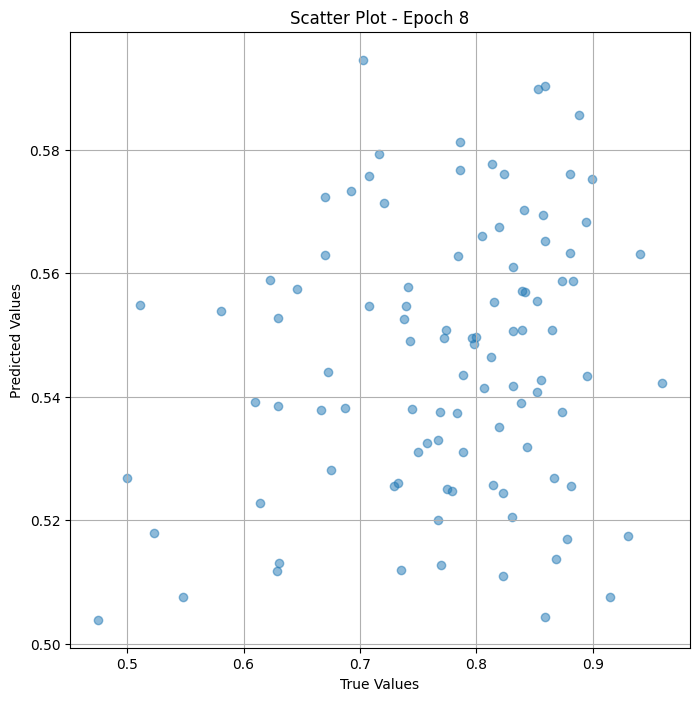

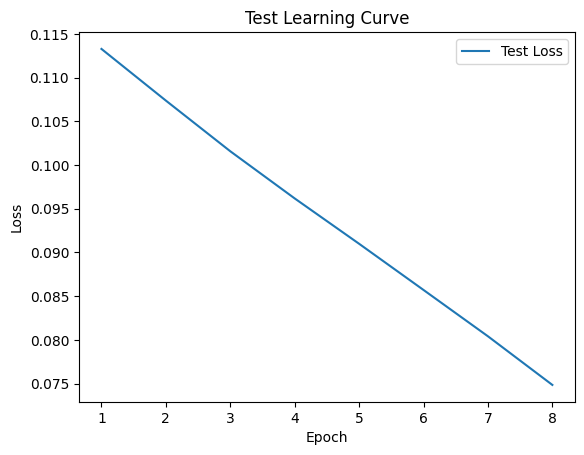


 Epoch: (9/50) Loss = 0.06930629909038544

 Epoch: (9/50) Loss_rmse = 0.2632609009742737

 Epoch: (9/50) R^2 = -1.1362032890319824

 Epoch: (9/50) MAE = 0.23091018199920654
Spearman correlation coefficient: SignificanceResult(statistic=0.10881825303994762, pvalue=0.29125711411567634)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666666

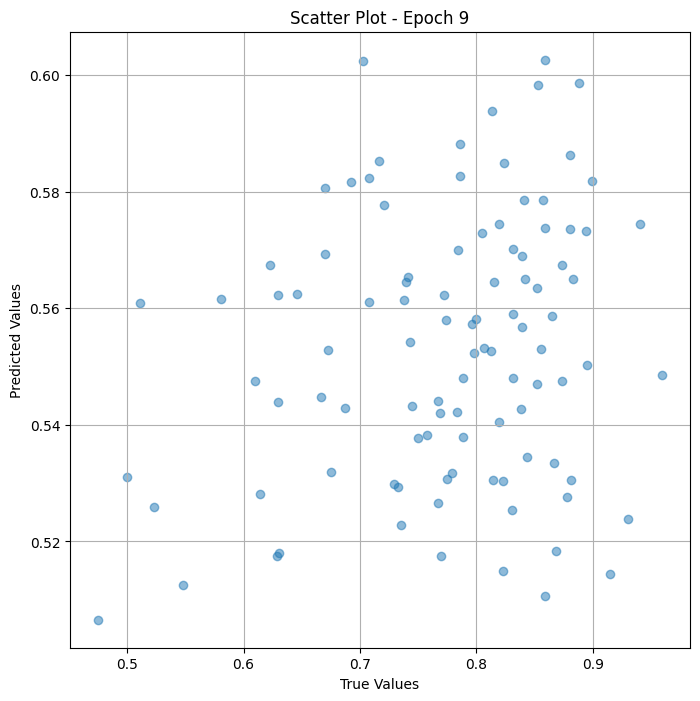

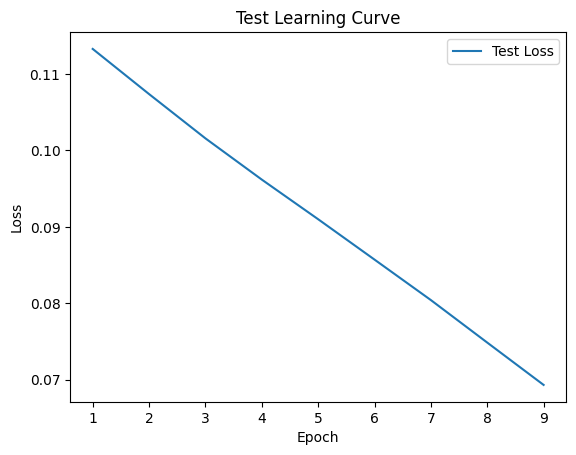


 Epoch: (10/50) Loss = 0.06397157907485962

 Epoch: (10/50) Loss_rmse = 0.2529260218143463

 Epoch: (10/50) R^2 = -0.9717732667922974

 Epoch: (10/50) MAE = 0.22206032276153564
Spearman correlation coefficient: SignificanceResult(statistic=0.1163332508190714, pvalue=0.25900982926919863)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666

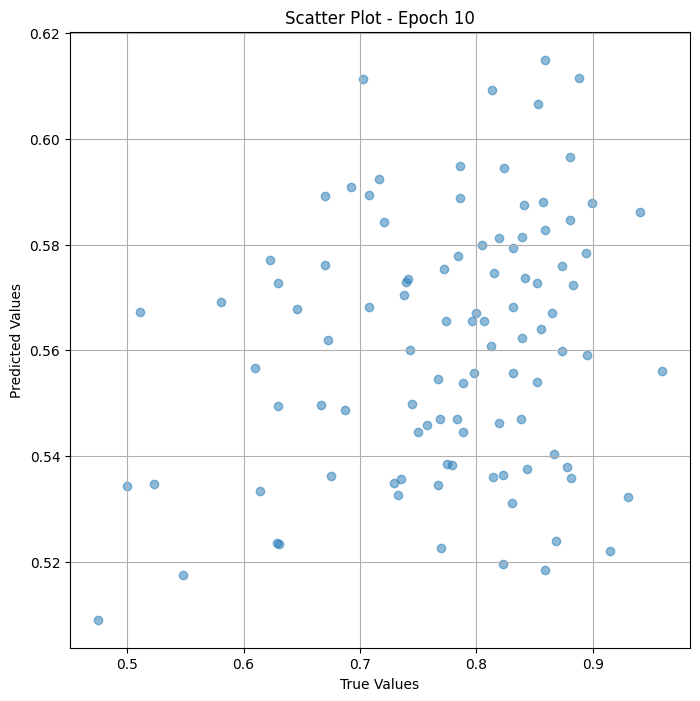

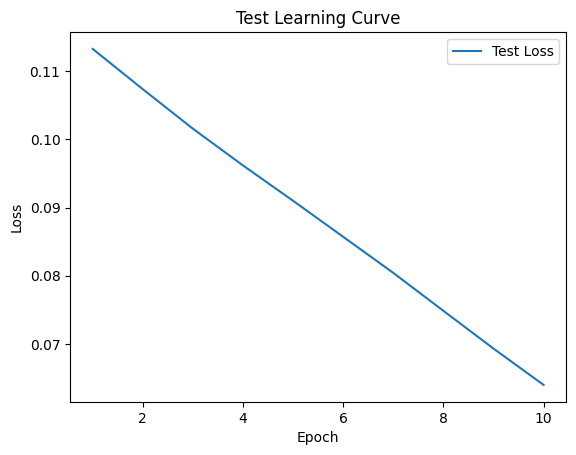


 Epoch: (11/50) Loss = 0.058392200618982315

 Epoch: (11/50) Loss_rmse = 0.24164478480815887

 Epoch: (11/50) R^2 = -0.7998020648956299

 Epoch: (11/50) MAE = 0.21269553899765015
Spearman correlation coefficient: SignificanceResult(statistic=0.1275379225980538, pvalue=0.21560262423605184)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

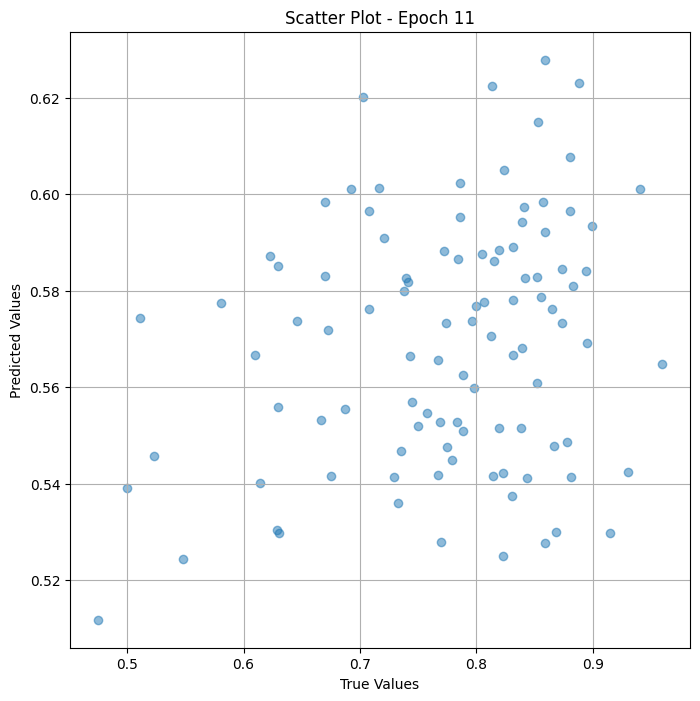

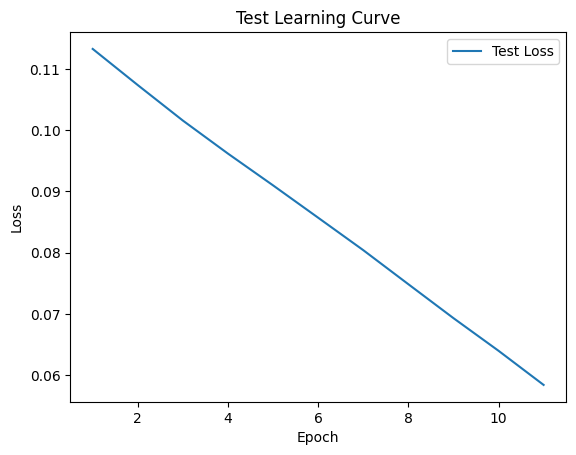


 Epoch: (12/50) Loss = 0.05302596464753151

 Epoch: (12/50) Loss_rmse = 0.23027367889881134

 Epoch: (12/50) R^2 = -0.634400486946106

 Epoch: (12/50) MAE = 0.20346087217330933
Spearman correlation coefficient: SignificanceResult(statistic=0.13098342699498058, pvalue=0.2033564300824211)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666

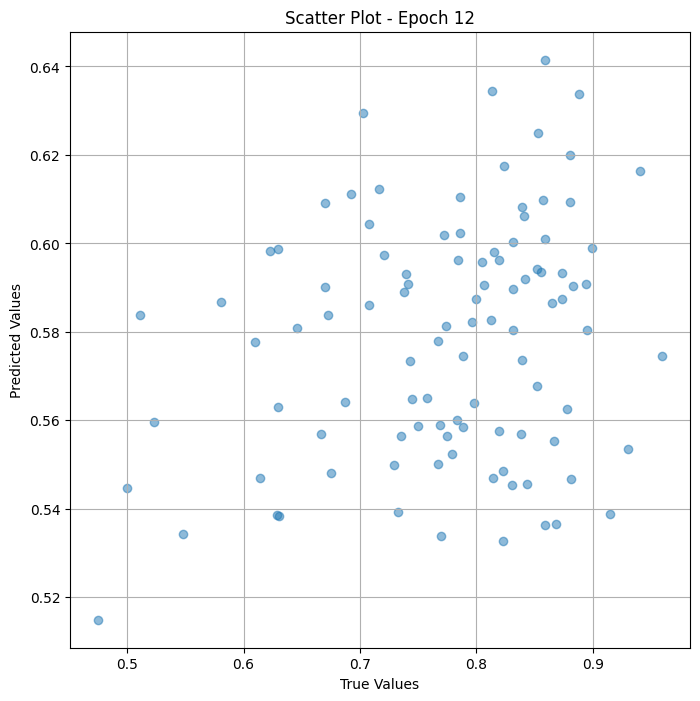

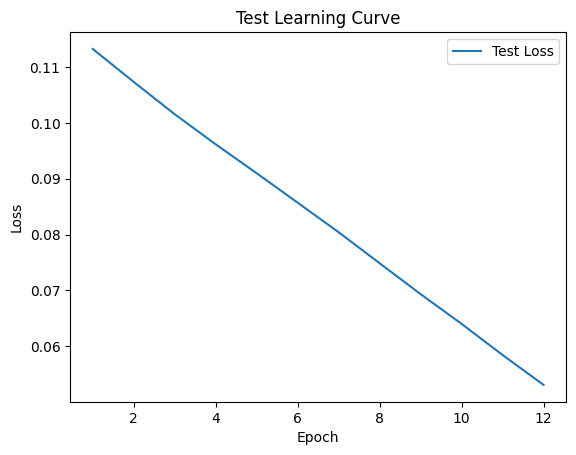


 Epoch: (13/50) Loss = 0.047386251389980316

 Epoch: (13/50) Loss_rmse = 0.2176838368177414

 Epoch: (13/50) R^2 = -0.4605696201324463

 Epoch: (13/50) MAE = 0.19342175126075745
Spearman correlation coefficient: SignificanceResult(statistic=0.13794904316750778, pvalue=0.1801376359919719)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.766

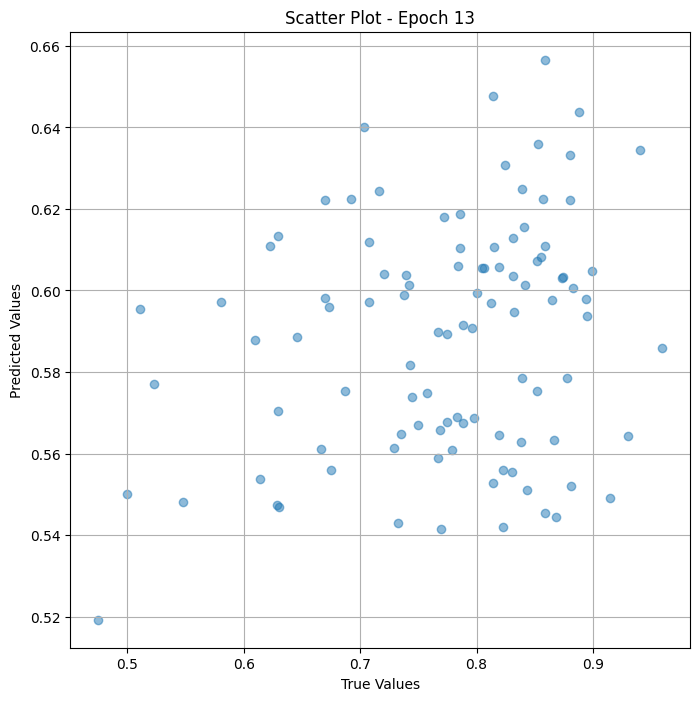

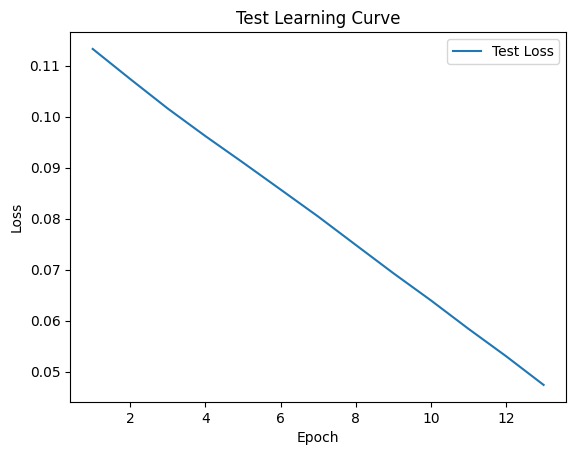


 Epoch: (14/50) Loss = 0.042041510343551636

 Epoch: (14/50) Loss_rmse = 0.20504026114940643

 Epoch: (14/50) R^2 = -0.29583048820495605

 Epoch: (14/50) MAE = 0.18331581354141235
Spearman correlation coefficient: SignificanceResult(statistic=0.1454233460128096, pvalue=0.1574457448789401)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

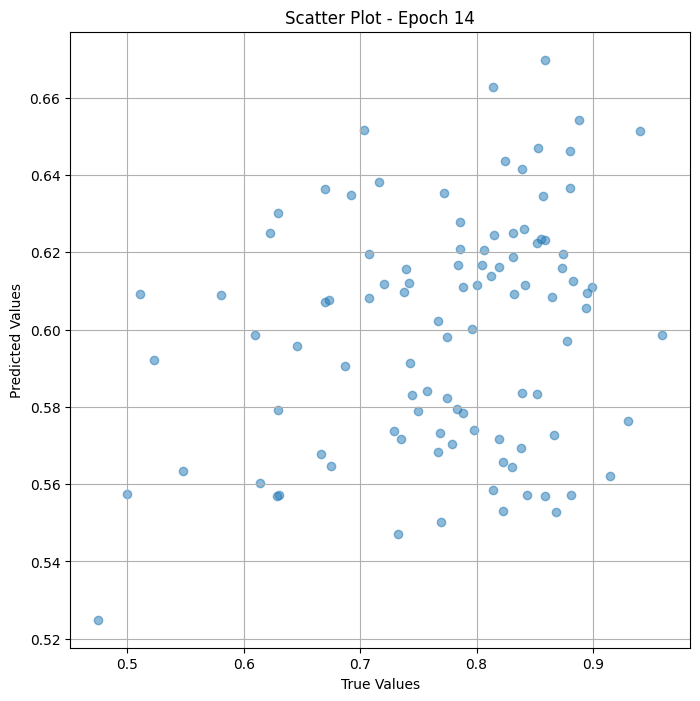

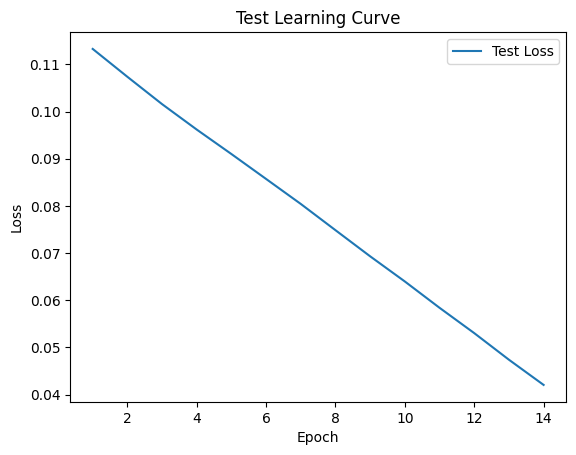


 Epoch: (15/50) Loss = 0.03727985918521881

 Epoch: (15/50) Loss_rmse = 0.19307993352413177

 Epoch: (15/50) R^2 = -0.1490638256072998

 Epoch: (15/50) MAE = 0.17369043827056885
Spearman correlation coefficient: SignificanceResult(statistic=0.14425675790991313, pvalue=0.1608397175585969)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.766

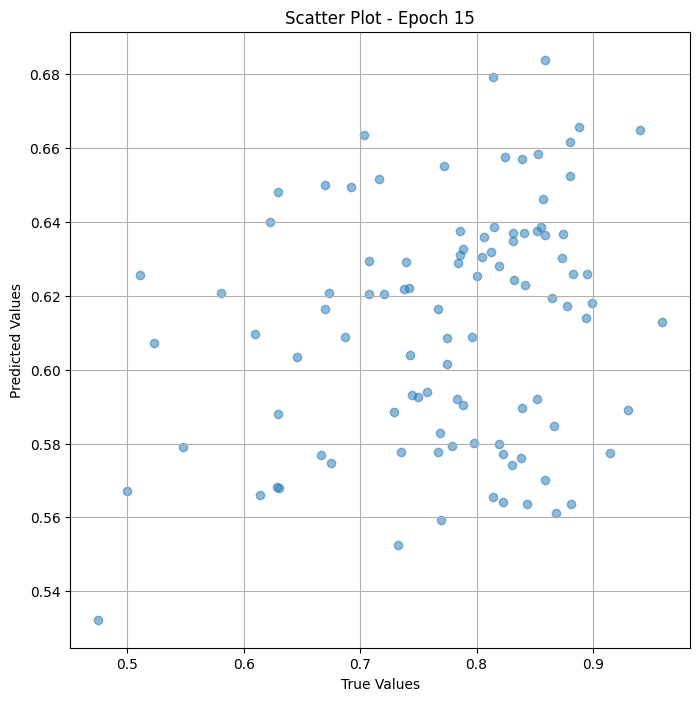

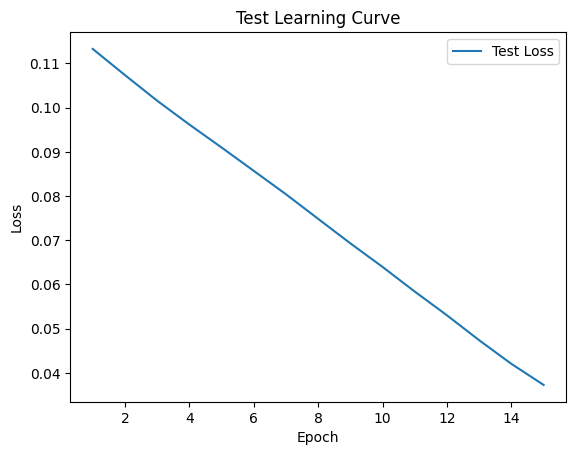


 Epoch: (16/50) Loss = 0.032913289964199066

 Epoch: (16/50) Loss_rmse = 0.1814202070236206

 Epoch: (16/50) R^2 = -0.014474630355834961

 Epoch: (16/50) MAE = 0.16453465819358826
Spearman correlation coefficient: SignificanceResult(statistic=0.1449960492076789, pvalue=0.15868263370218622)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

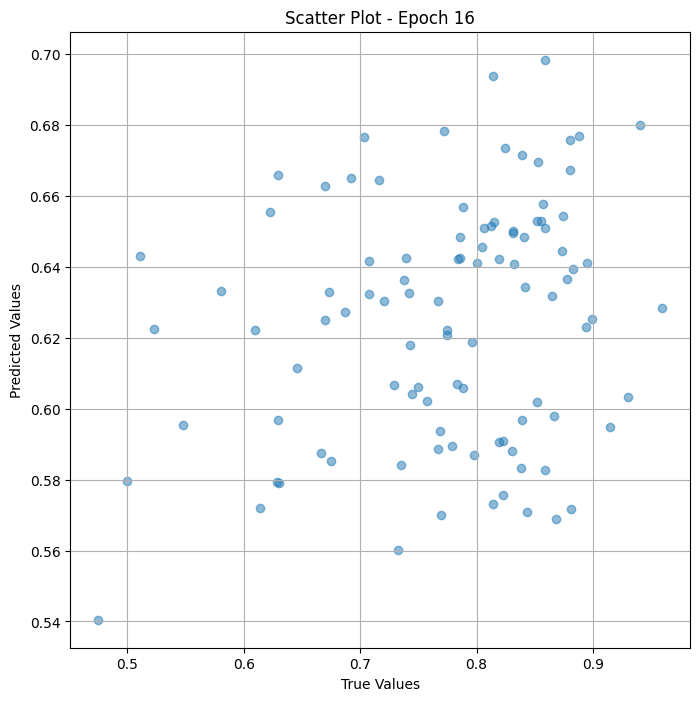

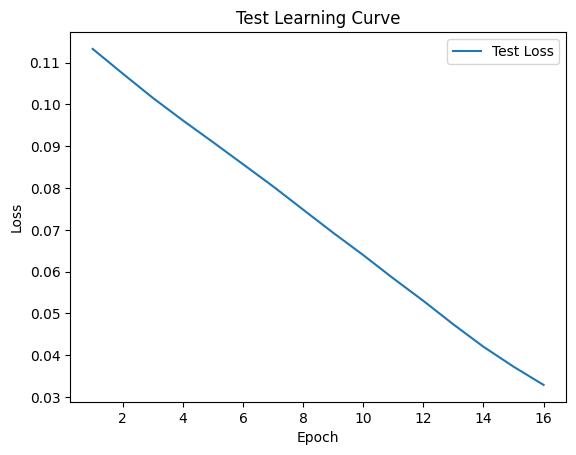


 Epoch: (17/50) Loss = 0.028764622285962105

 Epoch: (17/50) Loss_rmse = 0.16960136592388153

 Epoch: (17/50) R^2 = 0.11339825391769409

 Epoch: (17/50) MAE = 0.1553376019001007
Spearman correlation coefficient: SignificanceResult(statistic=0.14944536197221425, pvalue=0.14615347013530597)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

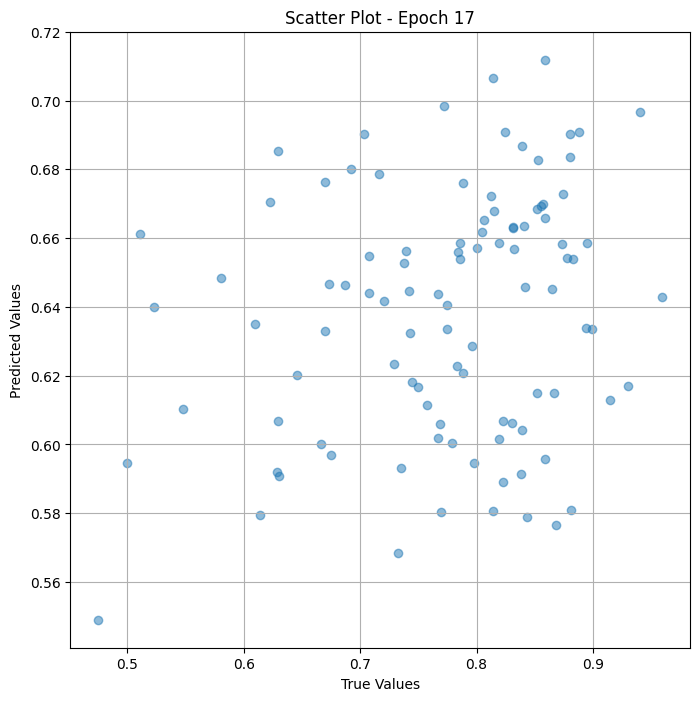

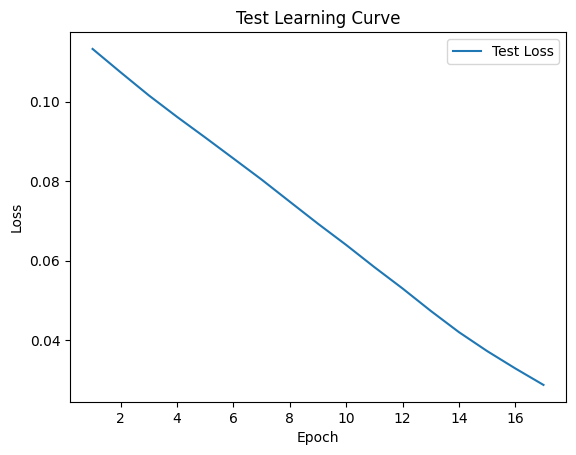


 Epoch: (18/50) Loss = 0.024910274893045425

 Epoch: (18/50) Loss_rmse = 0.1578298956155777

 Epoch: (18/50) R^2 = 0.23219949007034302

 Epoch: (18/50) MAE = 0.14595487713813782
Spearman correlation coefficient: SignificanceResult(statistic=0.148923110321499, pvalue=0.14758429975028683)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666

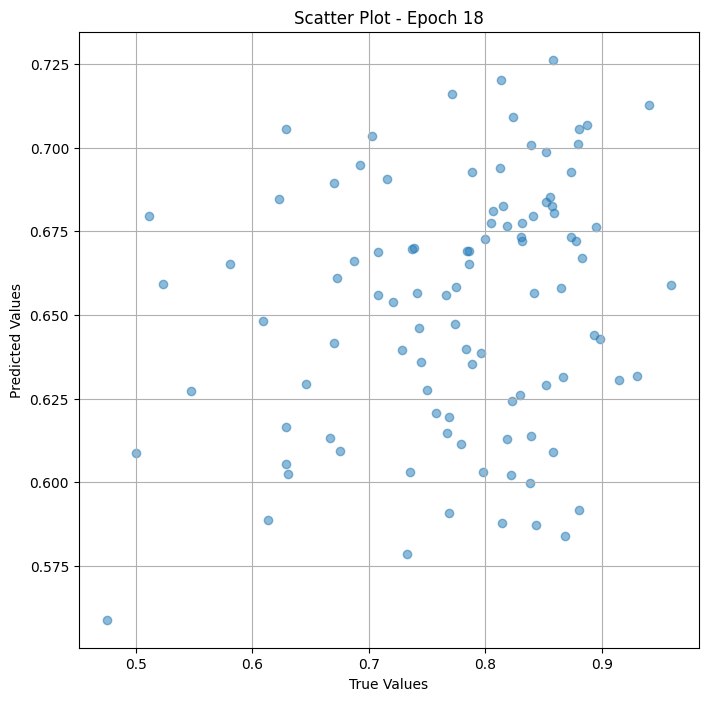

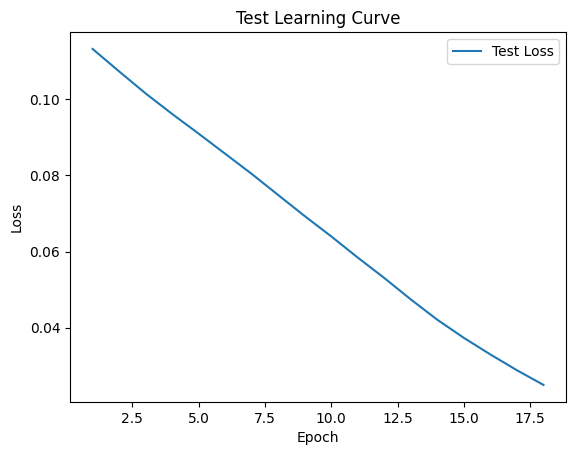


 Epoch: (19/50) Loss = 0.02135694958269596

 Epoch: (19/50) Loss_rmse = 0.1461401730775833

 Epoch: (19/50) R^2 = 0.34172236919403076

 Epoch: (19/50) MAE = 0.1358771026134491
Spearman correlation coefficient: SignificanceResult(statistic=0.14077734106813466, pvalue=0.1712852282177562)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666

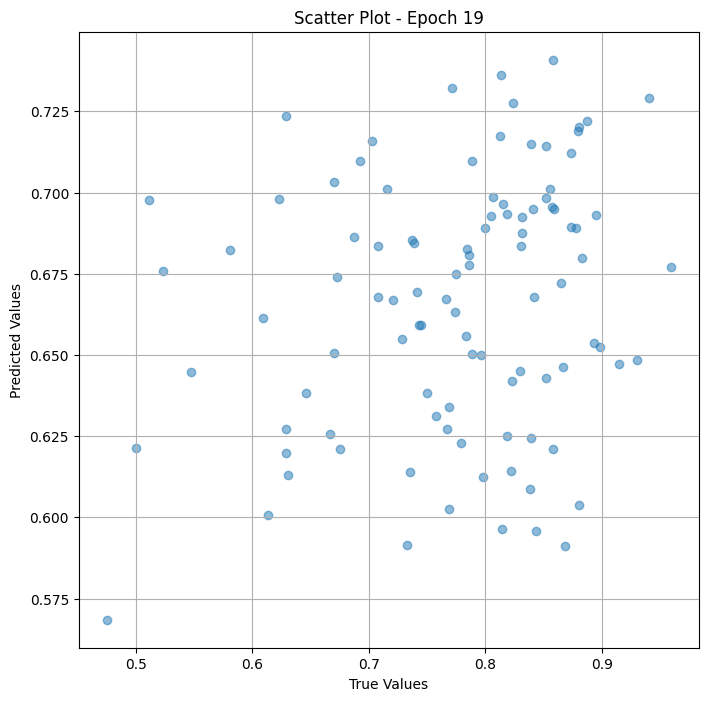

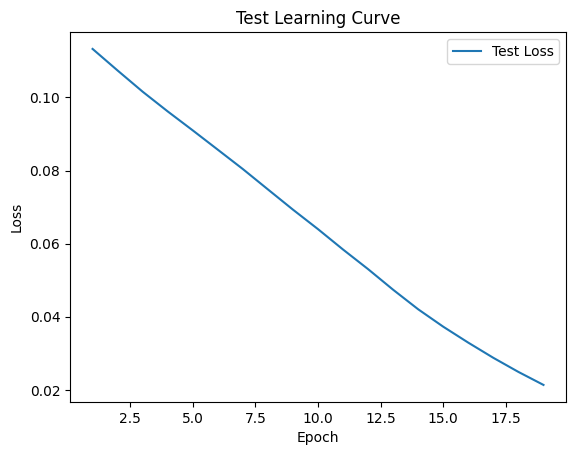


 Epoch: (20/50) Loss = 0.01809808984398842

 Epoch: (20/50) Loss_rmse = 0.13452914357185364

 Epoch: (20/50) R^2 = 0.4421690106391907

 Epoch: (20/50) MAE = 0.1251053810119629
Spearman correlation coefficient: SignificanceResult(statistic=0.13803721552412204, pvalue=0.17985670585531777)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666

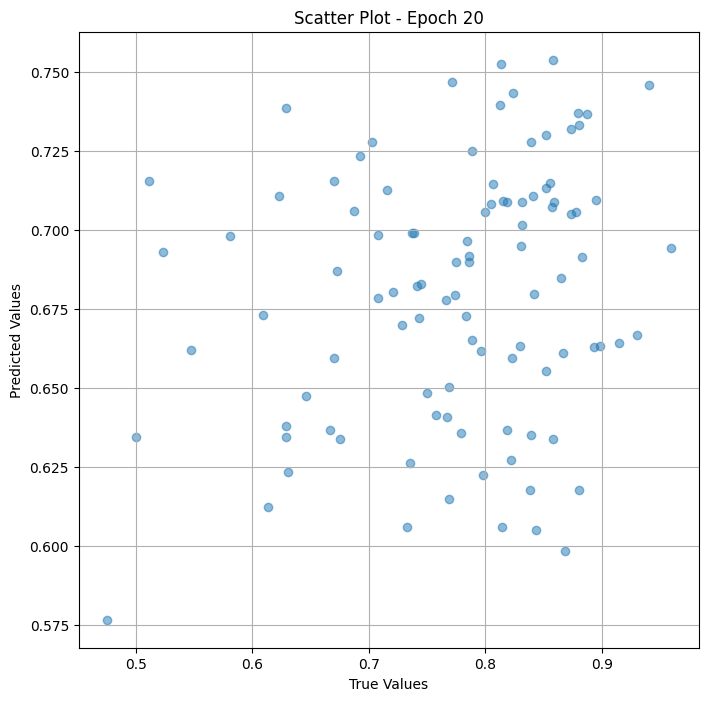

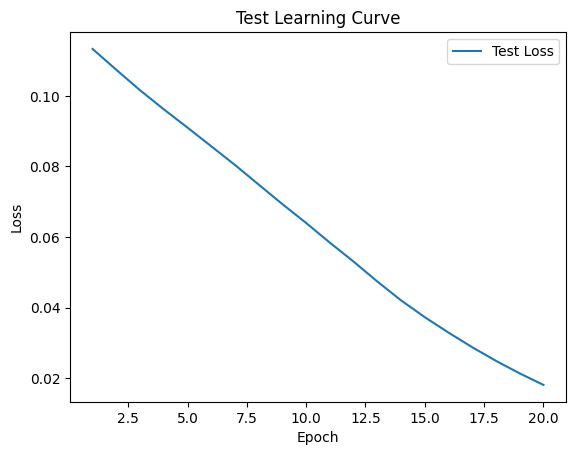


 Epoch: (21/50) Loss = 0.01527169719338417

 Epoch: (21/50) Loss_rmse = 0.12357870489358902

 Epoch: (21/50) R^2 = 0.5292859077453613

 Epoch: (21/50) MAE = 0.11401300877332687
Spearman correlation coefficient: SignificanceResult(statistic=0.13581934163082465, pvalue=0.18702094043796944)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.766

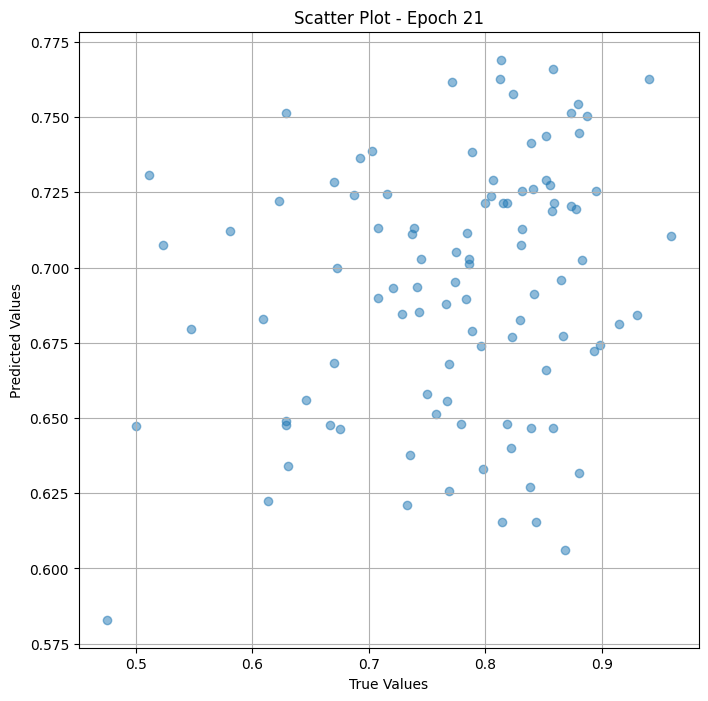

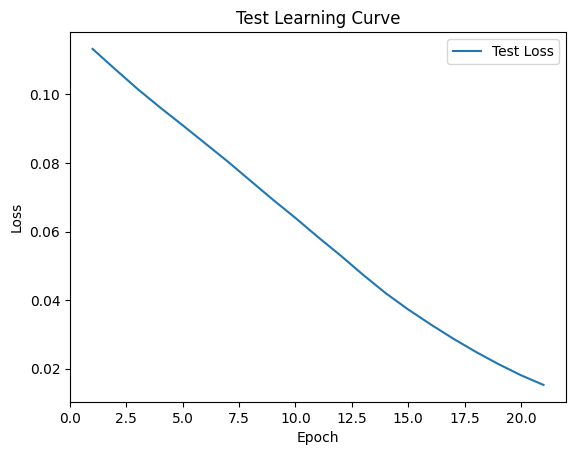


 Epoch: (22/50) Loss = 0.012932364828884602

 Epoch: (22/50) Loss_rmse = 0.11372055858373642

 Epoch: (22/50) R^2 = 0.6013903617858887

 Epoch: (22/50) MAE = 0.10338959842920303
Spearman correlation coefficient: SignificanceResult(statistic=0.1568043625050205, pvalue=0.1270866609220362)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7666

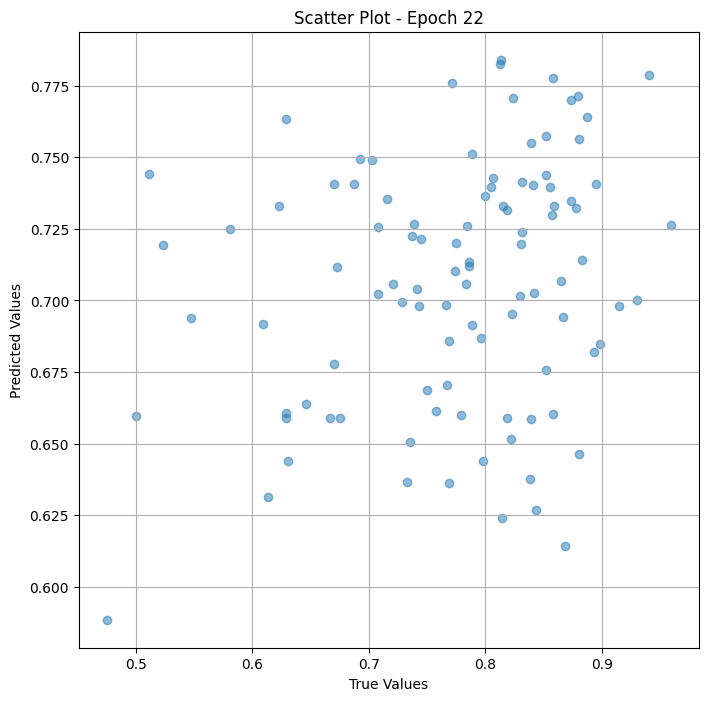

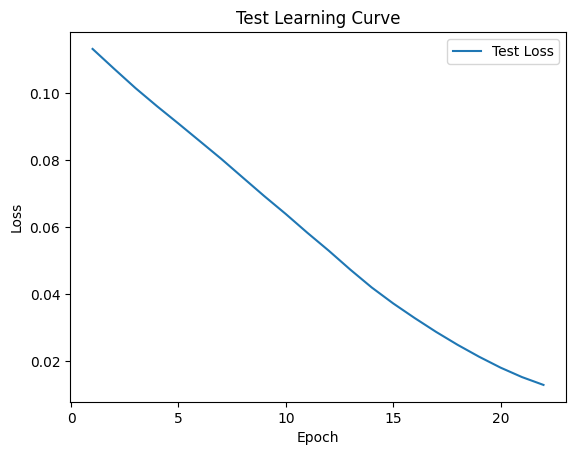


 Epoch: (23/50) Loss = 0.010916433297097683

 Epoch: (23/50) Loss_rmse = 0.10448173433542252

 Epoch: (23/50) R^2 = 0.6635266542434692

 Epoch: (23/50) MAE = 0.09272747486829758
Spearman correlation coefficient: SignificanceResult(statistic=0.17911196872843038, pvalue=0.08079483573549019)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

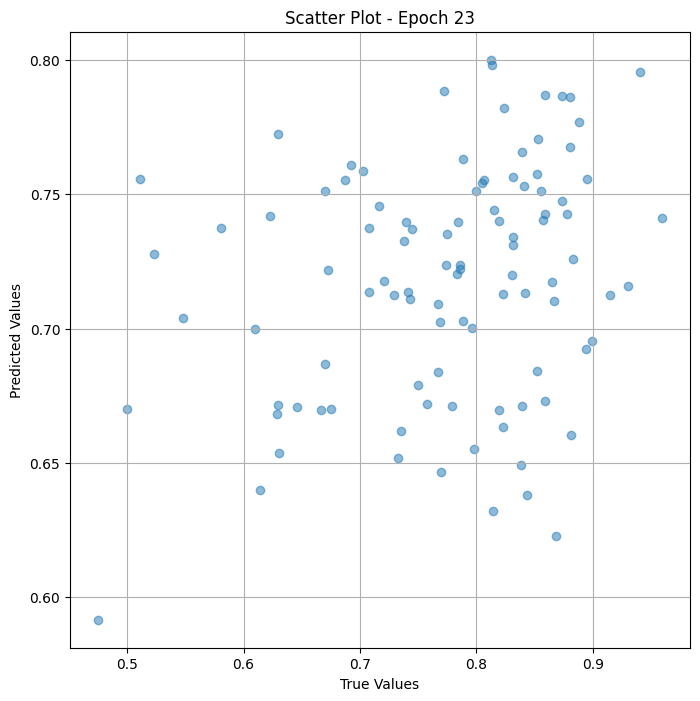

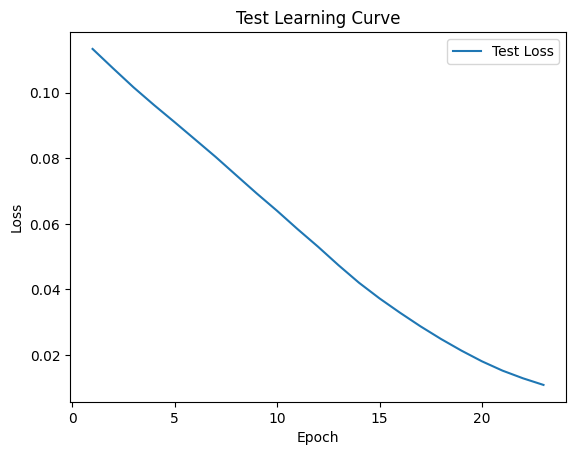


 Epoch: (24/50) Loss = 0.009259693324565887

 Epoch: (24/50) Loss_rmse = 0.09622730314731598

 Epoch: (24/50) R^2 = 0.7145917415618896

 Epoch: (24/50) MAE = 0.08252259343862534
Spearman correlation coefficient: SignificanceResult(statistic=0.20478368948112305, pvalue=0.045344672171949645)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

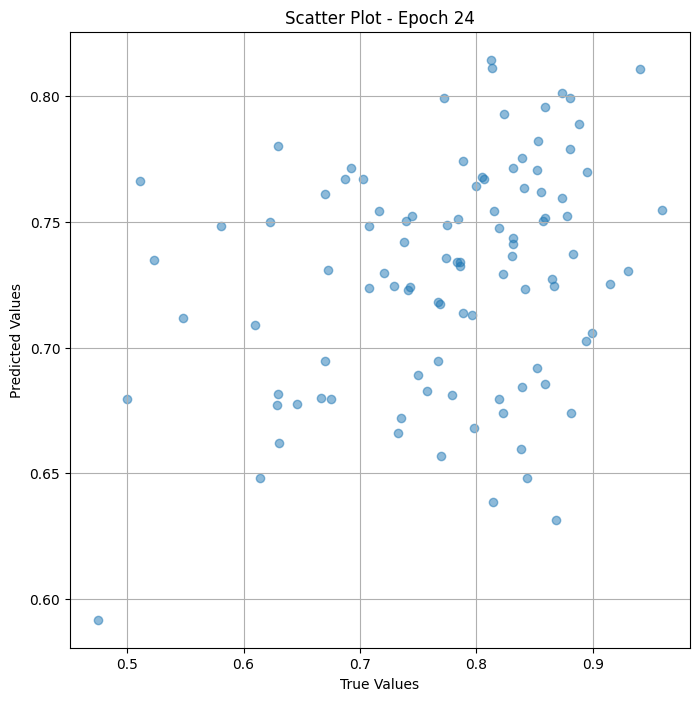

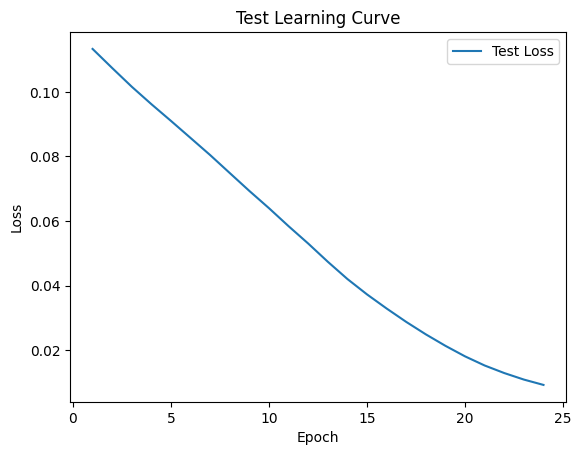


 Epoch: (25/50) Loss = 0.007868854328989983

 Epoch: (25/50) Loss_rmse = 0.08870656043291092

 Epoch: (25/50) R^2 = 0.7574610710144043

 Epoch: (25/50) MAE = 0.07695318013429642
Spearman correlation coefficient: SignificanceResult(statistic=0.22316423459071283, pvalue=0.02884832592847648)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

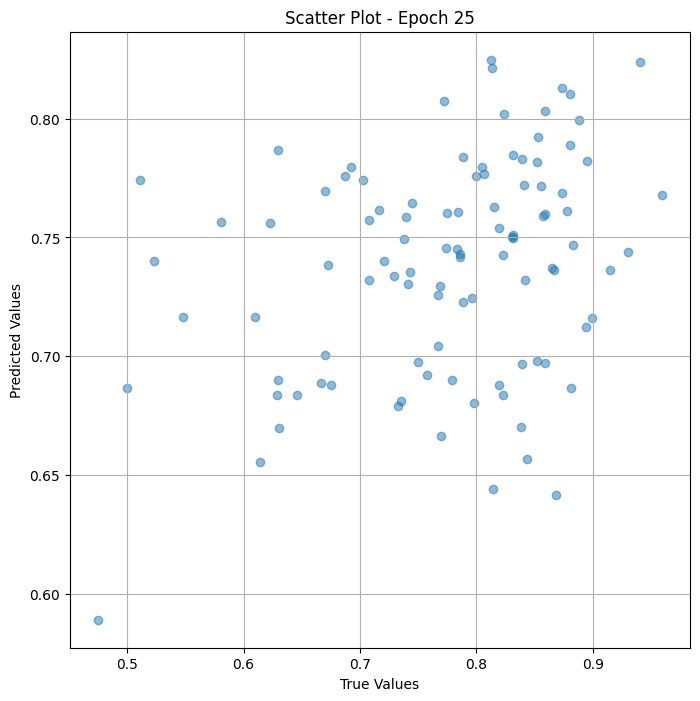

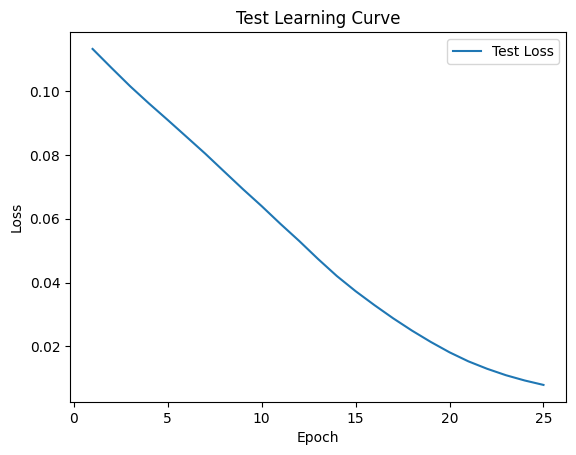


 Epoch: (26/50) Loss = 0.0066688405349850655

 Epoch: (26/50) Loss_rmse = 0.08166296780109406

 Epoch: (26/50) R^2 = 0.794448733329773

 Epoch: (26/50) MAE = 0.07232769578695297
Spearman correlation coefficient: SignificanceResult(statistic=0.2531767482844156, pvalue=0.012817113202236217)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

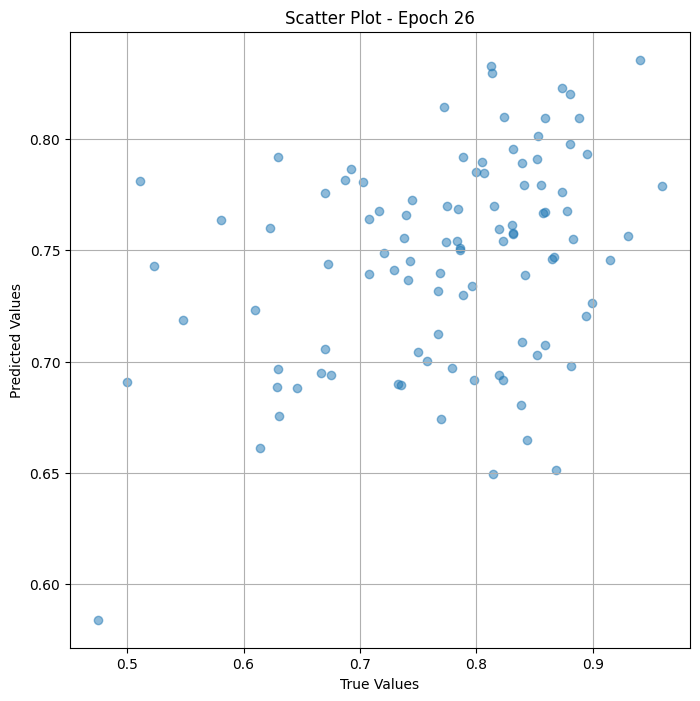

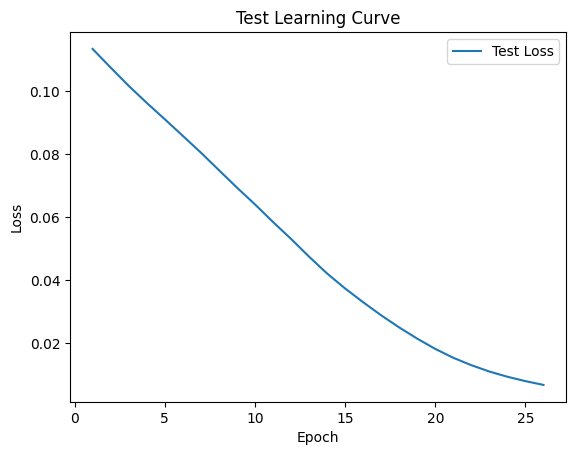


 Epoch: (27/50) Loss = 0.005633033812046051

 Epoch: (27/50) Loss_rmse = 0.07505354285240173

 Epoch: (27/50) R^2 = 0.8263750076293945

 Epoch: (27/50) MAE = 0.06737912446260452
Spearman correlation coefficient: SignificanceResult(statistic=0.2831350020663559, pvalue=0.005186032211647211)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

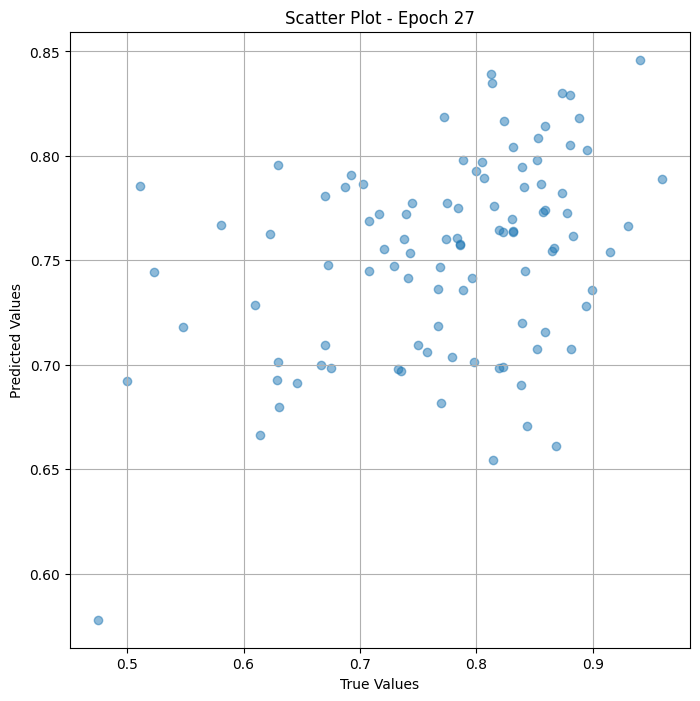

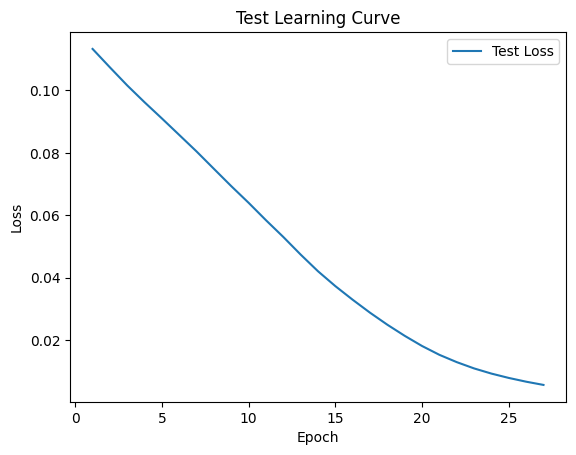


 Epoch: (28/50) Loss = 0.00479124067351222

 Epoch: (28/50) Loss_rmse = 0.06921879202127457

 Epoch: (28/50) R^2 = 0.8523212671279907

 Epoch: (28/50) MAE = 0.06267034262418747
Spearman correlation coefficient: SignificanceResult(statistic=0.31093642435573166, pvalue=0.00204617101592738)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.766

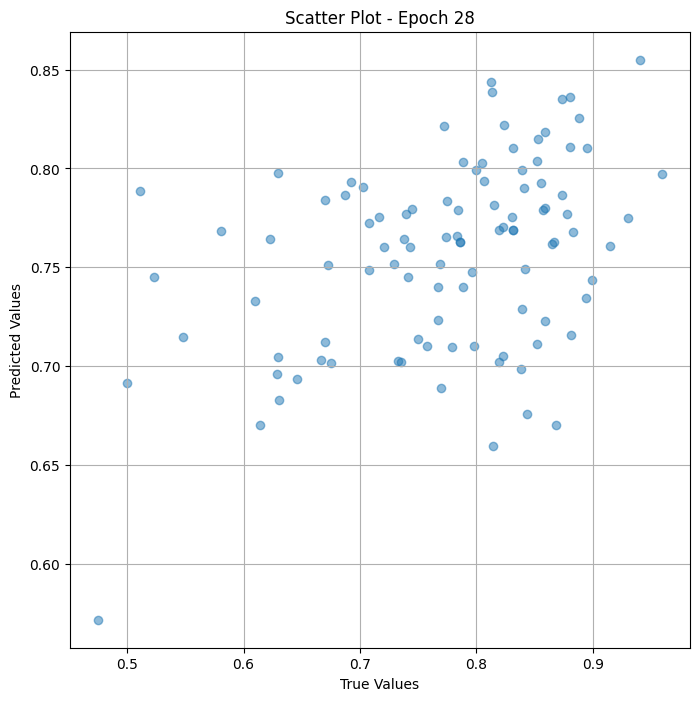

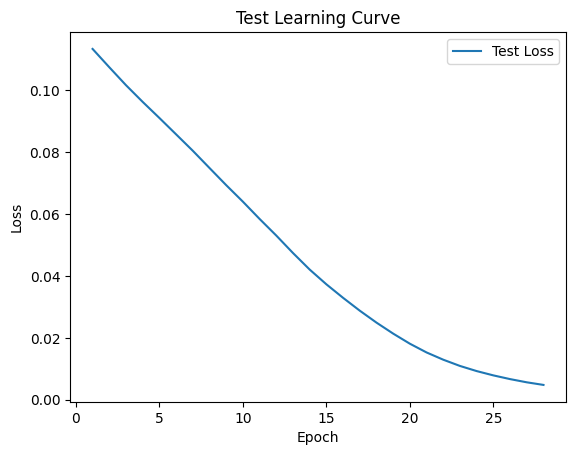


 Epoch: (29/50) Loss = 0.004125499632209539

 Epoch: (29/50) Loss_rmse = 0.0642300546169281

 Epoch: (29/50) R^2 = 0.8728411793708801

 Epoch: (29/50) MAE = 0.05836222320795059
Spearman correlation coefficient: SignificanceResult(statistic=0.3440756654647558, pvalue=0.0005980174704152824)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

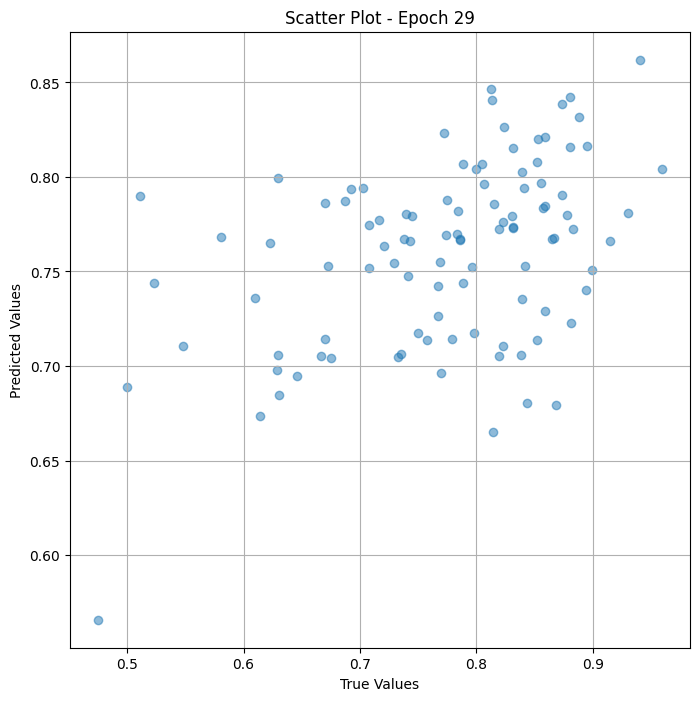

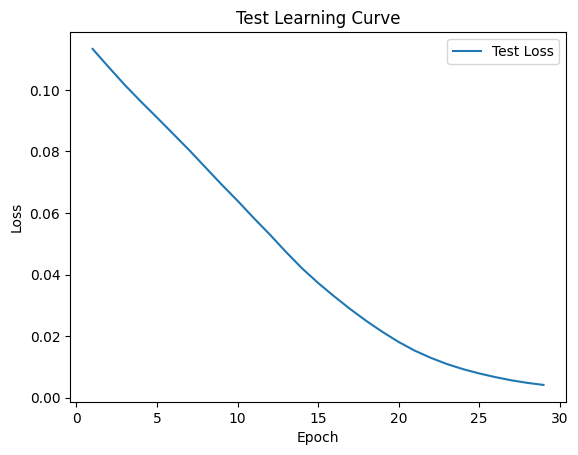


 Epoch: (30/50) Loss = 0.003565786872059107

 Epoch: (30/50) Loss_rmse = 0.05971420928835869

 Epoch: (30/50) R^2 = 0.8900930285453796

 Epoch: (30/50) MAE = 0.054255567491054535
Spearman correlation coefficient: SignificanceResult(statistic=0.38165743684934506, pvalue=0.000124660755832039)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

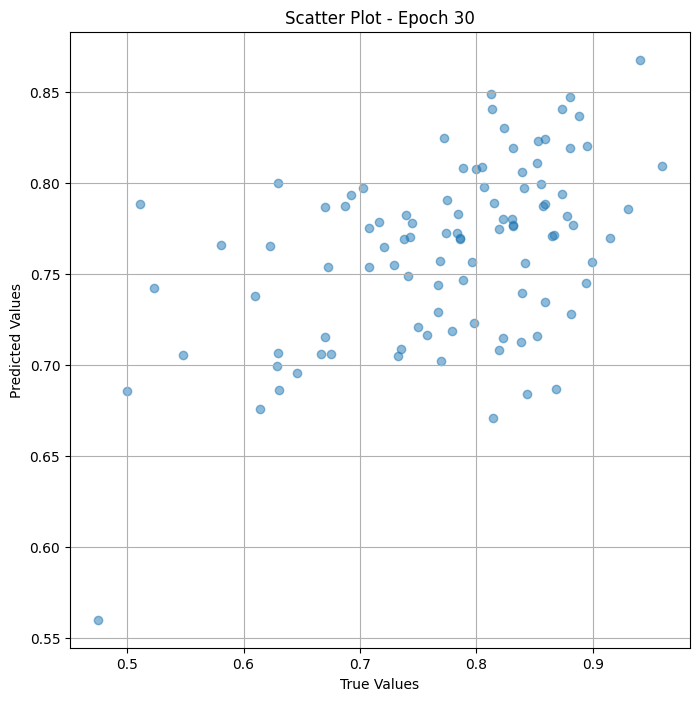

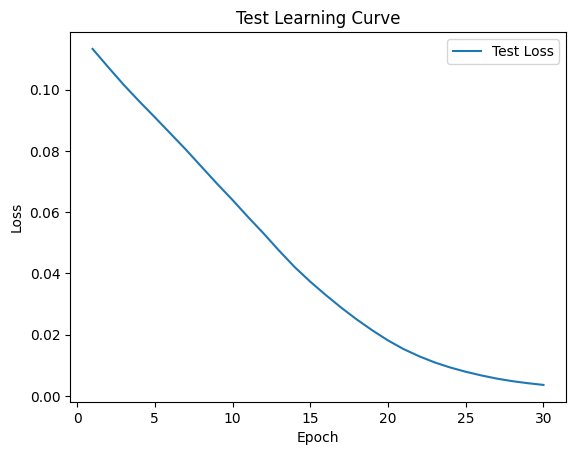


 Epoch: (31/50) Loss = 0.0030977814458310604

 Epoch: (31/50) Loss_rmse = 0.05565771833062172

 Epoch: (31/50) R^2 = 0.904518187046051

 Epoch: (31/50) MAE = 0.05045653134584427
Spearman correlation coefficient: SignificanceResult(statistic=0.4081701862343585, pvalue=3.6570975583210974e-05)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

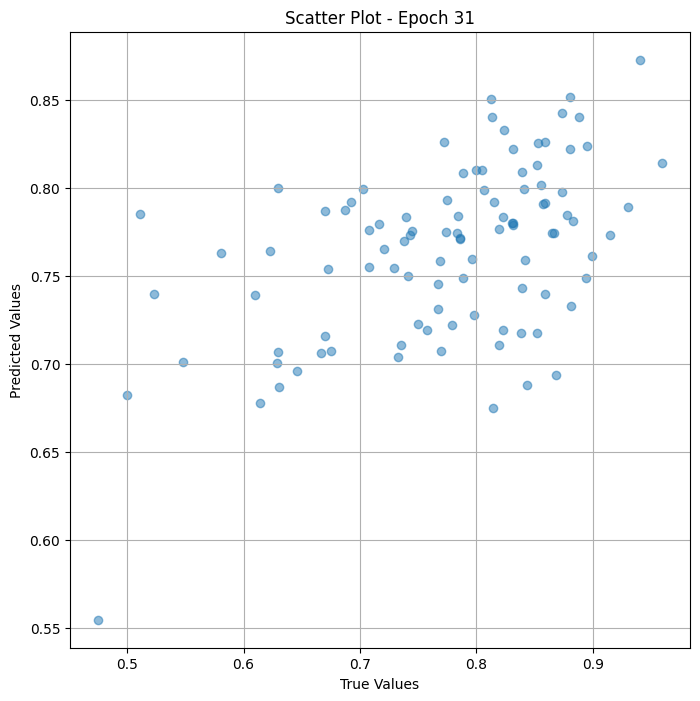

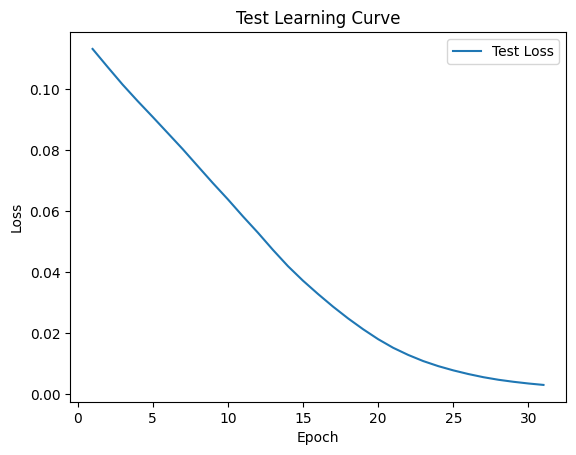


 Epoch: (32/50) Loss = 0.002712399233132601

 Epoch: (32/50) Loss_rmse = 0.05208069831132889

 Epoch: (32/50) R^2 = 0.9163966774940491

 Epoch: (32/50) MAE = 0.04692230373620987
Spearman correlation coefficient: SignificanceResult(statistic=0.44516188107852916, pvalue=5.5065049367896836e-06)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

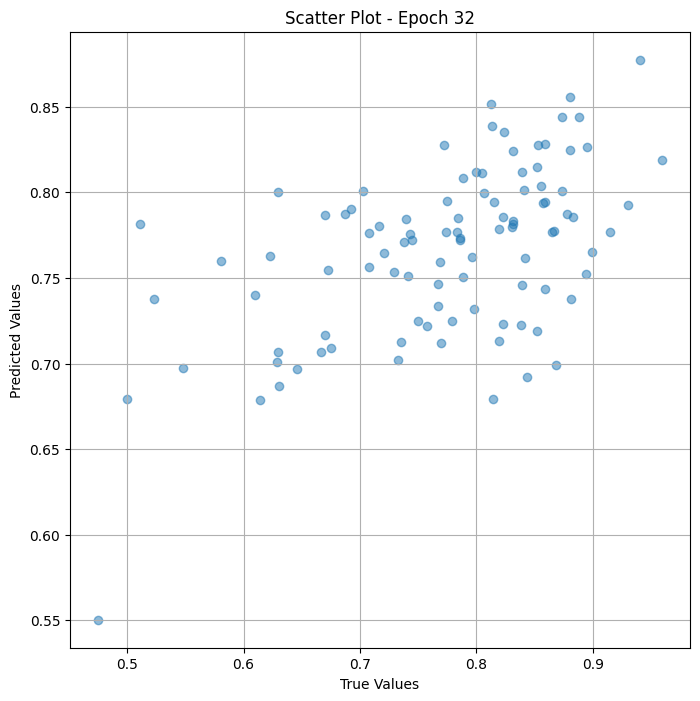

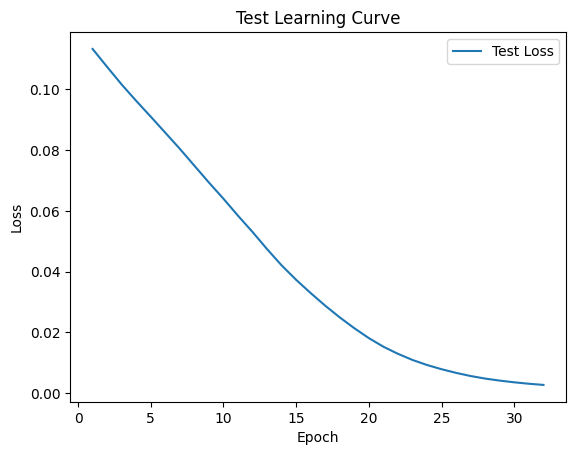


 Epoch: (33/50) Loss = 0.002381807193160057

 Epoch: (33/50) Loss_rmse = 0.04880376160144806

 Epoch: (33/50) R^2 = 0.926586389541626

 Epoch: (33/50) MAE = 0.04354534298181534
Spearman correlation coefficient: SignificanceResult(statistic=0.4723393143826347, pvalue=1.1815666402140903e-06)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

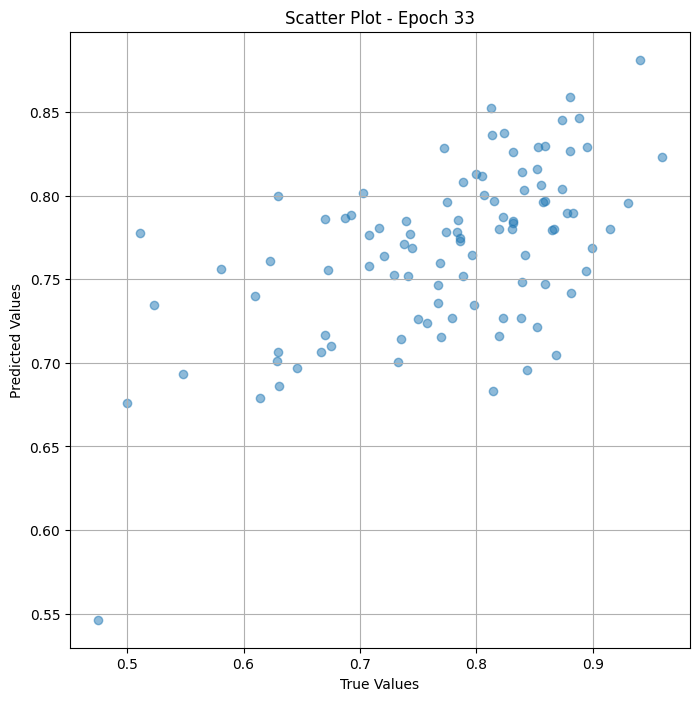

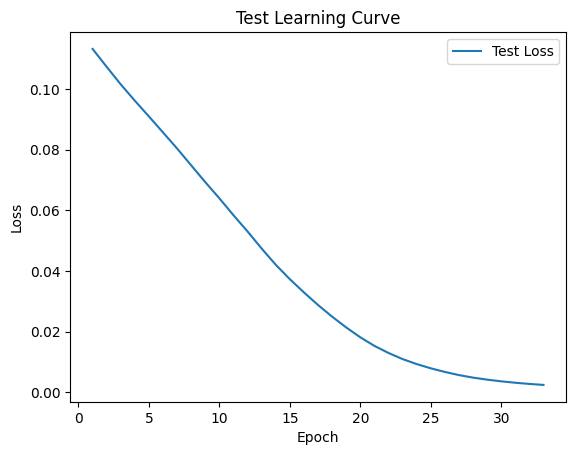


 Epoch: (34/50) Loss = 0.002094007795676589

 Epoch: (34/50) Loss_rmse = 0.04576032981276512

 Epoch: (34/50) R^2 = 0.9354571104049683

 Epoch: (34/50) MAE = 0.04036492854356766
Spearman correlation coefficient: SignificanceResult(statistic=0.49907588590366897, pvalue=2.2715523491410313e-07)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

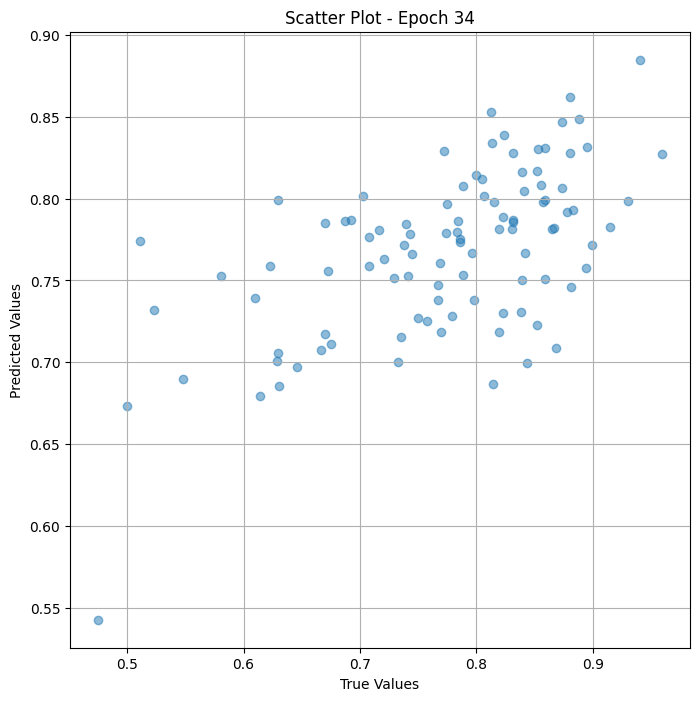

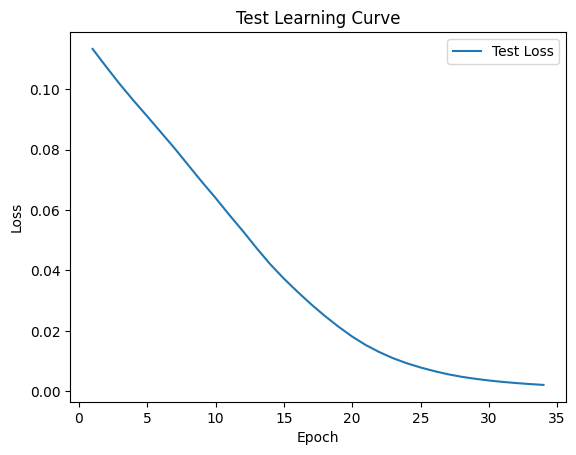


 Epoch: (35/50) Loss = 0.0018473537638783455

 Epoch: (35/50) Loss_rmse = 0.0429808534681797

 Epoch: (35/50) R^2 = 0.9430596828460693

 Epoch: (35/50) MAE = 0.03741329163312912
Spearman correlation coefficient: SignificanceResult(statistic=0.5303974199686452, pvalue=2.7281188070548274e-08)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

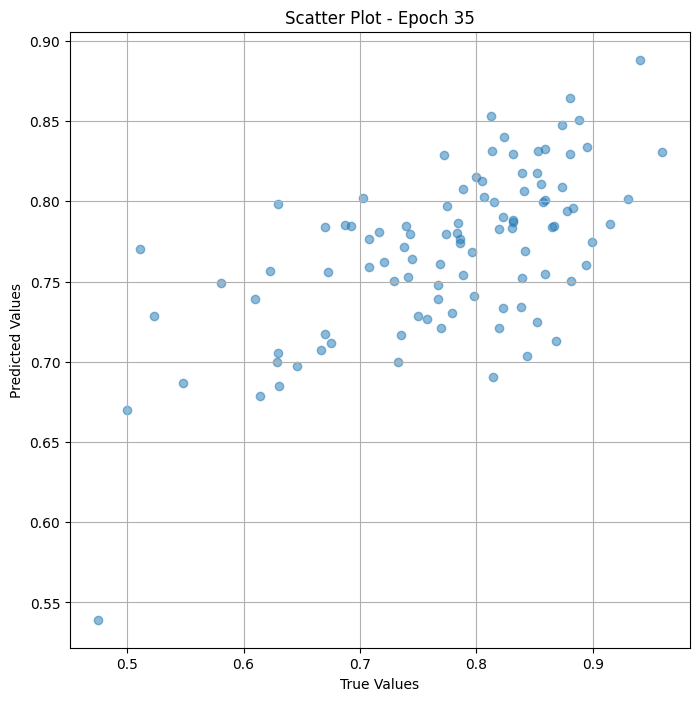

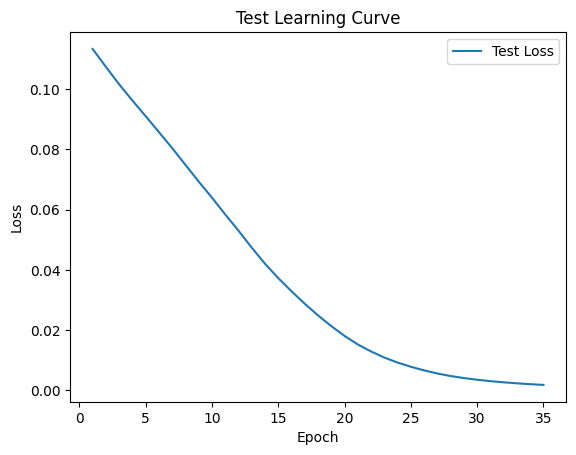


 Epoch: (36/50) Loss = 0.0016314219683408737

 Epoch: (36/50) Loss_rmse = 0.04039086401462555

 Epoch: (36/50) R^2 = 0.949715256690979

 Epoch: (36/50) MAE = 0.03459727019071579
Spearman correlation coefficient: SignificanceResult(statistic=0.5594739501844428, pvalue=3.1163823359883457e-09)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

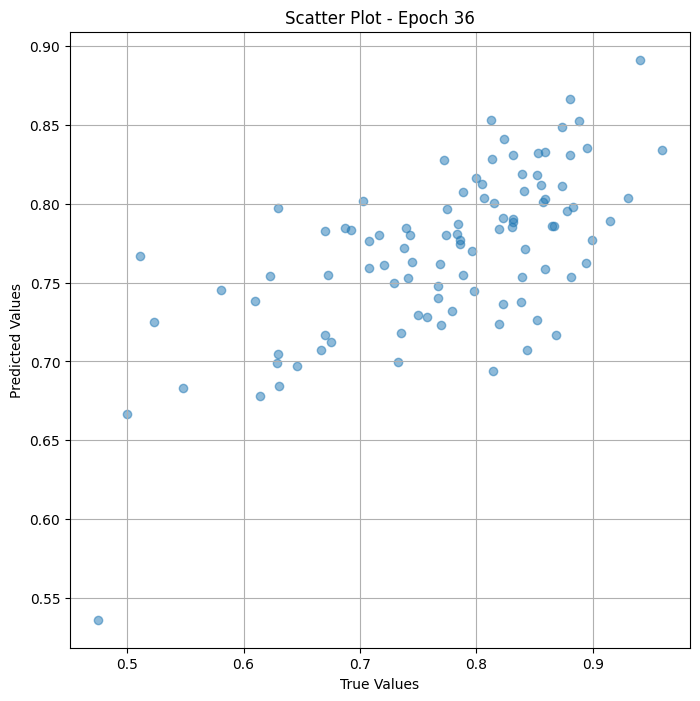

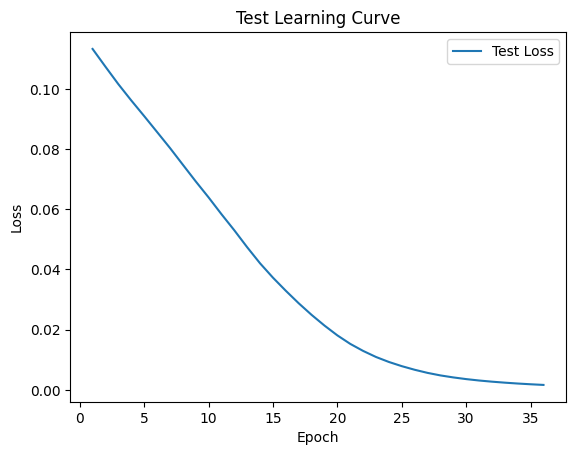


 Epoch: (37/50) Loss = 0.0014458366204053164

 Epoch: (37/50) Loss_rmse = 0.03802415728569031

 Epoch: (37/50) R^2 = 0.9554355144500732

 Epoch: (37/50) MAE = 0.0319913849234581
Spearman correlation coefficient: SignificanceResult(statistic=0.5820325084997547, pvalue=4.985009849509513e-10)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

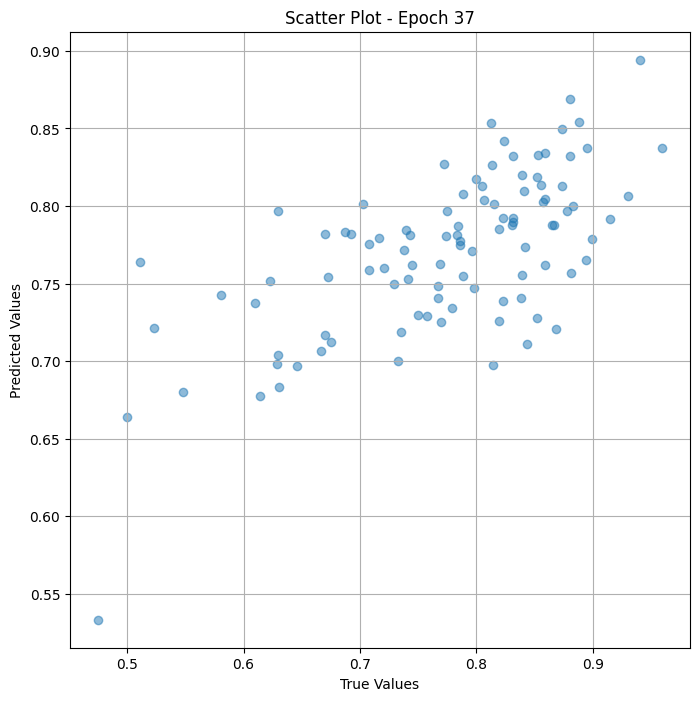

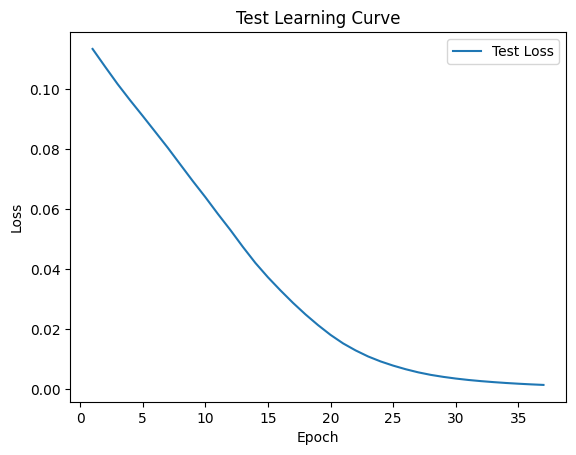


 Epoch: (38/50) Loss = 0.0012873535742983222

 Epoch: (38/50) Loss_rmse = 0.0358797088265419

 Epoch: (38/50) R^2 = 0.9603203535079956

 Epoch: (38/50) MAE = 0.029680483043193817
Spearman correlation coefficient: SignificanceResult(statistic=0.6021765007416299, pvalue=8.584408018019009e-11)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

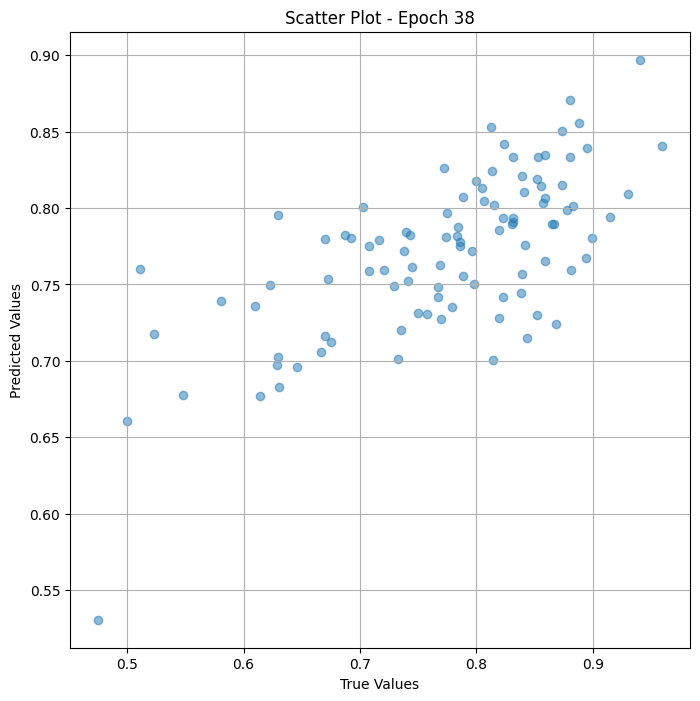

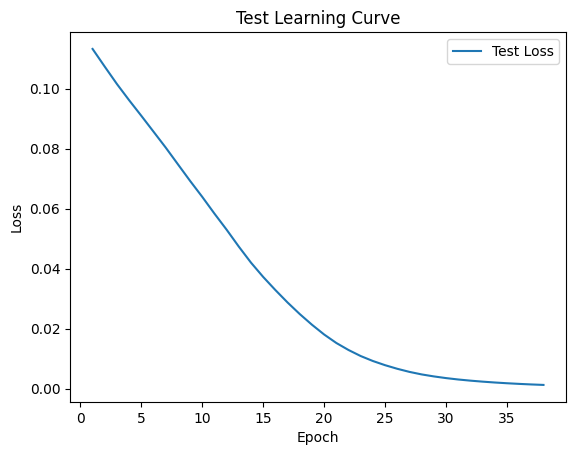


 Epoch: (39/50) Loss = 0.0011497143423184752

 Epoch: (39/50) Loss_rmse = 0.033907439559698105

 Epoch: (39/50) R^2 = 0.9645627737045288

 Epoch: (39/50) MAE = 0.02765800803899765
Spearman correlation coefficient: SignificanceResult(statistic=0.6199940992666824, pvalue=1.6298201855712557e-11)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

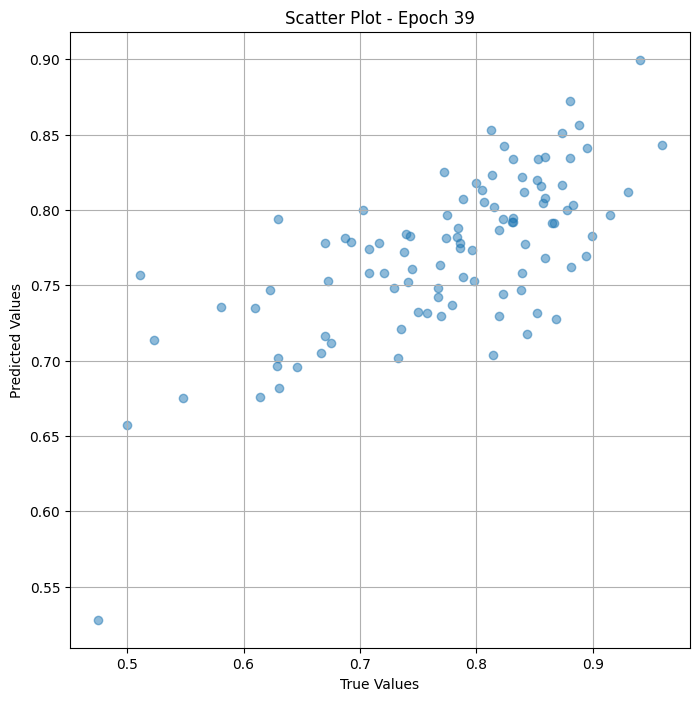

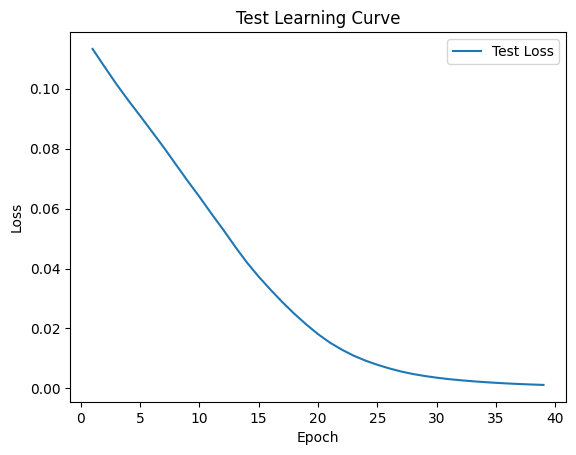


 Epoch: (40/50) Loss = 0.0010317438282072544

 Epoch: (40/50) Loss_rmse = 0.03212076798081398

 Epoch: (40/50) R^2 = 0.9681988954544067

 Epoch: (40/50) MAE = 0.025855474174022675
Spearman correlation coefficient: SignificanceResult(statistic=0.6408638178283826, pvalue=2.0266355625909012e-12)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

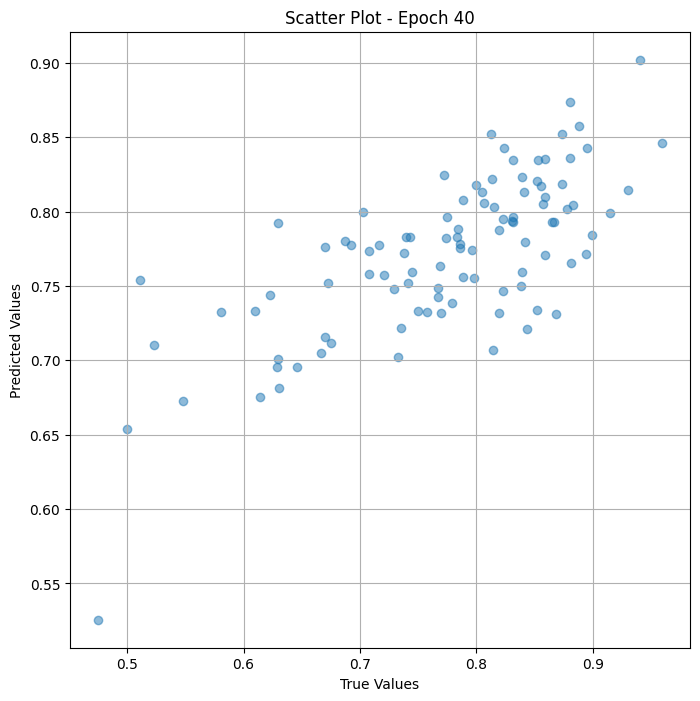

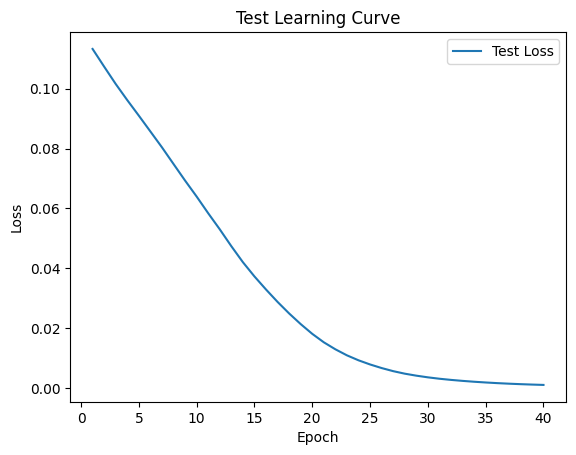


 Epoch: (41/50) Loss = 0.0009281688253395259

 Epoch: (41/50) Loss_rmse = 0.03046586364507675

 Epoch: (41/50) R^2 = 0.9713913798332214

 Epoch: (41/50) MAE = 0.024175025522708893
Spearman correlation coefficient: SignificanceResult(statistic=0.6637343706363298, pvalue=1.7048276832434697e-13)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

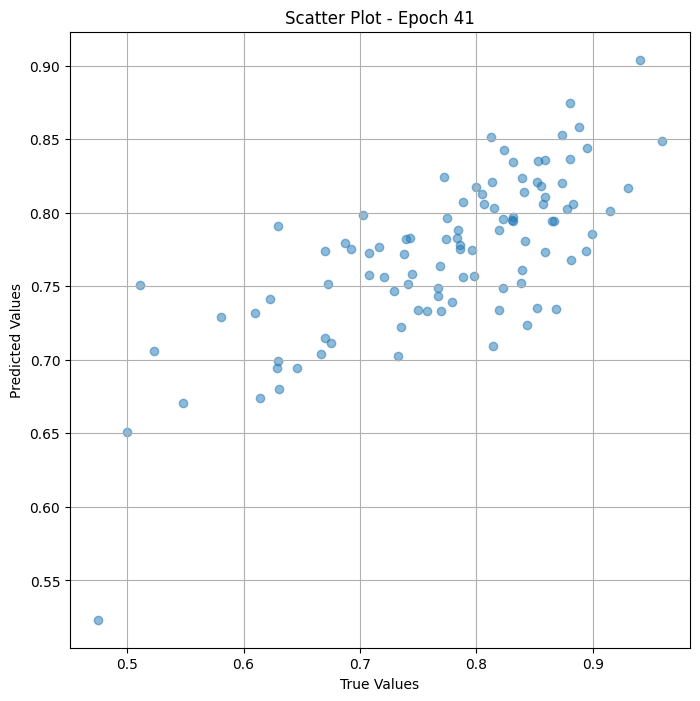

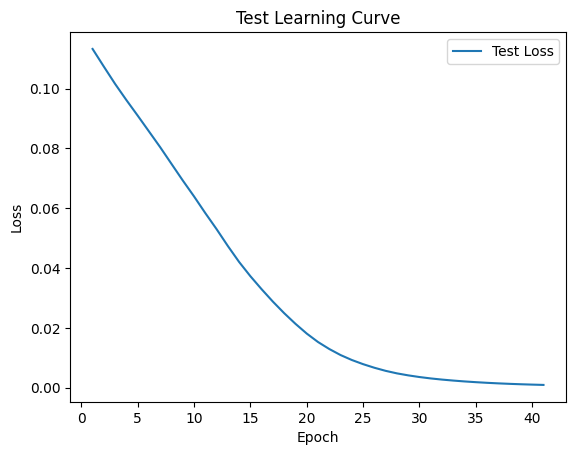


 Epoch: (42/50) Loss = 0.0008351863361895084

 Epoch: (42/50) Loss_rmse = 0.02889959141612053

 Epoch: (42/50) R^2 = 0.9742573499679565

 Epoch: (42/50) MAE = 0.022630415856838226
Spearman correlation coefficient: SignificanceResult(statistic=0.6813077995584504, pvalue=2.186139575211704e-14)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

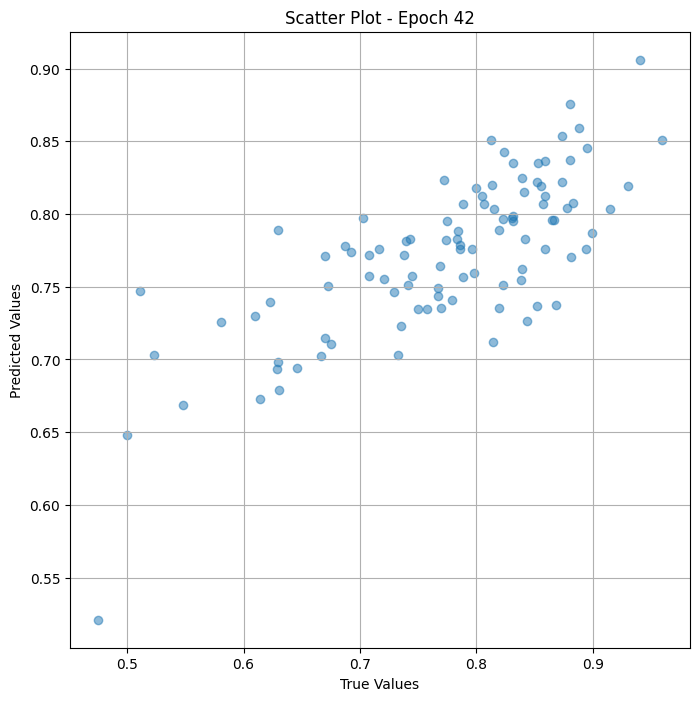

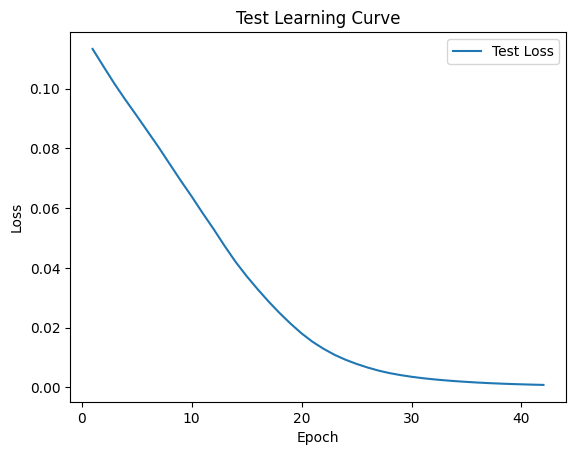


 Epoch: (43/50) Loss = 0.0007519756909459829

 Epoch: (43/50) Loss_rmse = 0.02742217481136322

 Epoch: (43/50) R^2 = 0.9768221378326416

 Epoch: (43/50) MAE = 0.021231897175312042
Spearman correlation coefficient: SignificanceResult(statistic=0.7075967268074429, pvalue=7.643768433420199e-16)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

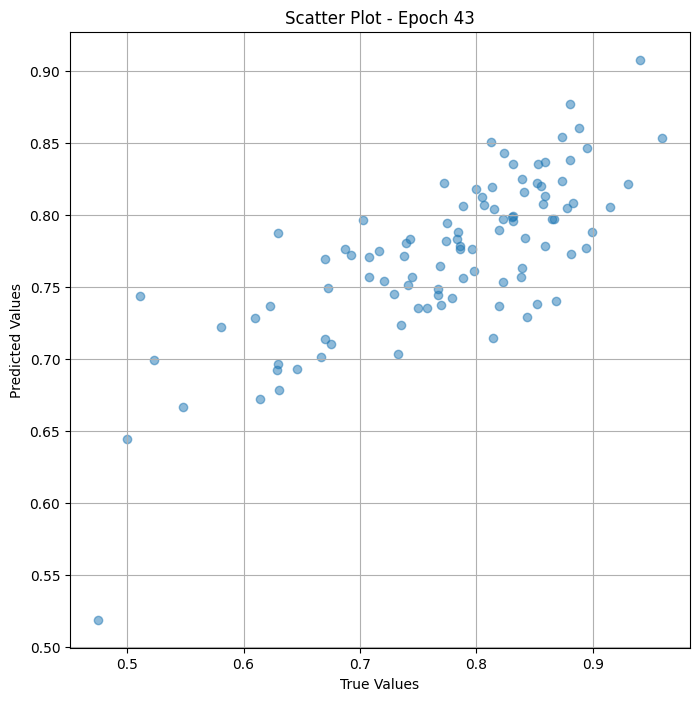

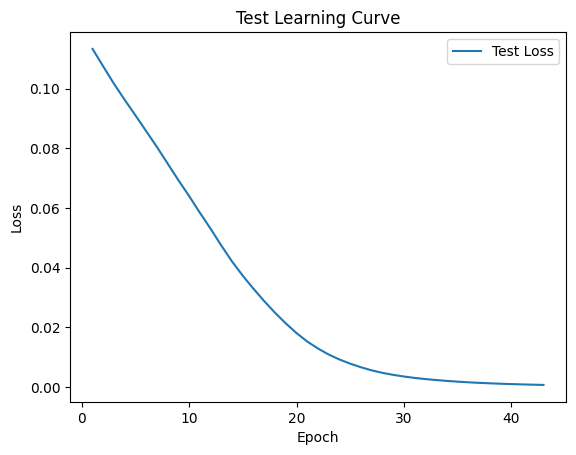


 Epoch: (44/50) Loss = 0.0006774752400815487

 Epoch: (44/50) Loss_rmse = 0.026028353720903397

 Epoch: (44/50) R^2 = 0.9791184067726135

 Epoch: (44/50) MAE = 0.019902385771274567
Spearman correlation coefficient: SignificanceResult(statistic=0.7192015654356747, pvalue=1.5422462052743285e-16)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

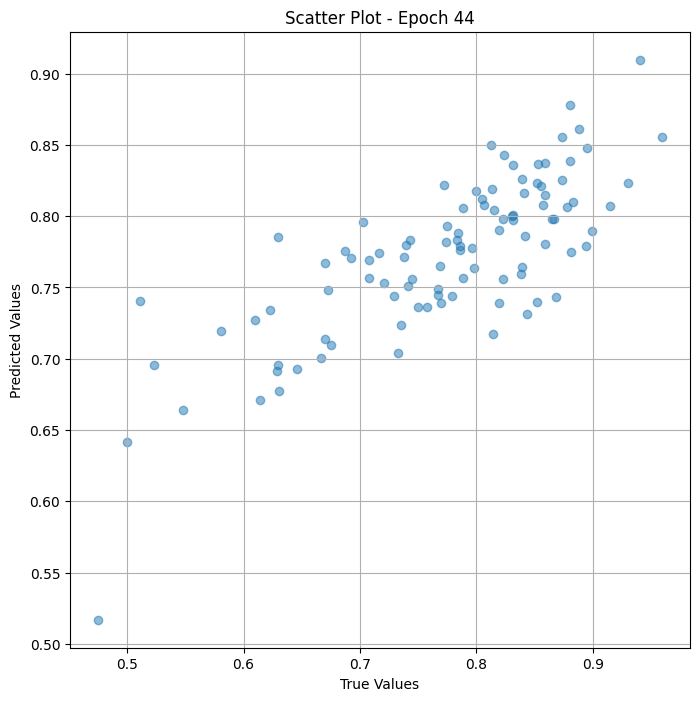

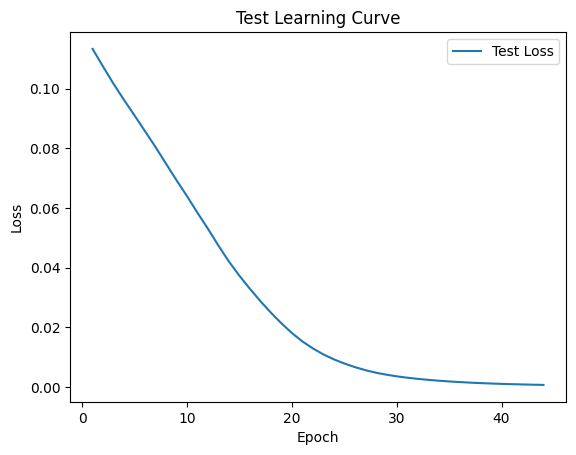


 Epoch: (45/50) Loss = 0.0006111575639806688

 Epoch: (45/50) Loss_rmse = 0.024721601977944374

 Epoch: (45/50) R^2 = 0.9811624884605408

 Epoch: (45/50) MAE = 0.01863390952348709
Spearman correlation coefficient: SignificanceResult(statistic=0.7341976485490707, pvalue=1.7239261791923284e-17)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

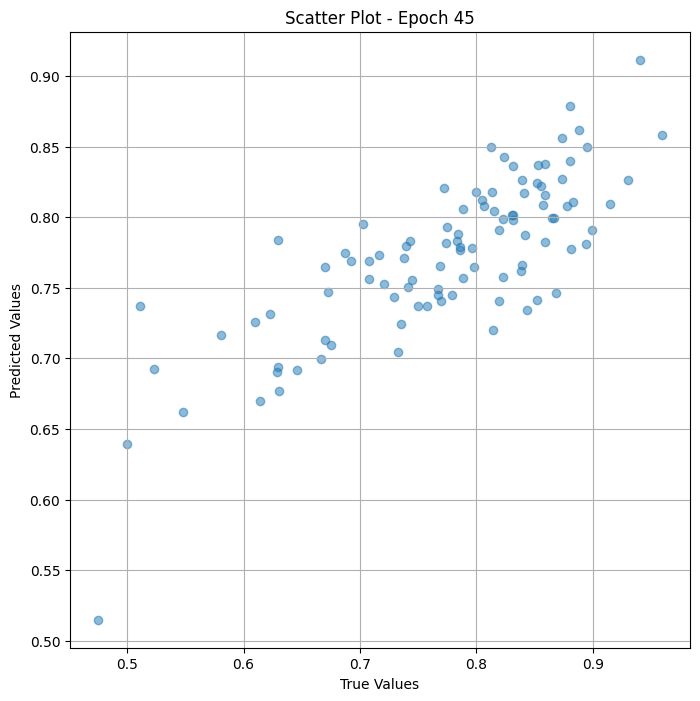

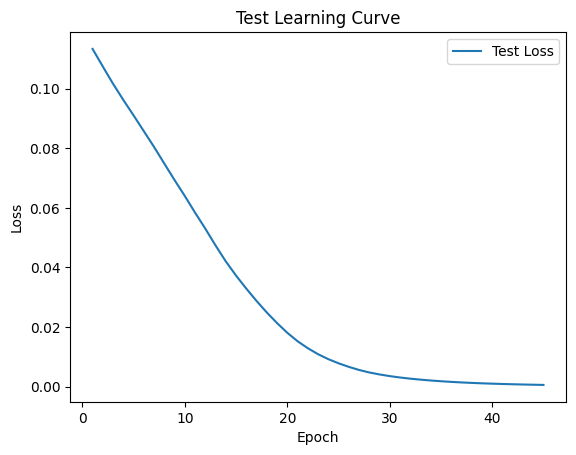


 Epoch: (46/50) Loss = 0.0005521379061974585

 Epoch: (46/50) Loss_rmse = 0.02349761500954628

 Epoch: (46/50) R^2 = 0.9829816222190857

 Epoch: (46/50) MAE = 0.017475388944149017
Spearman correlation coefficient: SignificanceResult(statistic=0.7491937316624665, pvalue=1.653654476849051e-18)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

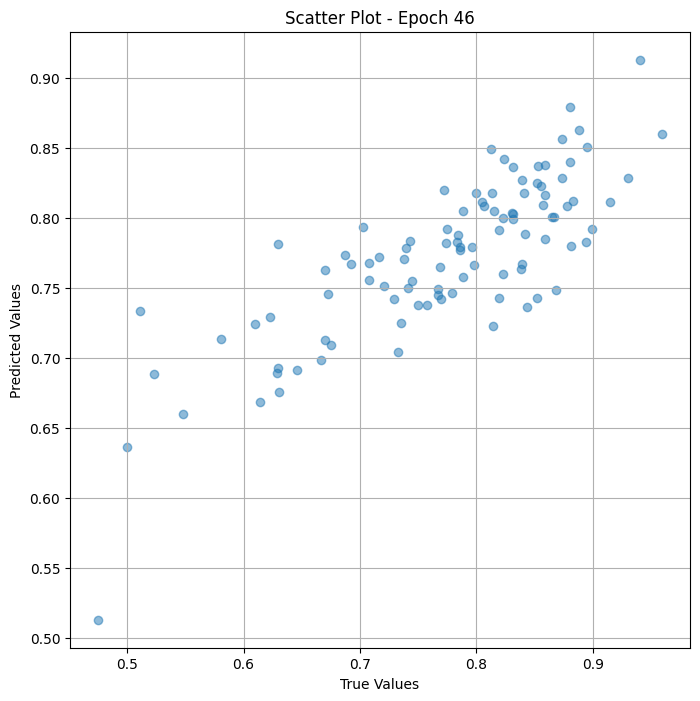

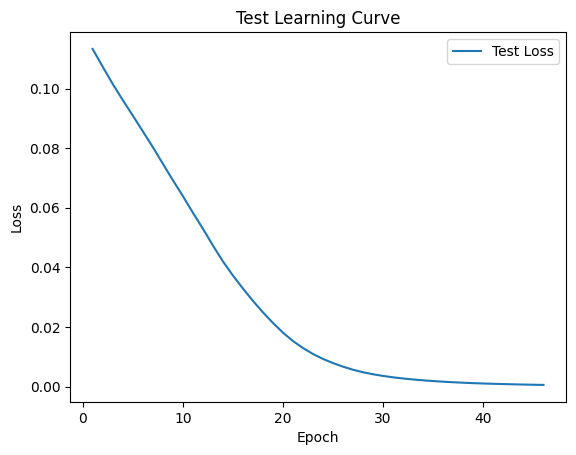


 Epoch: (47/50) Loss = 0.0004991125897504389

 Epoch: (47/50) Loss_rmse = 0.02234082855284214

 Epoch: (47/50) R^2 = 0.9846160411834717

 Epoch: (47/50) MAE = 0.01648806780576706
Spearman correlation coefficient: SignificanceResult(statistic=0.7631385289854615, pvalue=1.6037295535970846e-19)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

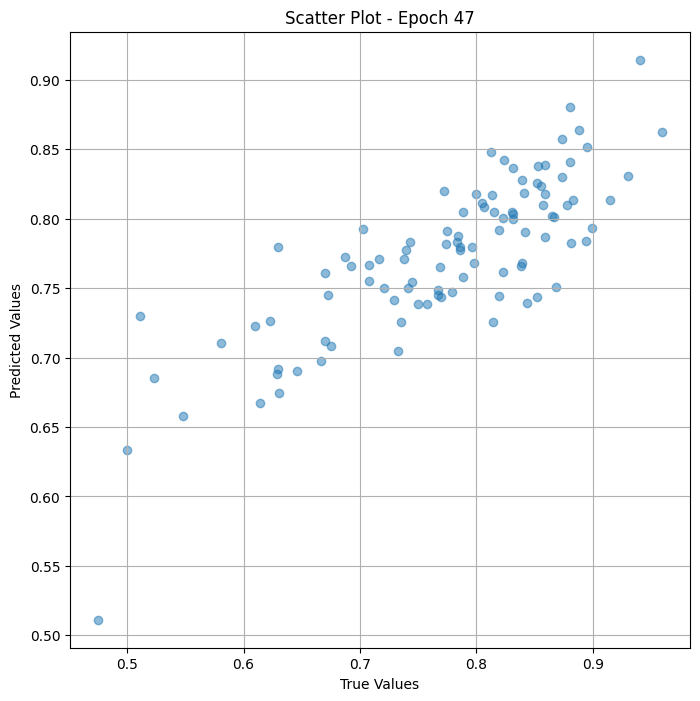

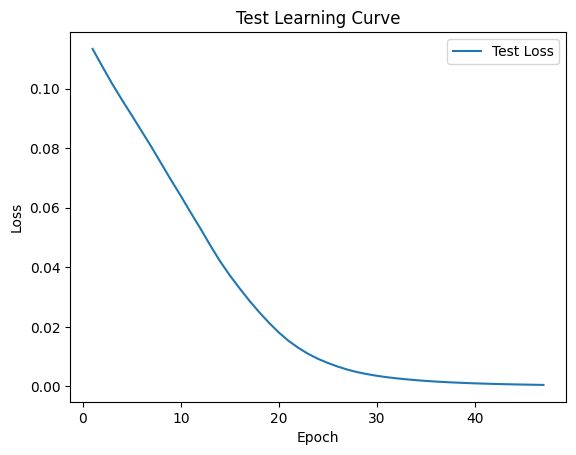


 Epoch: (48/50) Loss = 0.0004508147540036589

 Epoch: (48/50) Loss_rmse = 0.021232398226857185

 Epoch: (48/50) R^2 = 0.9861047267913818

 Epoch: (48/50) MAE = 0.01580580323934555
Spearman correlation coefficient: SignificanceResult(statistic=0.7741125961394528, pvalue=2.2776211820083234e-20)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

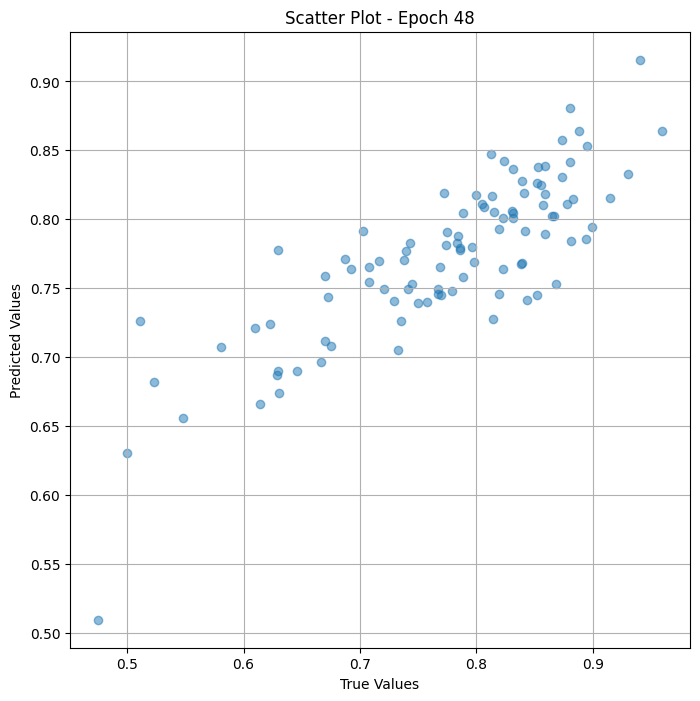

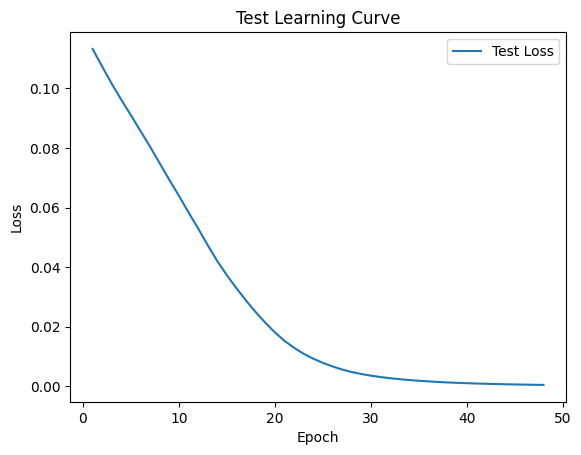


 Epoch: (49/50) Loss = 0.00040750642074272037

 Epoch: (49/50) Loss_rmse = 0.020186787471175194

 Epoch: (49/50) R^2 = 0.9874395728111267

 Epoch: (49/50) MAE = 0.015140317380428314
Spearman correlation coefficient: SignificanceResult(statistic=0.7859344744147351, pvalue=2.4516214135319392e-21)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906

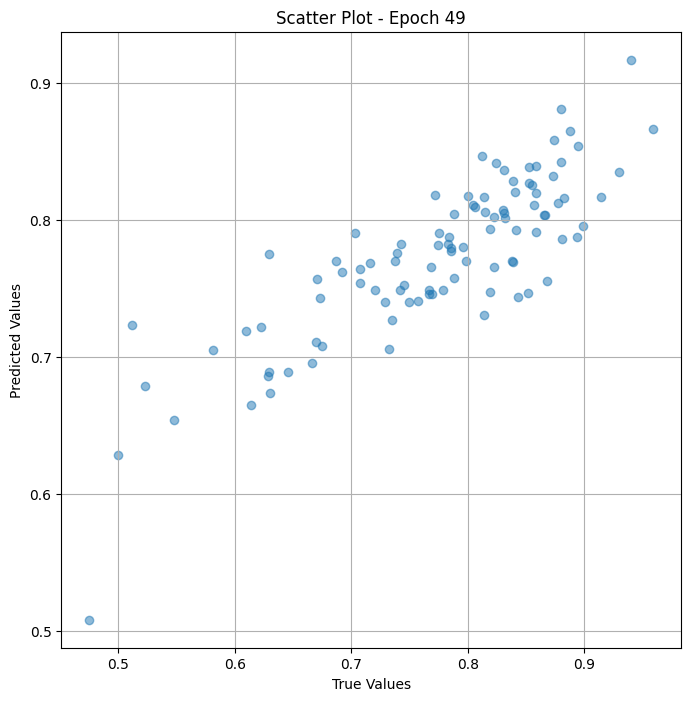

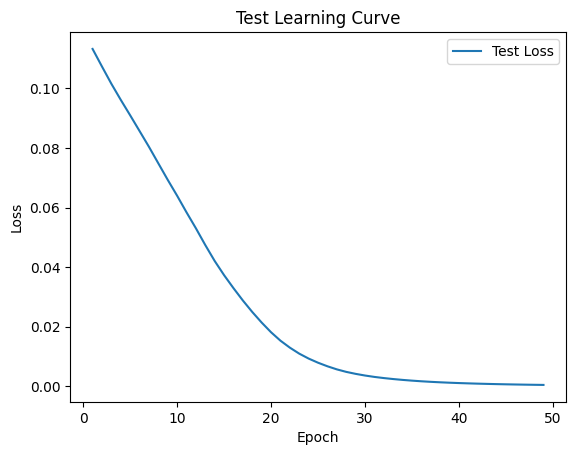


 Epoch: (50/50) Loss = 0.00036871054908260703

 Epoch: (50/50) Loss_rmse = 0.019201837480068207

 Epoch: (50/50) R^2 = 0.9886353611946106

 Epoch: (50/50) MAE = 0.0145220085978508
Spearman correlation coefficient: SignificanceResult(statistic=0.7968271517010823, pvalue=2.7655115378651147e-22)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

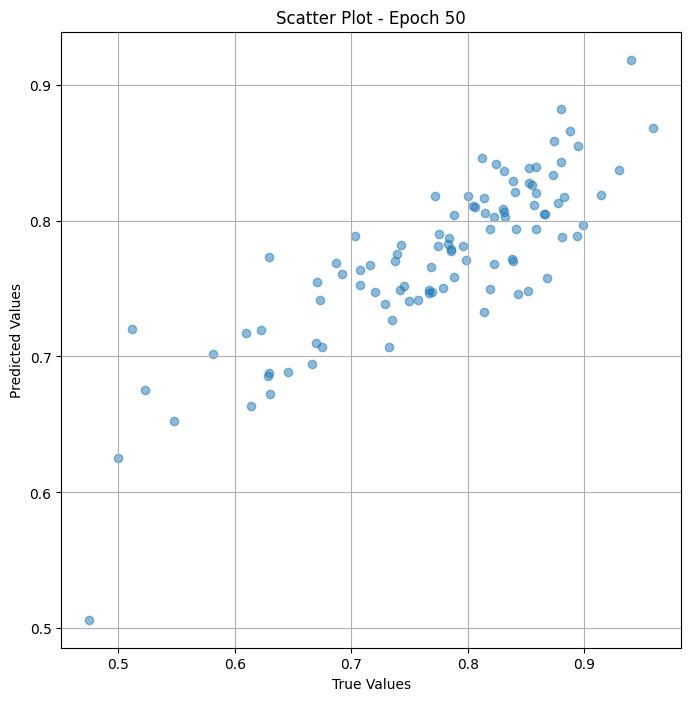

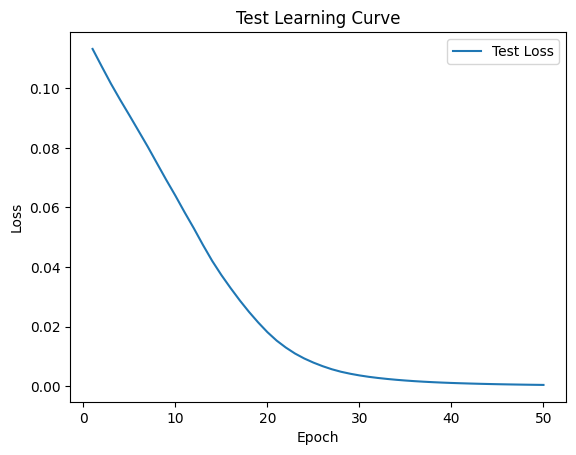

In [ ]:
# val the model and save weights
fit(50, model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds =model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_sports' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_test_sports['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                           Image Path  True Value  \
0   /content/sports/94ca4d01f90bef1c_preprocessed.jpg    0.715909   
1   /content/sports/f8c03a5c3f92c873_preprocessed.jpg    0.739130   
2   /content/sports/d6686aeee94c1def_preprocessed.jpg    0.580952   
3   /content/sports/4575138b6f7a9772_preprocessed.jpg    0.785714   
4   /content/sports/b8942e8ca4682cb2_preprocessed.jpg    0.742857   
..                                                ...         ...   
95      /content/sports/000000275933_preprocessed.jpg    0.629310   
96      /content/sports/000000115635_preprocessed.jpg    0.880000   
97  /content/sports/888013ce63acbff2_preprocessed.jpg    0.475248   
98  /content/sports/7f6a04e04c276070_preprocessed.jpg    0.940594   
99  /content/sports/cb015f171d060a5f_preprocessed.jpg    0.813725   

    Predicted Value  
0          0.766066  
1          0.774338  
2          0.699497  
3          0.779468  
4          0.781600  
..              ...  
95         0.7719

#Finetuning

##Train

In [ ]:
class Dataset_train_fine(Dataset):
    def __init__(self, df,res_fine_transform =None):
        self.labels = df_train_sports["memoscore"]
        self.images = df_train_sports["preprocessed_image_path"]
        self.res_fine_transform  = res_fine_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_fine_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_fine_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds_fine = Dataset_train_fine(df_train_sports, res_fine_transform =res_fine_transform )
train_dl_fine = DataLoader(train_ds_fine, batch_size=16, shuffle=False)

# เรียกดูข้อมูลจาก DataLoader
'''for image_trans, label in train_dl:
    # คำสั่งนี้จะแสดงขนาดของรูปภาพที่ transform แล้วในแต่ละ batch
    print(image_trans)
    break'''


'for image_trans, label in train_dl:\n    # คำสั่งนี้จะแสดงขนาดของรูปภาพที่ transform แล้วในแต่ละ batch\n    print(image_trans)\n    break'

In [ ]:
class Resmem_model_fine_sports(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)



    def forward(self, x):
        resfeat = self.res(x)

        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_fine =  Resmem_model_fine_sports( arch="resnet50.a1_in1k")

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_fine = DeviceDataLoader(train_dl_fine, device)
model_res_fine = to_device(model_res_fine  , device)

In [ ]:
params = [param for param in list(model_res_fine.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-5 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_fine, train_dl_fine):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_fine.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl_fine:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_fine(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(20,model_res_fine , train_dl)
torch.save(model_res_fine.state_dict(), "model_weights_fine")

## valid

In [ ]:
params = [param for param in list(model_res_val .parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-5,weight_decay=1e-6)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)


 Epoch: (1/10) Loss = 0.001985706388950348

 Epoch: (1/10) Loss_rmse = 0.04456126689910889

 Epoch: (1/10) R^2 = 0.5462885499000549

 Epoch: (1/10) MAE = 0.04220415651798248
Spearman correlation coefficient: SignificanceResult(statistic=0.975908354278683, pvalue=5.9340299368051245e-64)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651685,

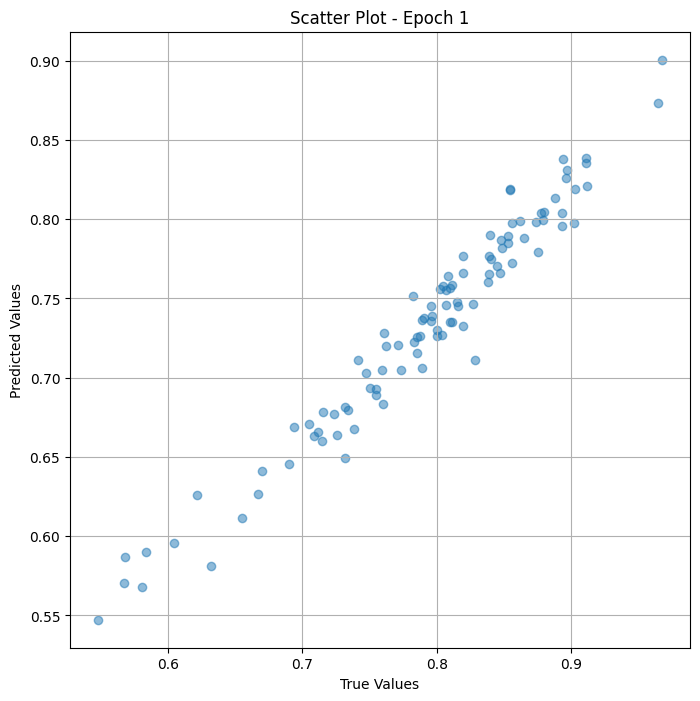

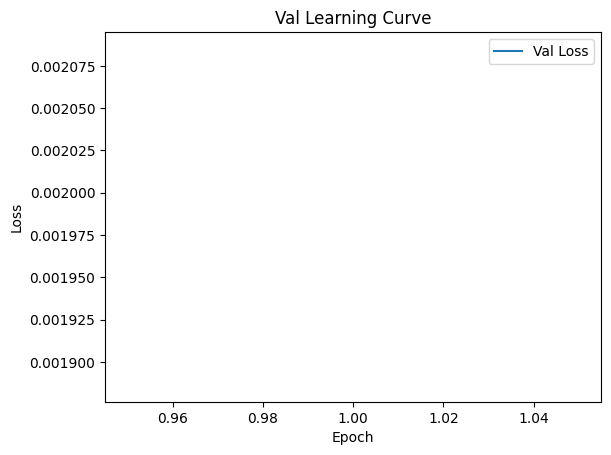


 Epoch: (2/10) Loss = 0.002308910246938467

 Epoch: (2/10) Loss_rmse = 0.048051122575998306

 Epoch: (2/10) R^2 = 0.47244012355804443

 Epoch: (2/10) MAE = 0.04562439024448395
Spearman correlation coefficient: SignificanceResult(statistic=0.9788926797878231, pvalue=1.2690831347850474e-66)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.86516

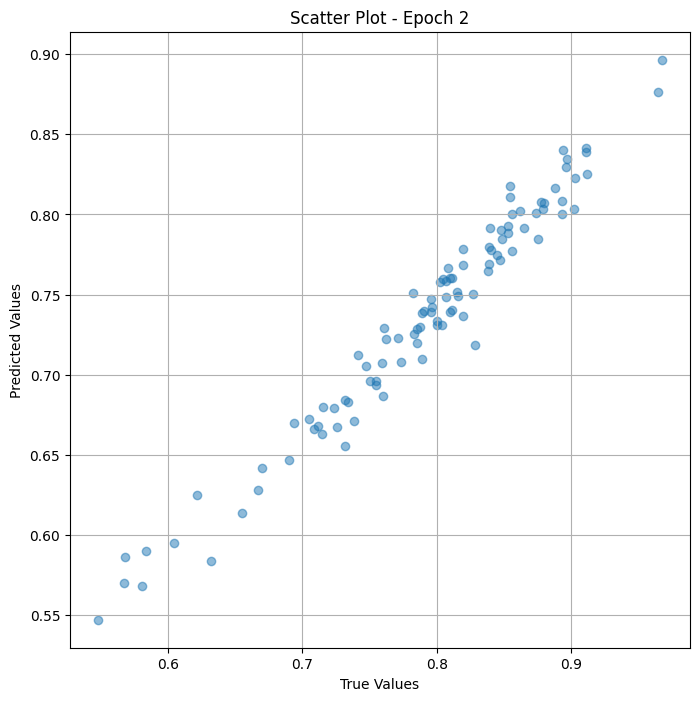

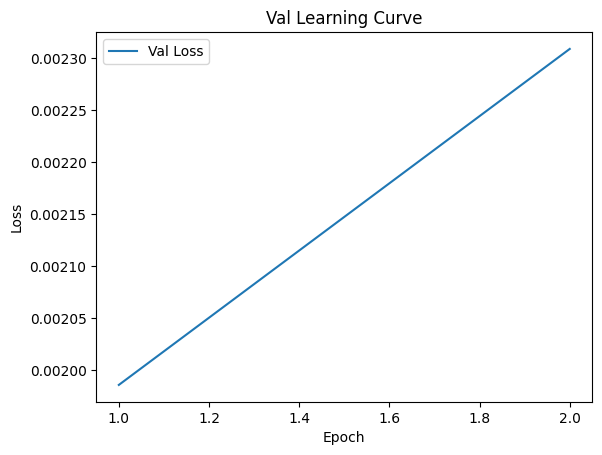


 Epoch: (3/10) Loss = 0.0018213726580142975

 Epoch: (3/10) Loss_rmse = 0.04267754405736923

 Epoch: (3/10) R^2 = 0.5838369131088257

 Epoch: (3/10) MAE = 0.04058690369129181
Spearman correlation coefficient: SignificanceResult(statistic=0.9805408413758255, pvalue=2.885650546354693e-68)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651685

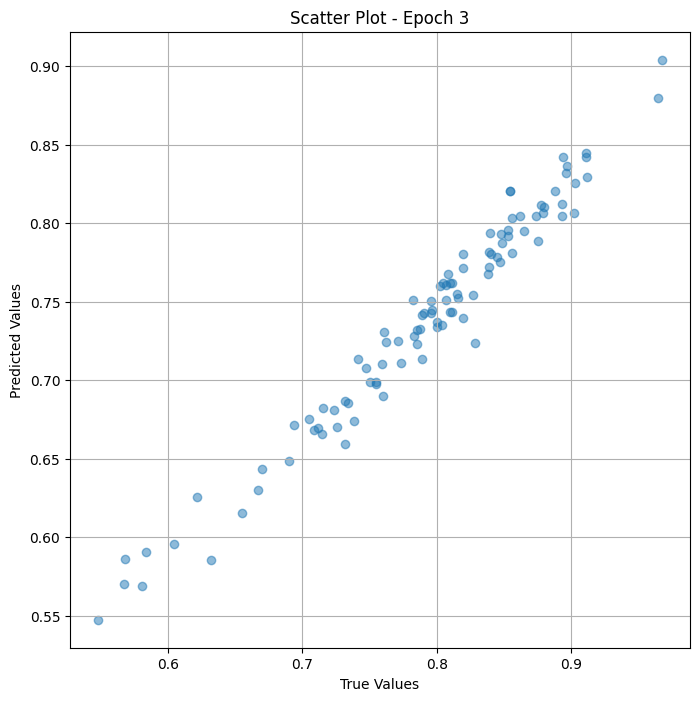

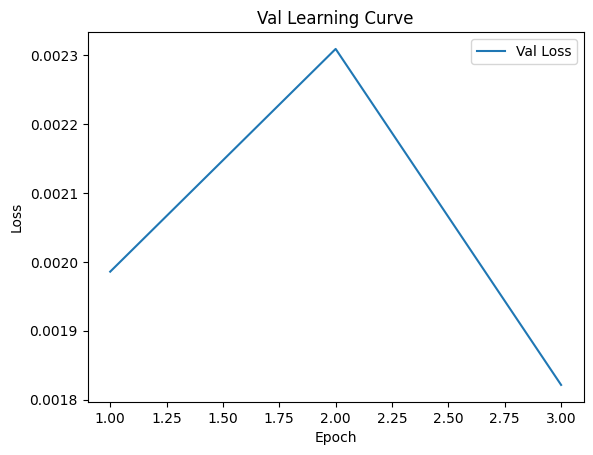


 Epoch: (4/10) Loss = 0.0016892466228455305

 Epoch: (4/10) Loss_rmse = 0.04110044613480568

 Epoch: (4/10) R^2 = 0.6140262484550476

 Epoch: (4/10) MAE = 0.03879278898239136
Spearman correlation coefficient: SignificanceResult(statistic=0.9821008297101487, pvalue=5.887826757349915e-70)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651685

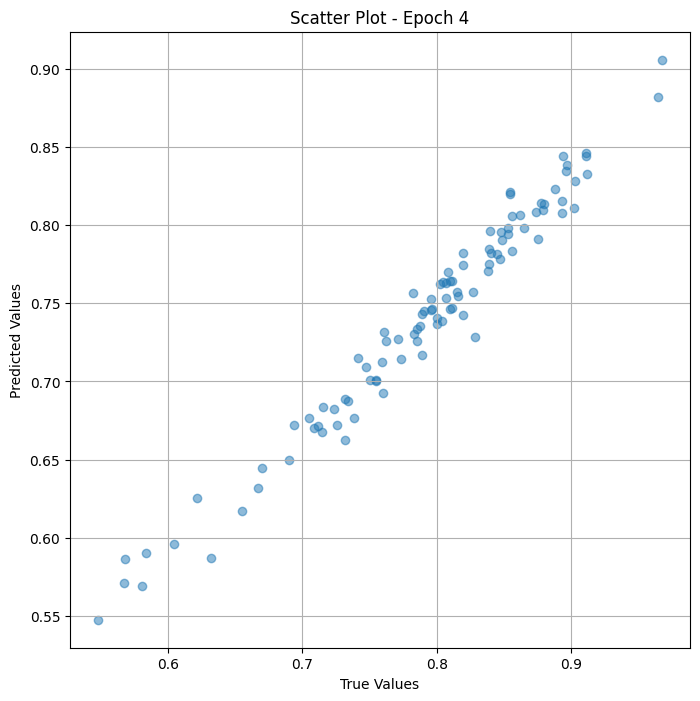

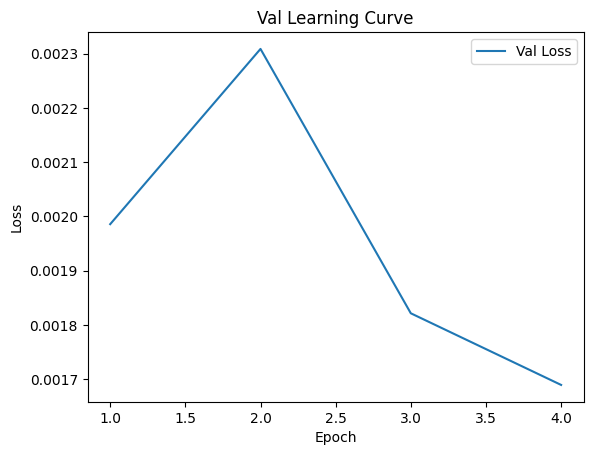


 Epoch: (5/10) Loss = 0.0014549079351127148

 Epoch: (5/10) Loss_rmse = 0.038143254816532135

 Epoch: (5/10) R^2 = 0.6675699949264526

 Epoch: (5/10) MAE = 0.035772666335105896
Spearman correlation coefficient: SignificanceResult(statistic=0.9832538645659529, pvalue=2.6434243150026833e-71)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651

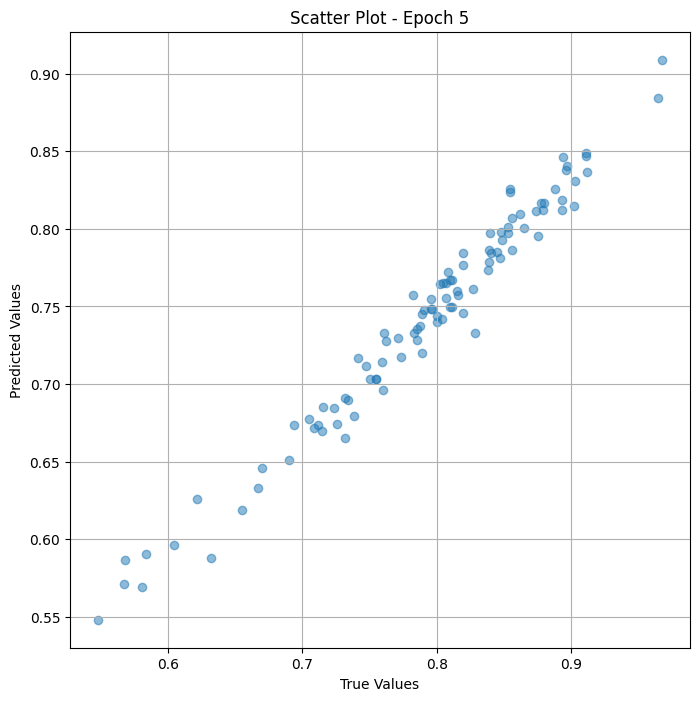

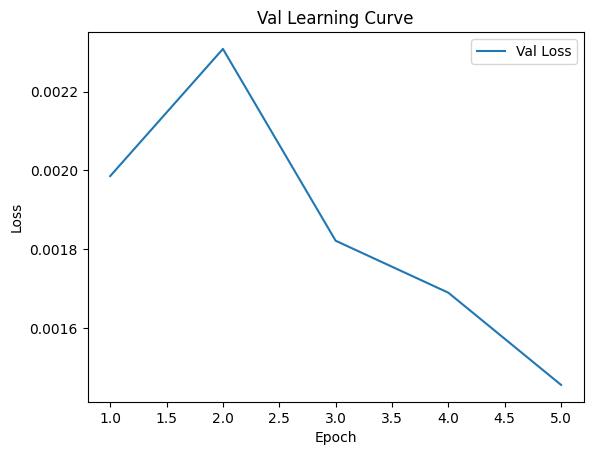


 Epoch: (6/10) Loss = 0.0013181461254134774

 Epoch: (6/10) Loss_rmse = 0.03630628064274788

 Epoch: (6/10) R^2 = 0.6988185048103333

 Epoch: (6/10) MAE = 0.03379237651824951
Spearman correlation coefficient: SignificanceResult(statistic=0.9848681133640785, pvalue=2.3391903505707395e-73)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.865168

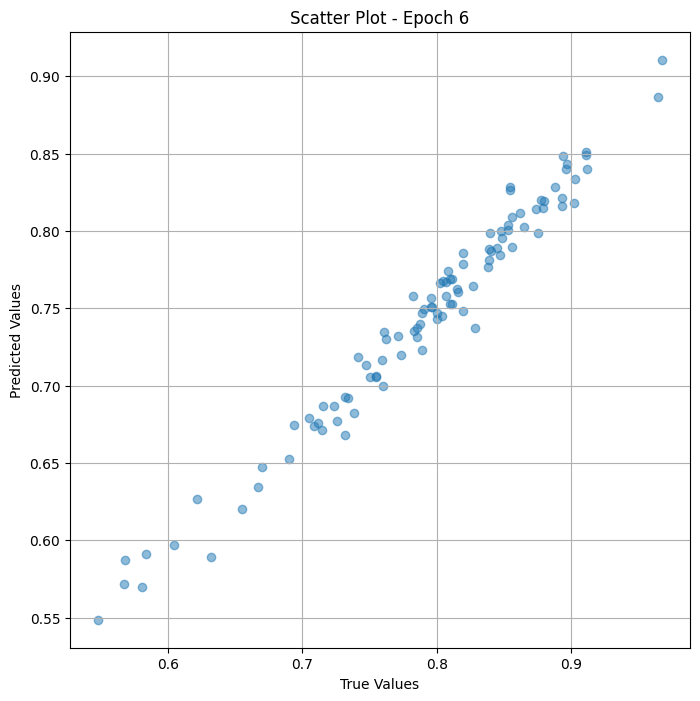

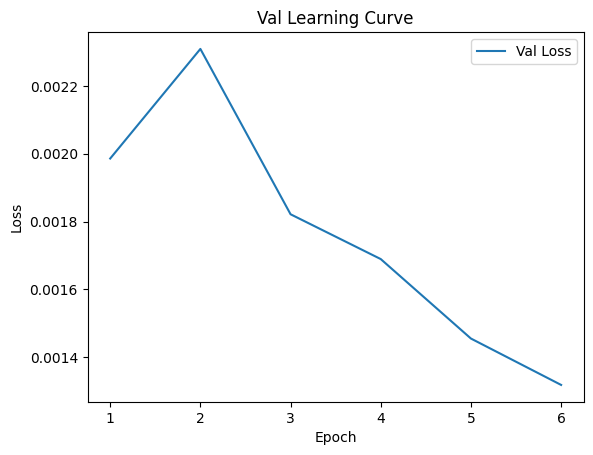


 Epoch: (7/10) Loss = 0.001180989551357925

 Epoch: (7/10) Loss_rmse = 0.03436552733182907

 Epoch: (7/10) R^2 = 0.7301572561264038

 Epoch: (7/10) MAE = 0.03205561637878418
Spearman correlation coefficient: SignificanceResult(statistic=0.9849766342916837, pvalue=1.6719382681521886e-73)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651685

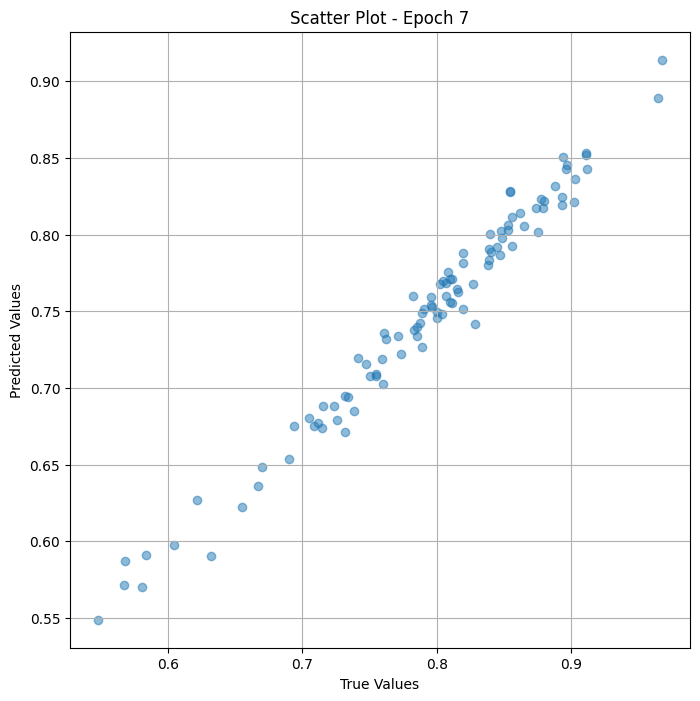

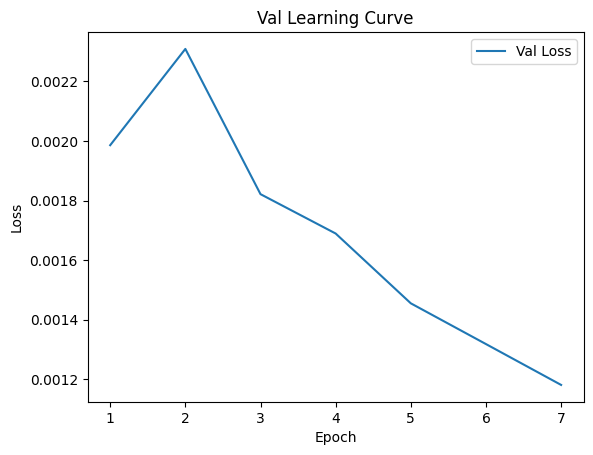


 Epoch: (8/10) Loss = 0.0010585207492113113

 Epoch: (8/10) Loss_rmse = 0.03253491595387459

 Epoch: (8/10) R^2 = 0.758139967918396

 Epoch: (8/10) MAE = 0.03028257191181183
Spearman correlation coefficient: SignificanceResult(statistic=0.9861771470533149, pvalue=3.428269722423393e-75)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651685,

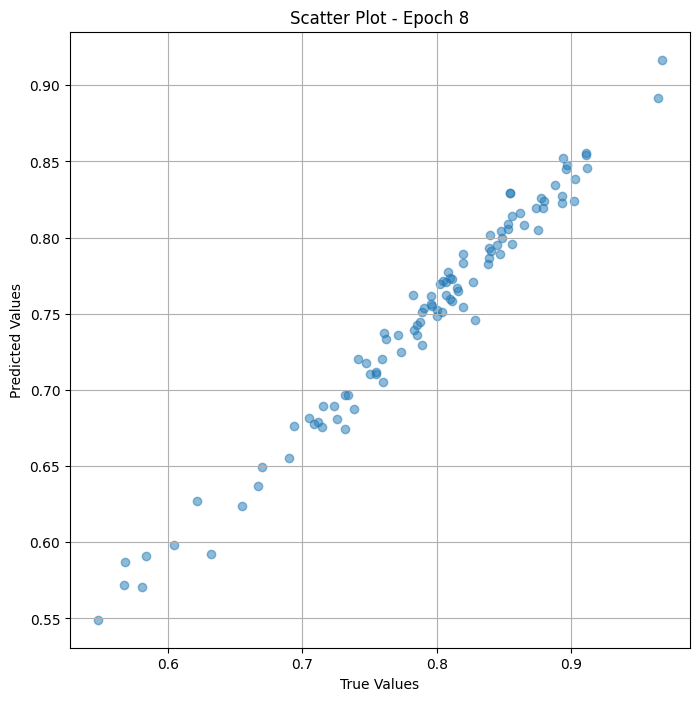

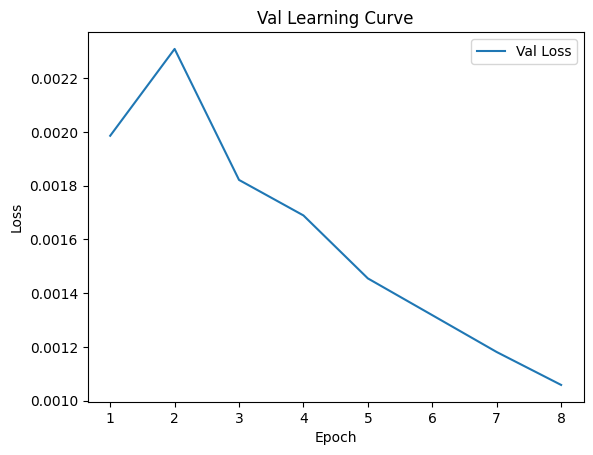


 Epoch: (9/10) Loss = 0.0009588374523445964

 Epoch: (9/10) Loss_rmse = 0.030965100973844528

 Epoch: (9/10) R^2 = 0.7809164524078369

 Epoch: (9/10) MAE = 0.028639256954193115
Spearman correlation coefficient: SignificanceResult(statistic=0.9868418377348963, pvalue=3.4332332937433495e-76)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.8651

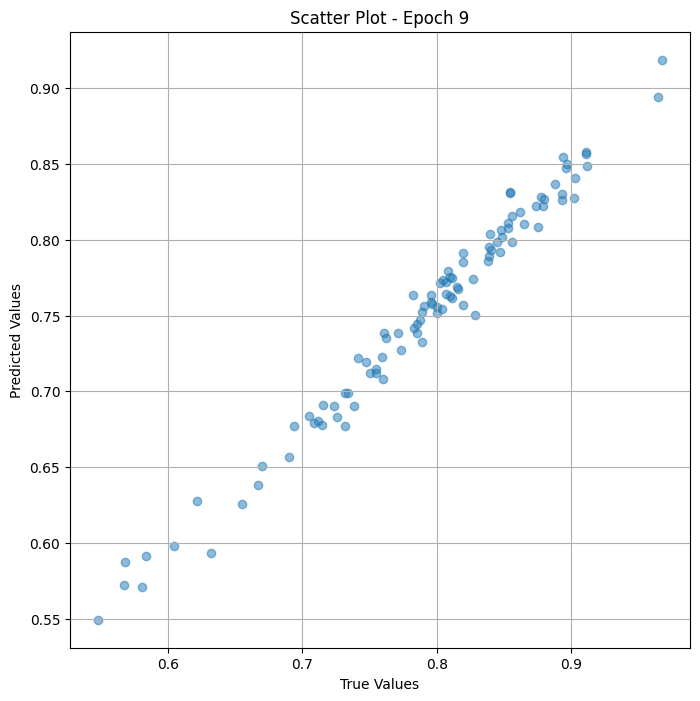

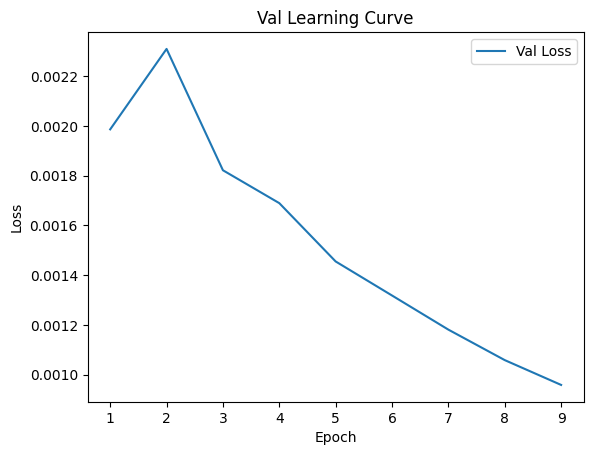


 Epoch: (10/10) Loss = 0.0008602943271398544

 Epoch: (10/10) Loss_rmse = 0.029330775141716003

 Epoch: (10/10) R^2 = 0.8034324645996094

 Epoch: (10/10) MAE = 0.026828303933143616
Spearman correlation coefficient: SignificanceResult(statistic=0.988435738859096, pvalue=8.23664674591193e-79)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.79646015, 0.8396226, 0.8064516, 0.9019608, 0.6213592, 0.72321427, 0.6321839, 0.875, 0.89285713, 0.83908045, 0.78899086, 0.7592593, 0.78494626, 0.84042555, 0.80833334, 0.7830189, 0.78494626, 0.7256637, 0.84821427, 0.82828283, 0.73195875, 0.8148148, 0.9029126, 0.69, 0.8557692, 0.81609195, 0.8114754, 0.5673077, 0.8787879, 0.86206895, 0.84705883, 0.75490195, 0.9108911, 0.8, 0.89719623, 0.89320385, 0.6666667, 0.6041667, 0.79591835, 0.8043478, 0.70873785, 0.9111111, 0.5480769, 0.71428573, 0.76086956, 0.75454545, 0.5681818, 0.7383177, 0.81914896, 0.8113208, 0.7875, 0.7154471, 0.65486723, 0.8558559, 0.75961536, 0.865

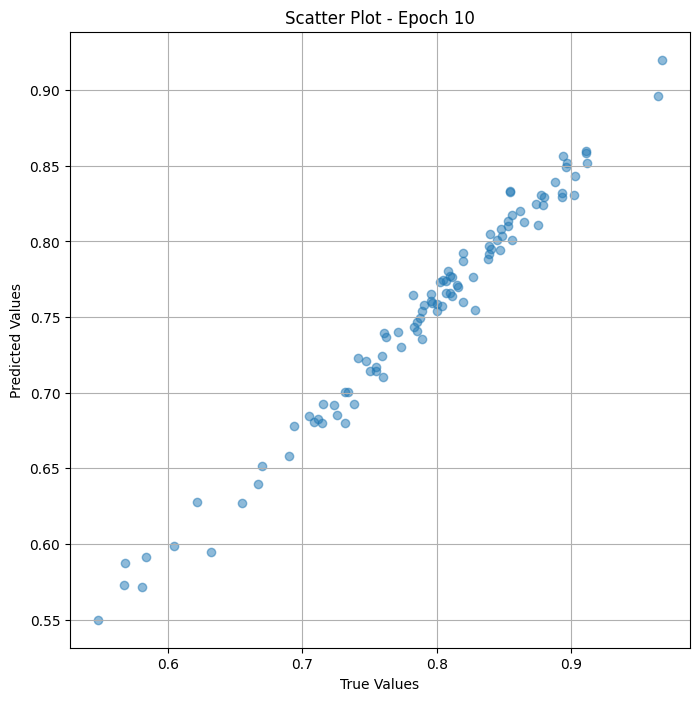

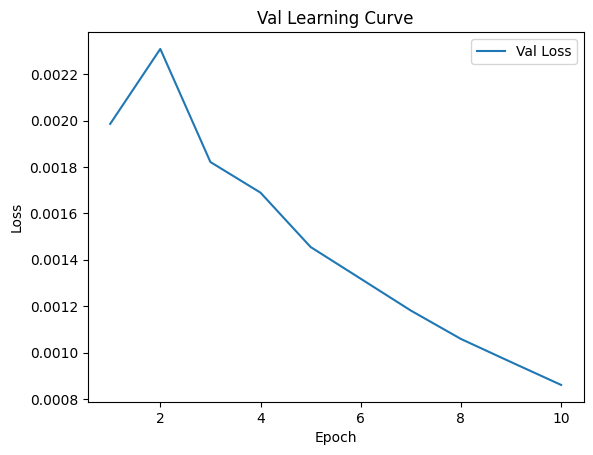

In [ ]:
# val the model and save weights
fit(10, model_res_val  , val_dl )
torch.save(model_res_val.state_dict(), "model_weights_s")

## Test

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-4 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 0
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)


 Epoch: (1/30) Loss = 4.24353129346855e-05

 Epoch: (1/30) Loss_rmse = 0.006514239124953747

 Epoch: (1/30) R^2 = 0.9986920356750488

 Epoch: (1/30) MAE = 0.005975693464279175
Spearman correlation coefficient: SignificanceResult(statistic=0.9777364800066496, pvalue=1.5157135167028416e-65)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

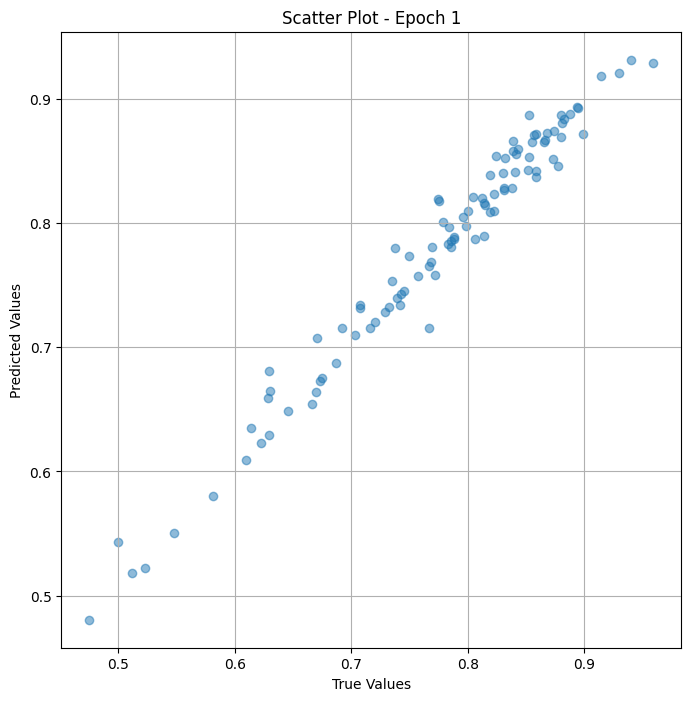

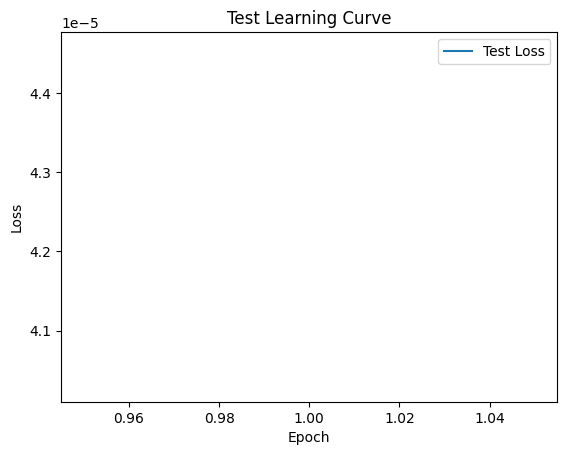


 Epoch: (2/30) Loss = 0.0004840248730033636

 Epoch: (2/30) Loss_rmse = 0.022000566124916077

 Epoch: (2/30) R^2 = 0.9850810766220093

 Epoch: (2/30) MAE = 0.015213675796985626
Spearman correlation coefficient: SignificanceResult(statistic=0.9538349888752127, pvalue=6.741233394047902e-51)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

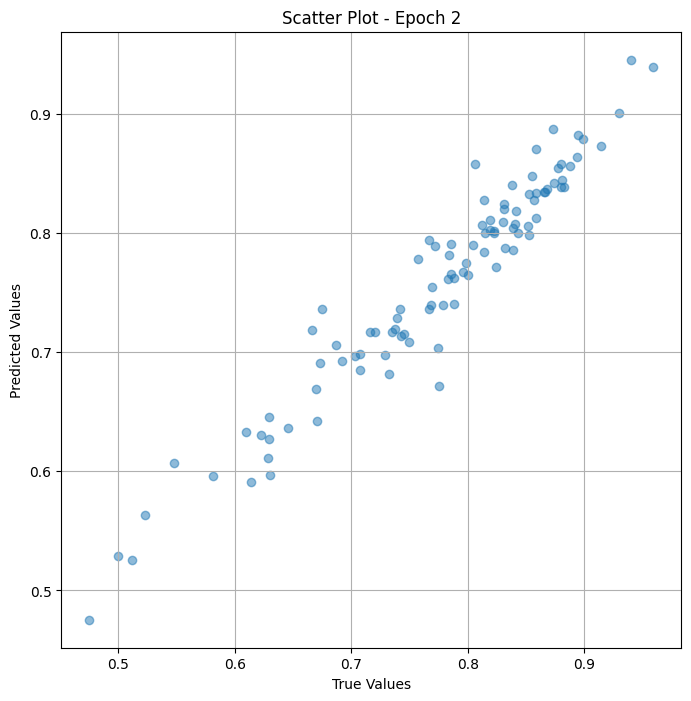

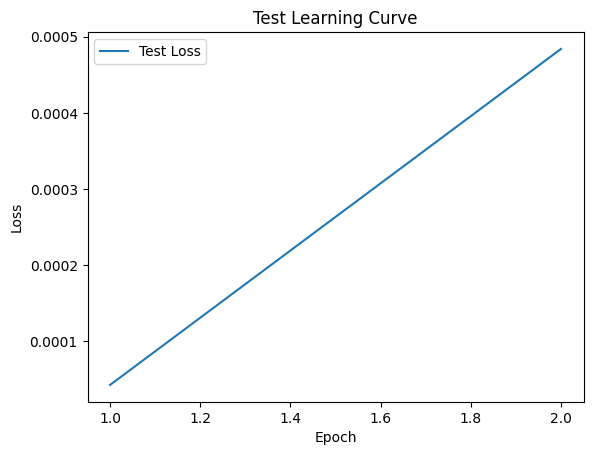


 Epoch: (3/30) Loss = 0.0004009850090369582

 Epoch: (3/30) Loss_rmse = 0.020024610683321953

 Epoch: (3/30) R^2 = 0.9876405596733093

 Epoch: (3/30) MAE = 0.016837991774082184
Spearman correlation coefficient: SignificanceResult(statistic=0.9121701591304858, pvalue=3.4368651148367505e-38)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

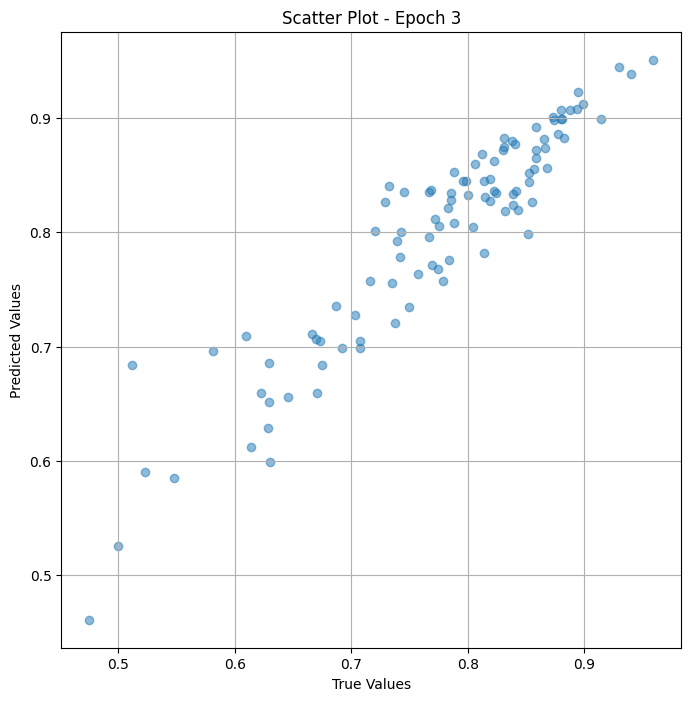

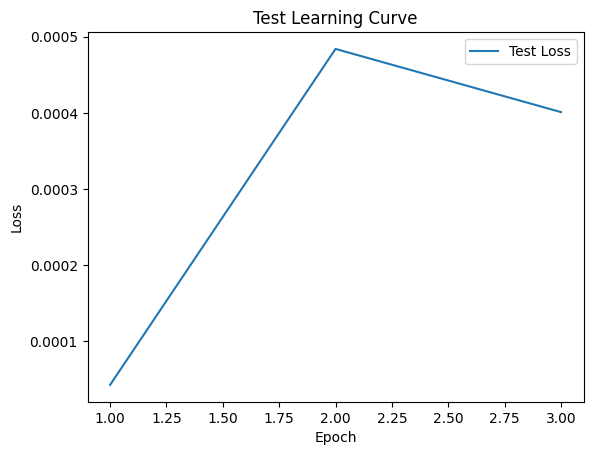


 Epoch: (4/30) Loss = 0.0009268700960092247

 Epoch: (4/30) Loss_rmse = 0.030444541946053505

 Epoch: (4/30) R^2 = 0.9714314341545105

 Epoch: (4/30) MAE = 0.02156045287847519
Spearman correlation coefficient: SignificanceResult(statistic=0.9507286089268024, pvalue=1.3393485768305217e-49)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

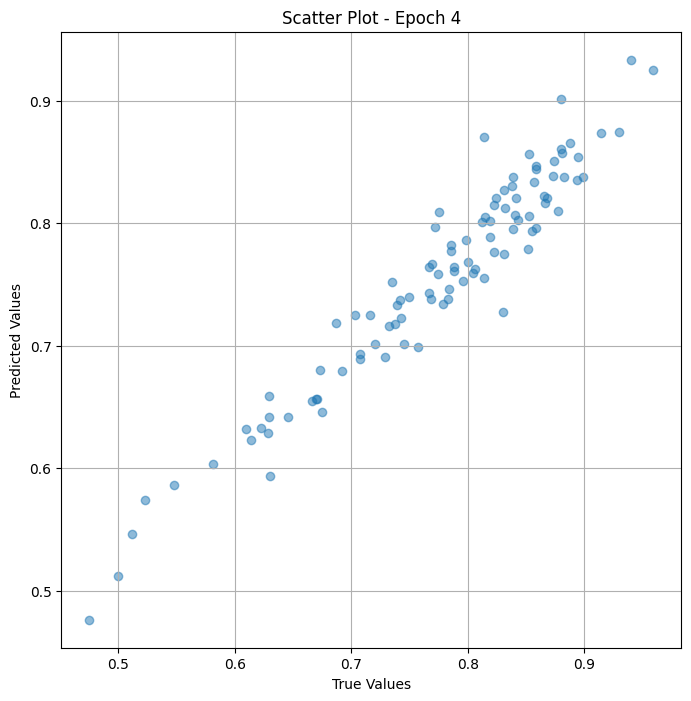

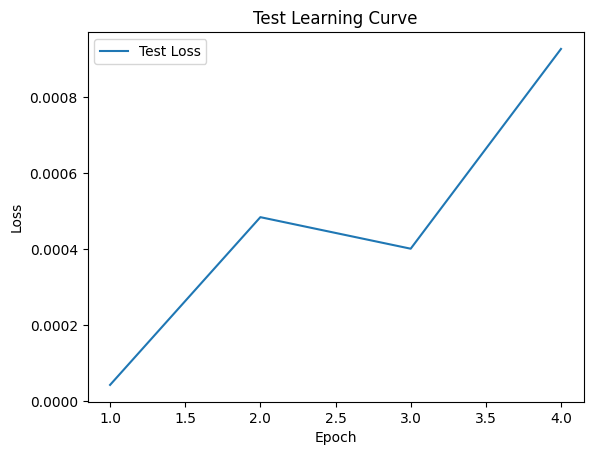


 Epoch: (5/30) Loss = 0.000276366772595793

 Epoch: (5/30) Loss_rmse = 0.01662428304553032

 Epoch: (5/30) R^2 = 0.9914816617965698

 Epoch: (5/30) MAE = 0.012614503502845764
Spearman correlation coefficient: SignificanceResult(statistic=0.9874015267893675, pvalue=4.5079325561756495e-77)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.766

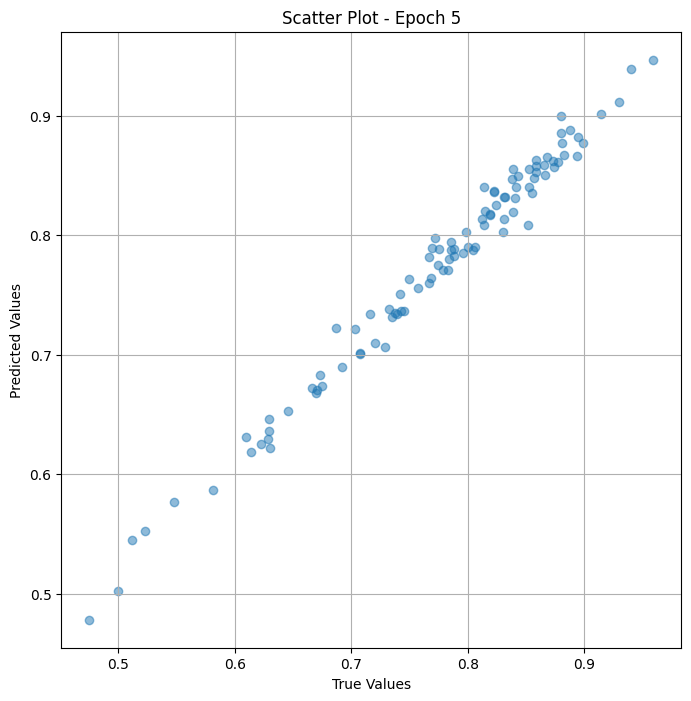

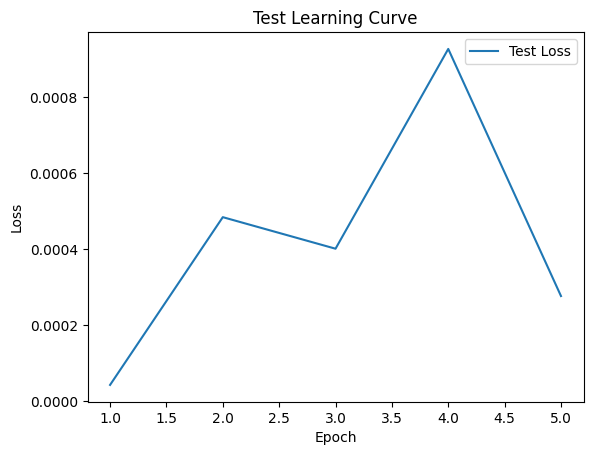


 Epoch: (6/30) Loss = 0.00012718168727587909

 Epoch: (6/30) Loss_rmse = 0.011277485638856888

 Epoch: (6/30) R^2 = 0.9960799217224121

 Epoch: (6/30) MAE = 0.008523322641849518
Spearman correlation coefficient: SignificanceResult(statistic=0.9901077398885285, pvalue=5.553123315875815e-82)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

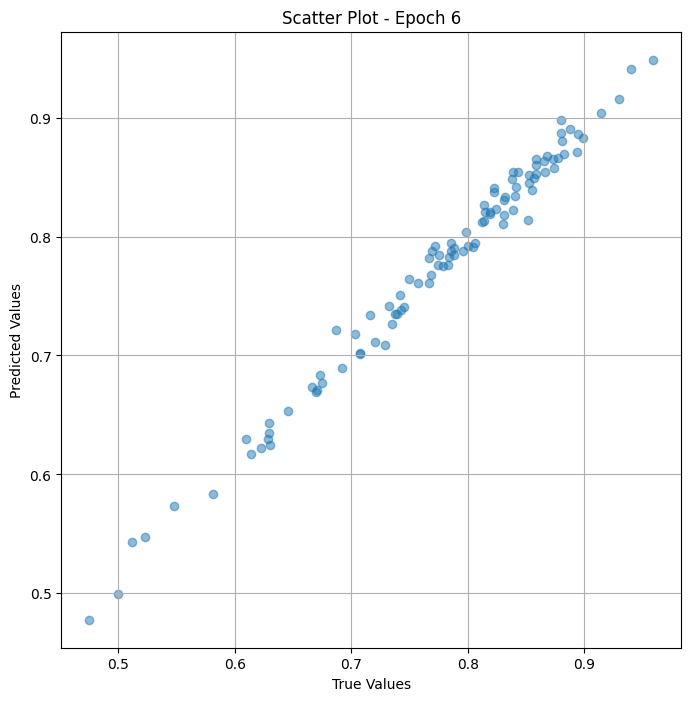

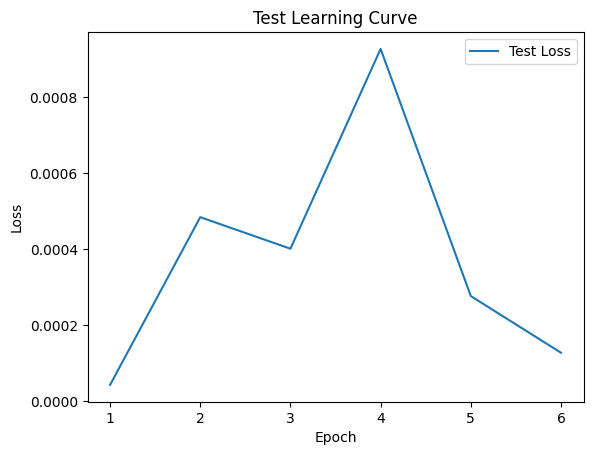


 Epoch: (7/30) Loss = 6.152452988317236e-05

 Epoch: (7/30) Loss_rmse = 0.007843757048249245

 Epoch: (7/30) R^2 = 0.998103678226471

 Epoch: (7/30) MAE = 0.00493583083152771
Spearman correlation coefficient: SignificanceResult(statistic=0.992556218406817, pvalue=9.204402106153926e-88)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76666

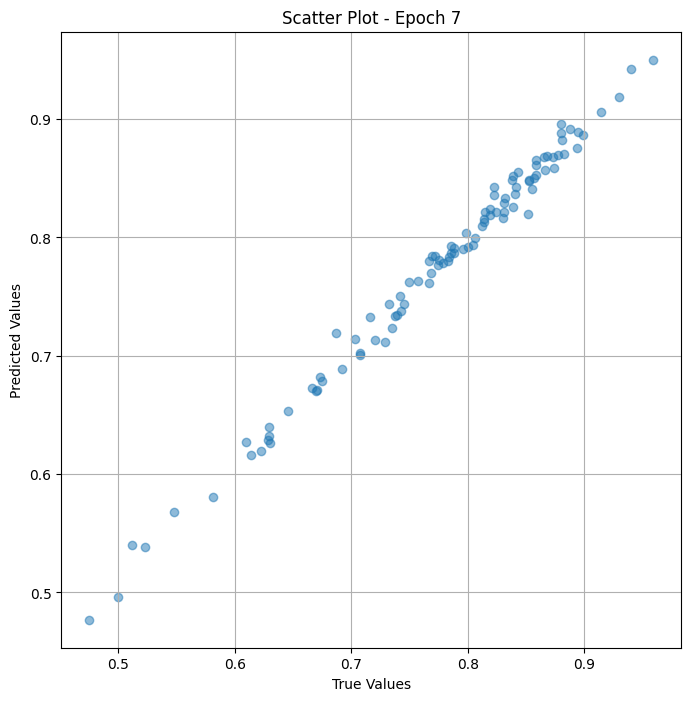

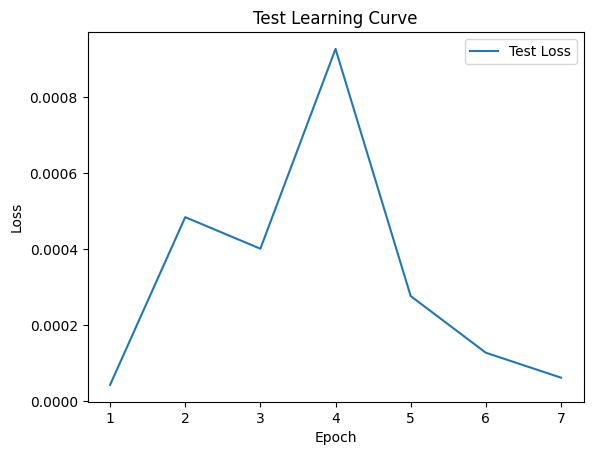


 Epoch: (8/30) Loss = 5.4638607252854854e-05

 Epoch: (8/30) Loss_rmse = 0.007391793187707663

 Epoch: (8/30) R^2 = 0.9983158707618713

 Epoch: (8/30) MAE = 0.005336470901966095
Spearman correlation coefficient: SignificanceResult(statistic=0.9941975807376365, pvalue=7.860101613742728e-93)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

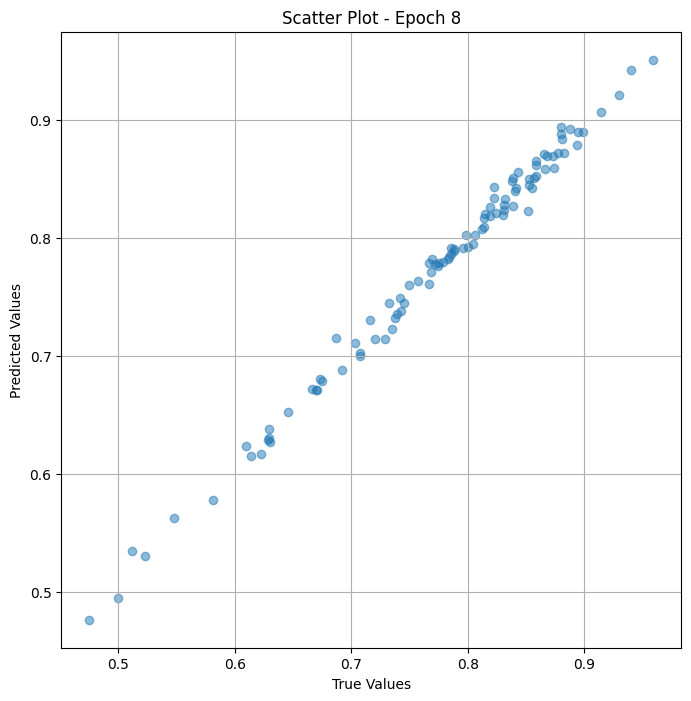

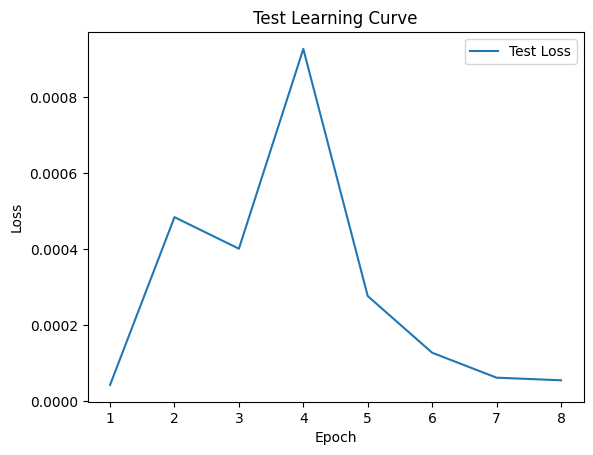


 Epoch: (9/30) Loss = 5.22790287504904e-05

 Epoch: (9/30) Loss_rmse = 0.007230423856526613

 Epoch: (9/30) R^2 = 0.9983886480331421

 Epoch: (9/30) MAE = 0.005304954946041107
Spearman correlation coefficient: SignificanceResult(statistic=0.9944417503405685, pvalue=1.0478115802551642e-93)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.76

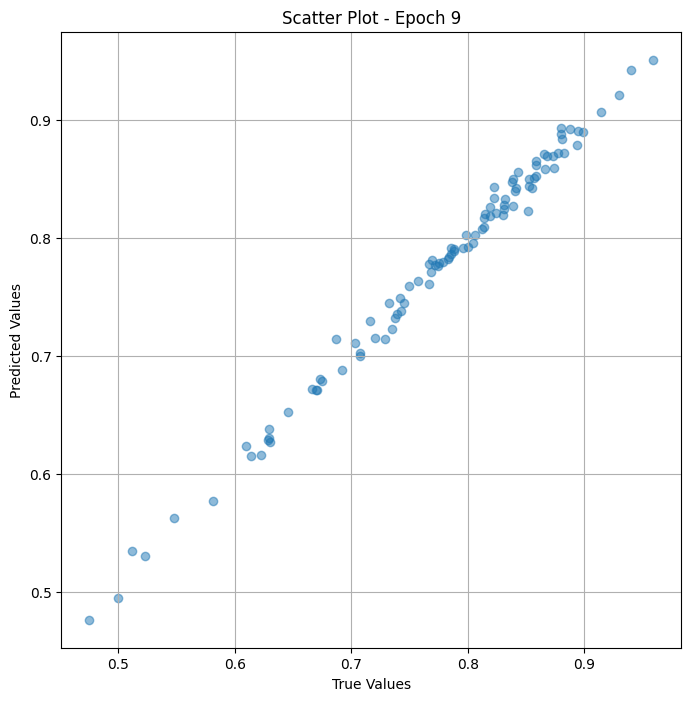

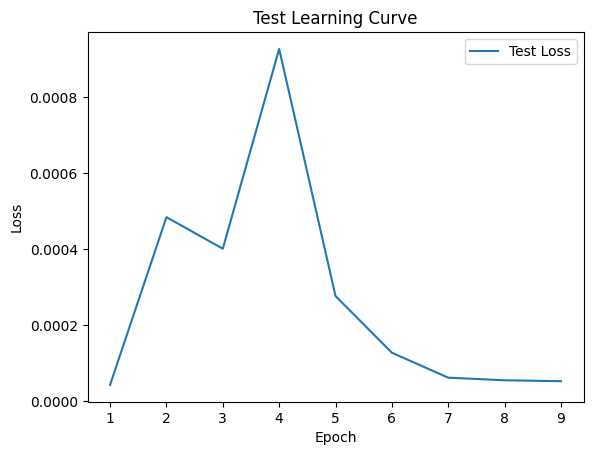


 Epoch: (10/30) Loss = 4.88847799715586e-05

 Epoch: (10/30) Loss_rmse = 0.0069917649962008

 Epoch: (10/30) R^2 = 0.9984932541847229

 Epoch: (10/30) MAE = 0.005158737301826477
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.7

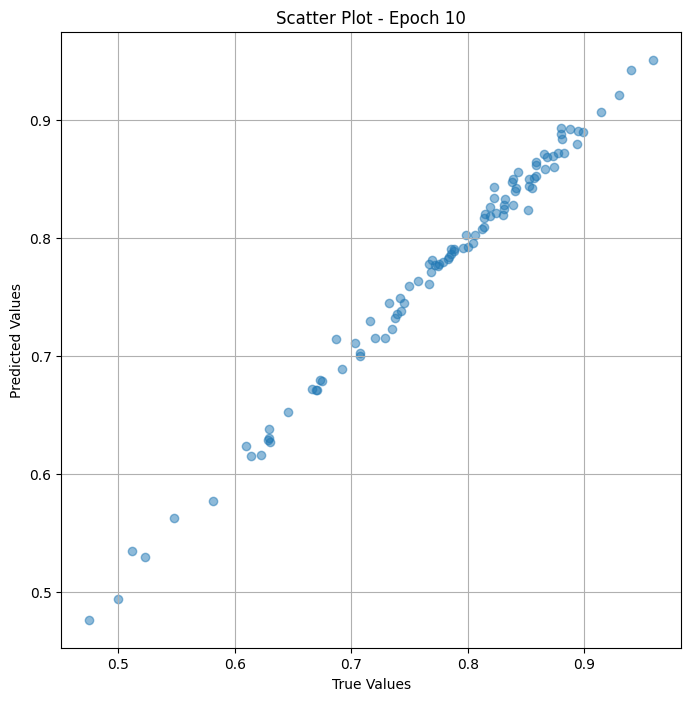

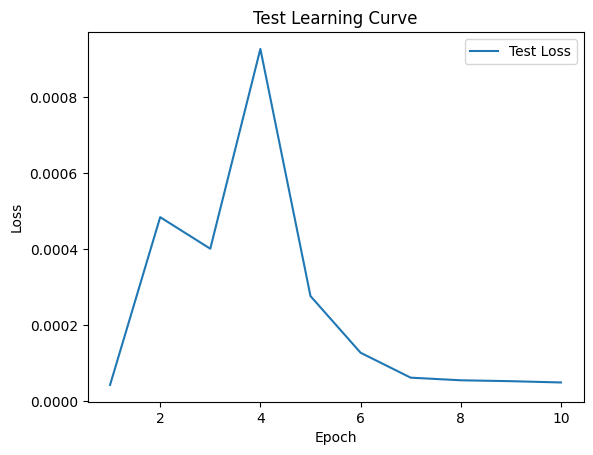


 Epoch: (11/30) Loss = 4.739672294817865e-05

 Epoch: (11/30) Loss_rmse = 0.006884527858346701

 Epoch: (11/30) R^2 = 0.9985390901565552

 Epoch: (11/30) MAE = 0.005077153444290161
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

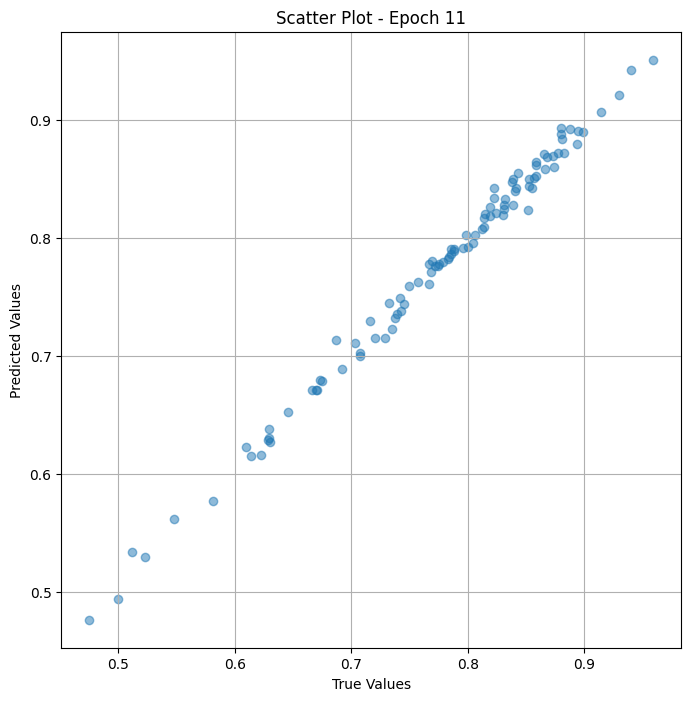

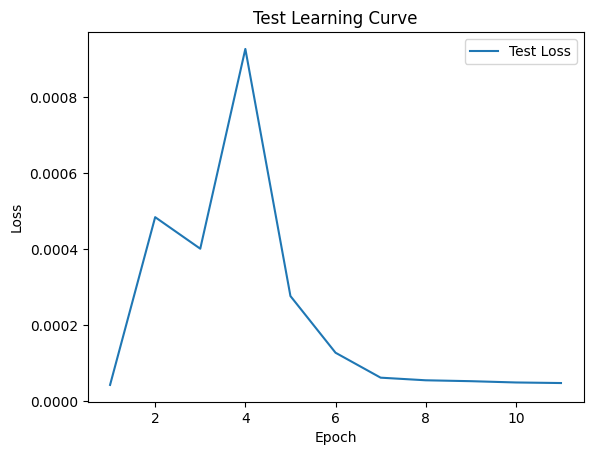


 Epoch: (12/30) Loss = 4.695550524047576e-05

 Epoch: (12/30) Loss_rmse = 0.006852408871054649

 Epoch: (12/30) R^2 = 0.998552680015564

 Epoch: (12/30) MAE = 0.0050506070256233215
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

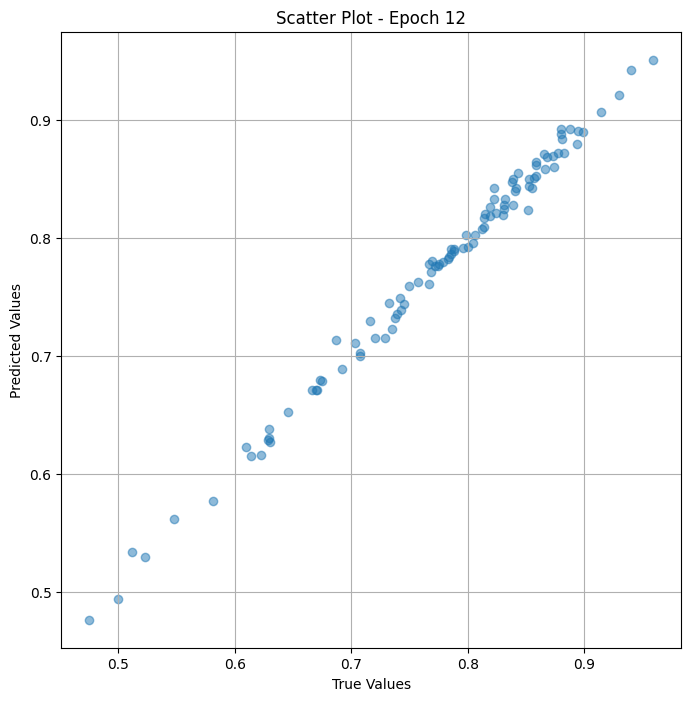

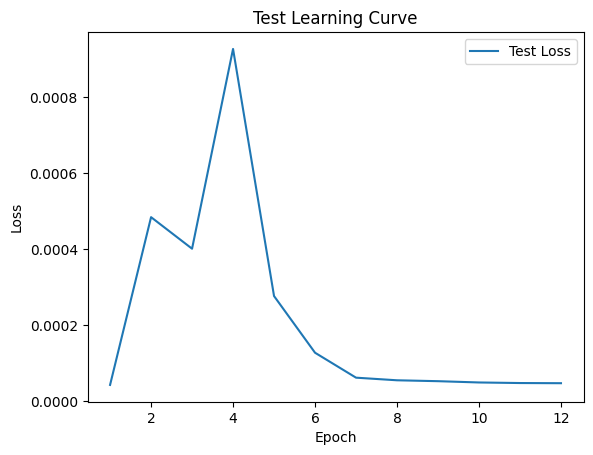


 Epoch: (13/30) Loss = 4.647676905733533e-05

 Epoch: (13/30) Loss_rmse = 0.006817387416958809

 Epoch: (13/30) R^2 = 0.9985674619674683

 Epoch: (13/30) MAE = 0.005020350217819214
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

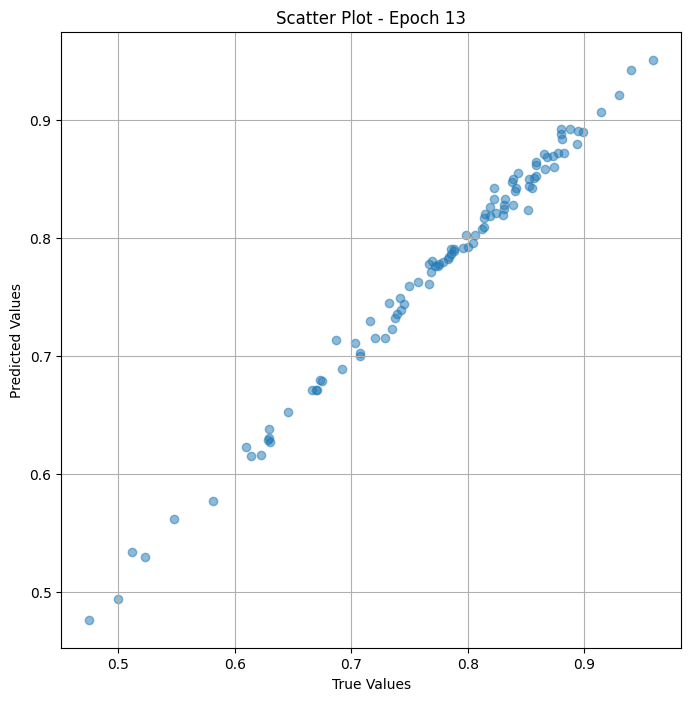

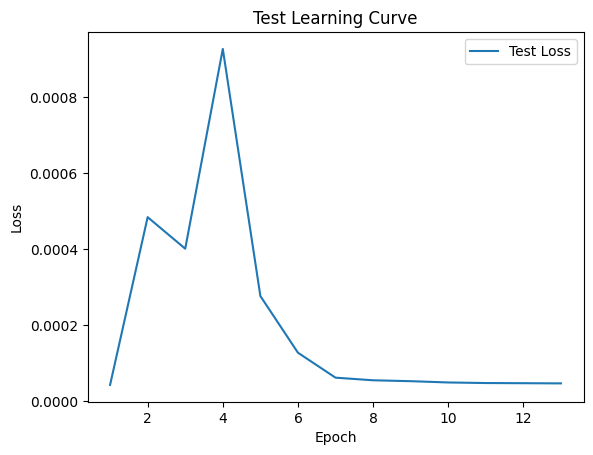


 Epoch: (14/30) Loss = 4.6312870836118236e-05

 Epoch: (14/30) Loss_rmse = 0.006805356126278639

 Epoch: (14/30) R^2 = 0.9985725283622742

 Epoch: (14/30) MAE = 0.005009688436985016
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

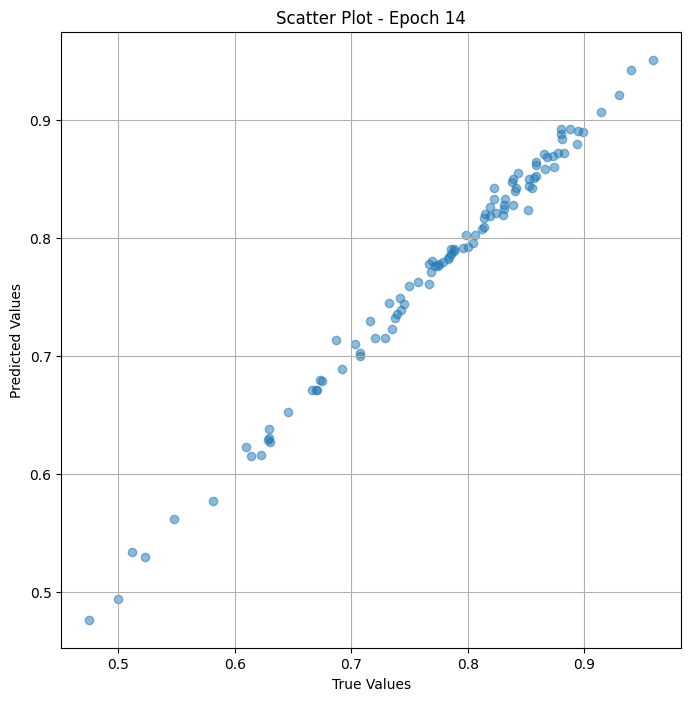

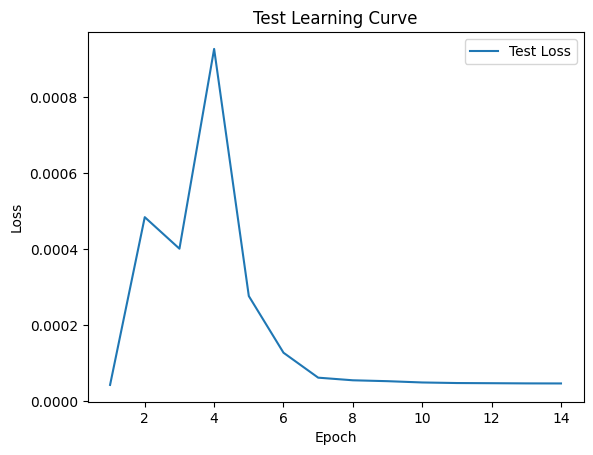


 Epoch: (15/30) Loss = 4.6291504986584187e-05

 Epoch: (15/30) Loss_rmse = 0.006803785916417837

 Epoch: (15/30) R^2 = 0.9985731840133667

 Epoch: (15/30) MAE = 0.005008310079574585
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

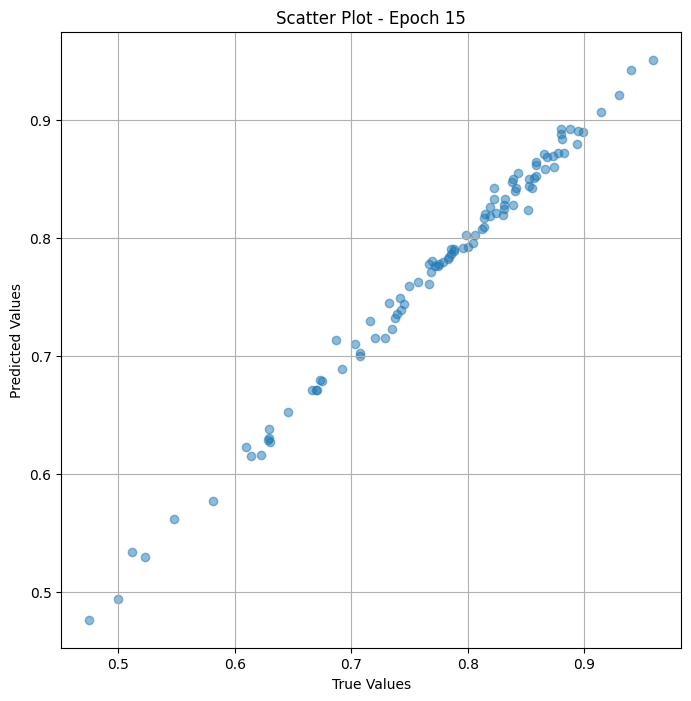

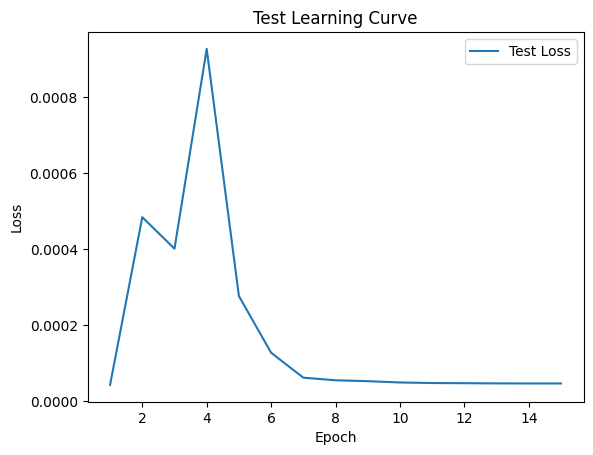


 Epoch: (16/30) Loss = 4.6269466110970825e-05

 Epoch: (16/30) Loss_rmse = 0.006802166346460581

 Epoch: (16/30) R^2 = 0.9985738396644592

 Epoch: (16/30) MAE = 0.0050068870186805725
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906

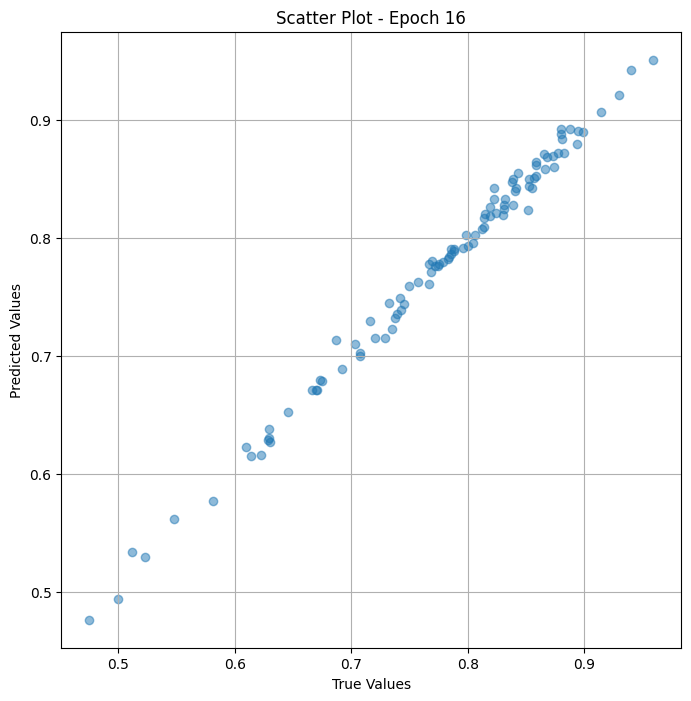

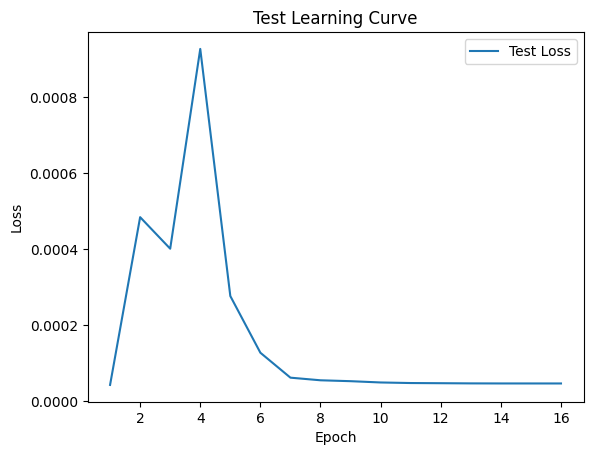


 Epoch: (17/30) Loss = 4.624660869012587e-05

 Epoch: (17/30) Loss_rmse = 0.006800485774874687

 Epoch: (17/30) R^2 = 0.9985745549201965

 Epoch: (17/30) MAE = 0.005005374550819397
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

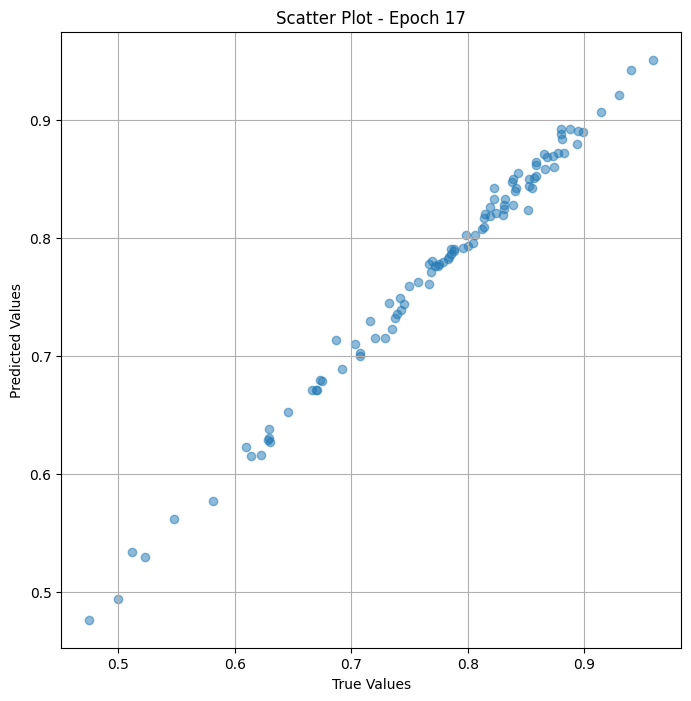

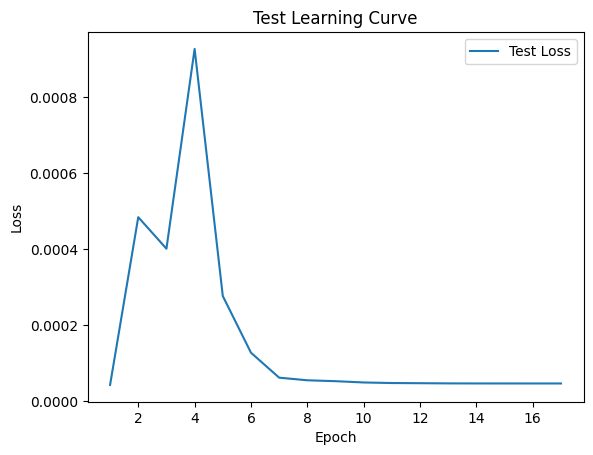


 Epoch: (18/30) Loss = 4.622199776349589e-05

 Epoch: (18/30) Loss_rmse = 0.006798676215112209

 Epoch: (18/30) R^2 = 0.9985753297805786

 Epoch: (18/30) MAE = 0.005003772675991058
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

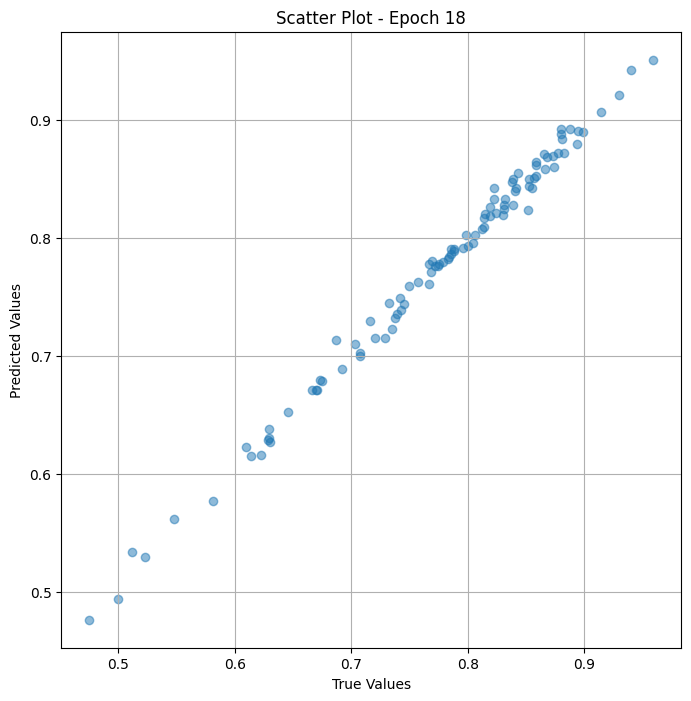

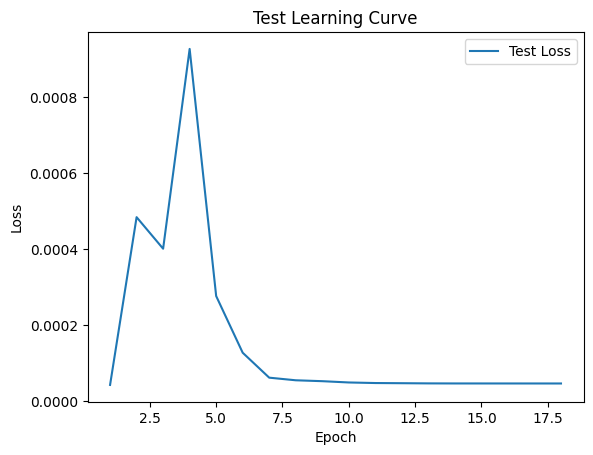


 Epoch: (19/30) Loss = 4.619775791070424e-05

 Epoch: (19/30) Loss_rmse = 0.006796893198043108

 Epoch: (19/30) R^2 = 0.9985760450363159

 Epoch: (19/30) MAE = 0.005002185702323914
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

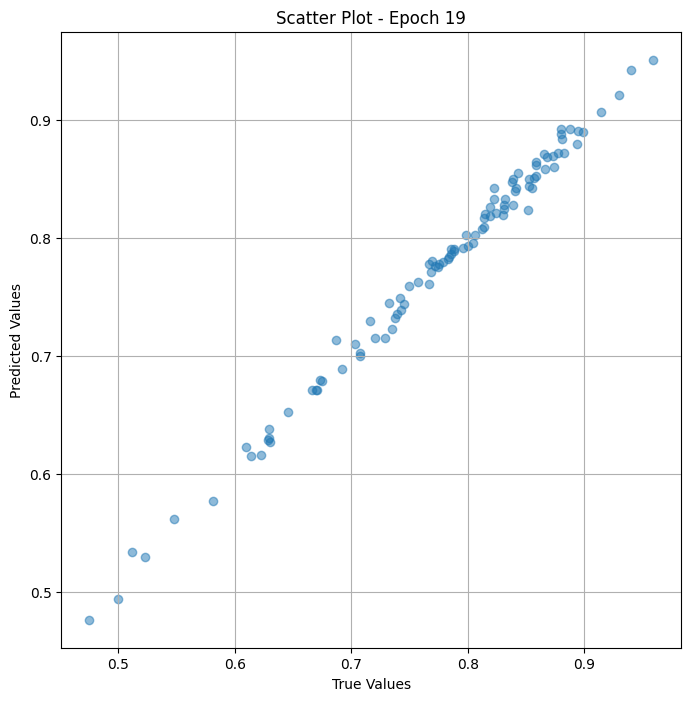

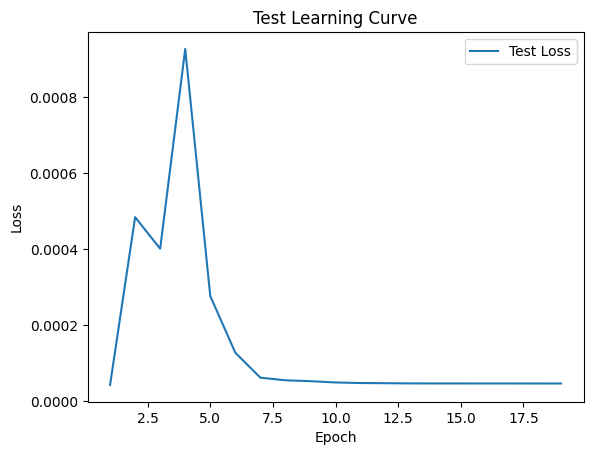


 Epoch: (20/30) Loss = 4.617162994691171e-05

 Epoch: (20/30) Loss_rmse = 0.006794970948249102

 Epoch: (20/30) R^2 = 0.9985768795013428

 Epoch: (20/30) MAE = 0.005000464618206024
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

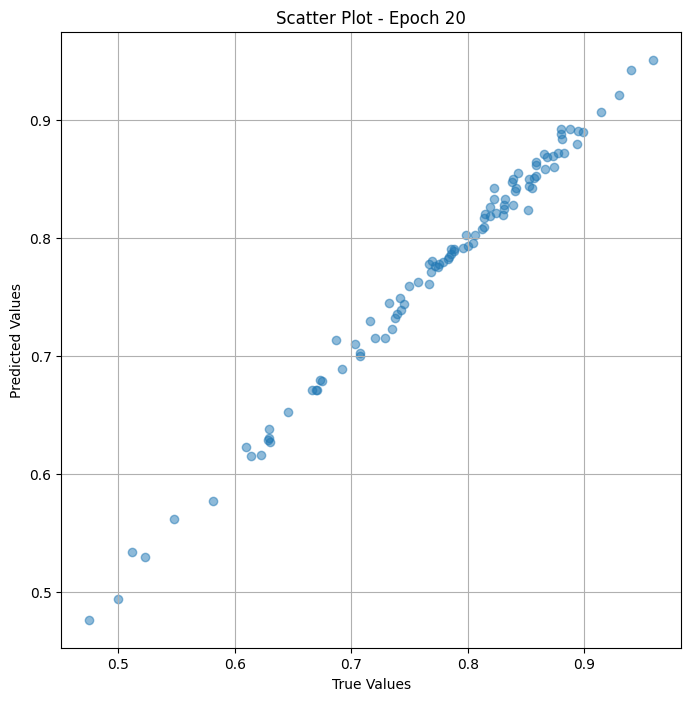

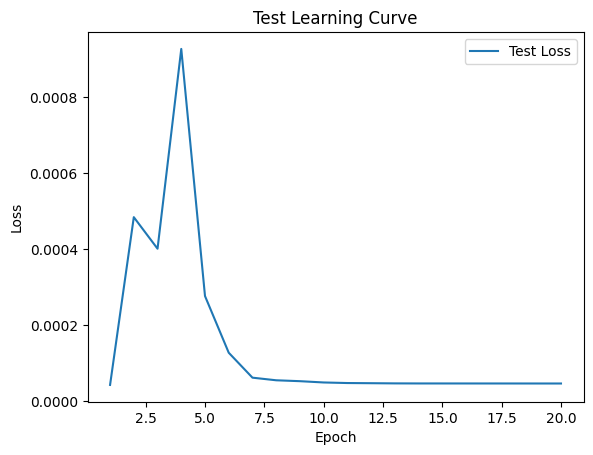


 Epoch: (21/30) Loss = 4.614604404196143e-05

 Epoch: (21/30) Loss_rmse = 0.006793087814003229

 Epoch: (21/30) R^2 = 0.9985776543617249

 Epoch: (21/30) MAE = 0.004998758435249329
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

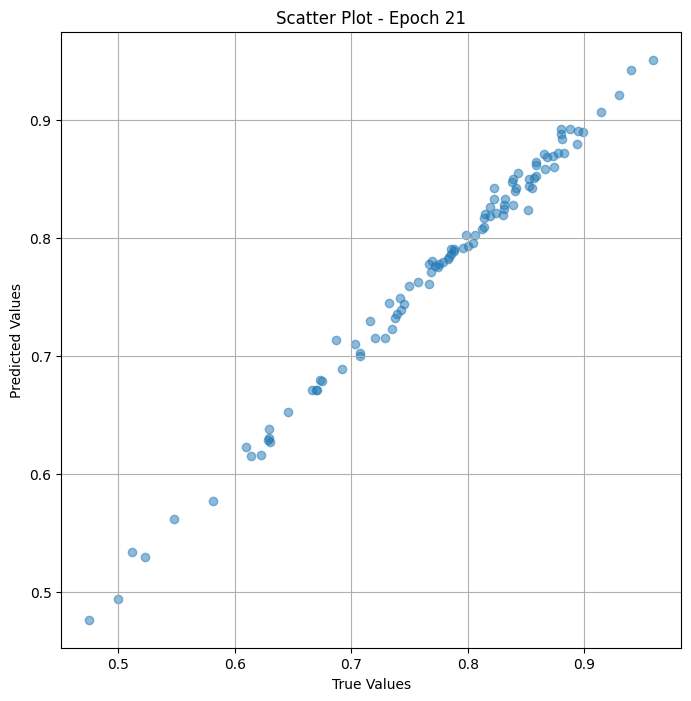

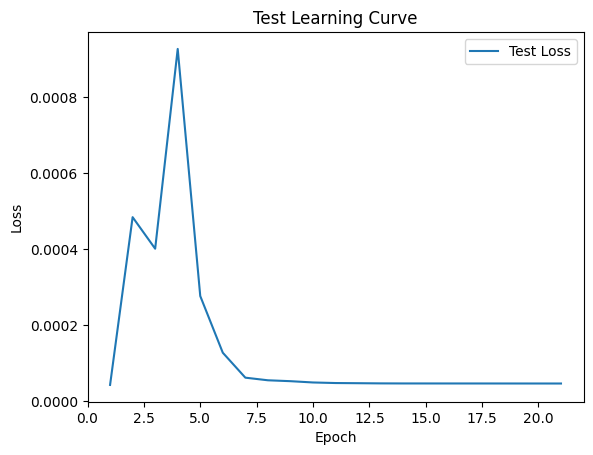


 Epoch: (22/30) Loss = 4.611808617482893e-05

 Epoch: (22/30) Loss_rmse = 0.006791030056774616

 Epoch: (22/30) R^2 = 0.9985785484313965

 Epoch: (22/30) MAE = 0.004996843636035919
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

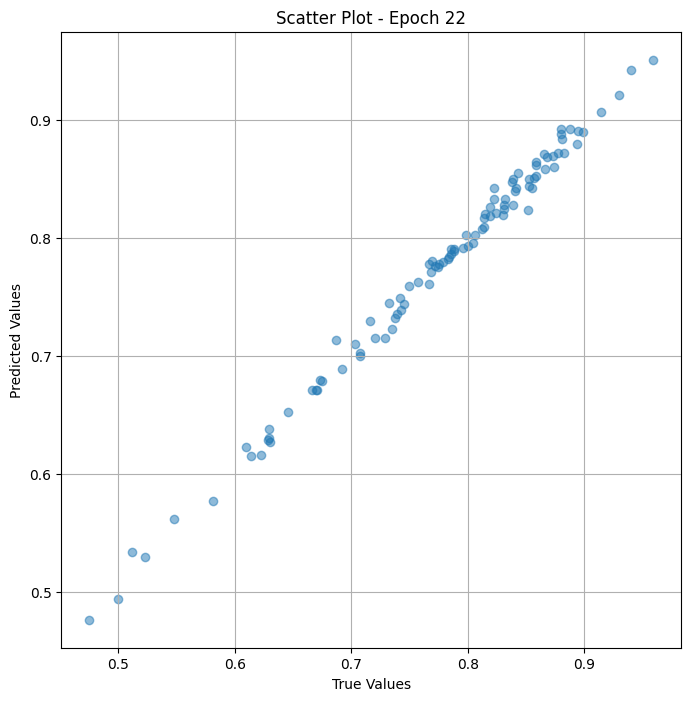

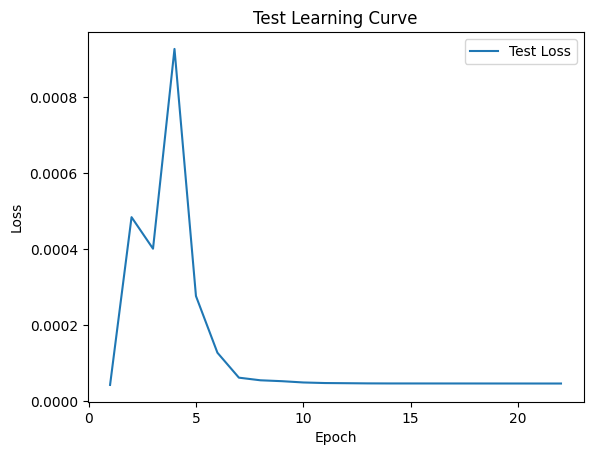


 Epoch: (23/30) Loss = 4.608953167917207e-05

 Epoch: (23/30) Loss_rmse = 0.0067889271304011345

 Epoch: (23/30) R^2 = 0.9985793828964233

 Epoch: (23/30) MAE = 0.004994988441467285
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

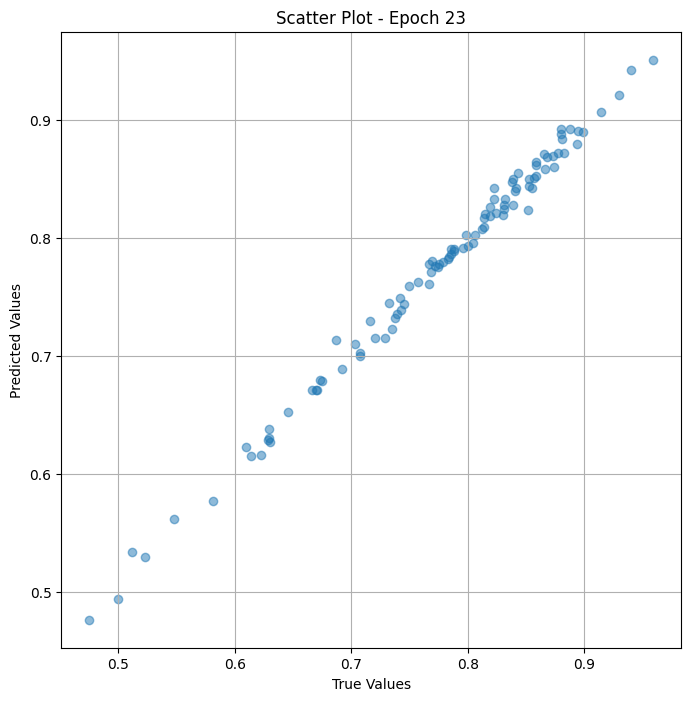

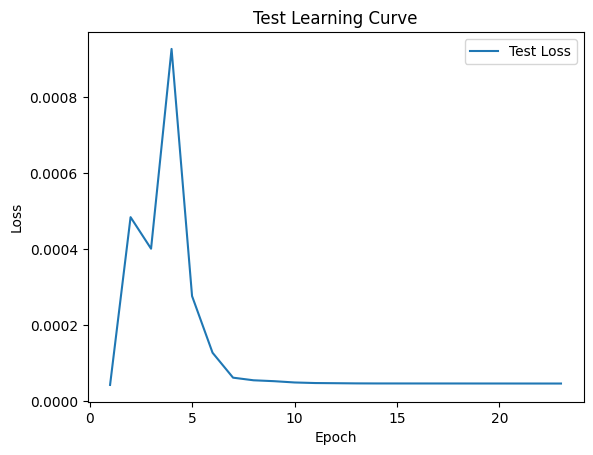


 Epoch: (24/30) Loss = 4.6060577005846426e-05

 Epoch: (24/30) Loss_rmse = 0.006786794401705265

 Epoch: (24/30) R^2 = 0.998580276966095

 Epoch: (24/30) MAE = 0.004993043839931488
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

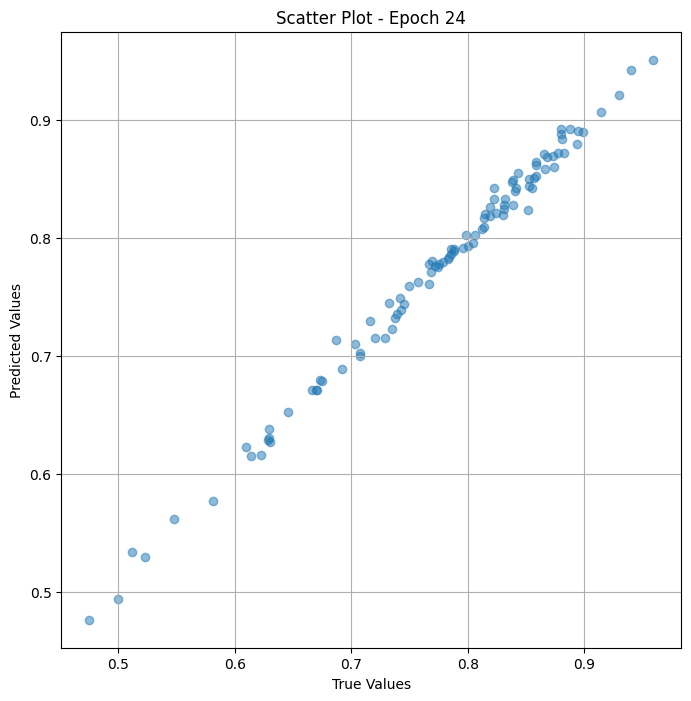

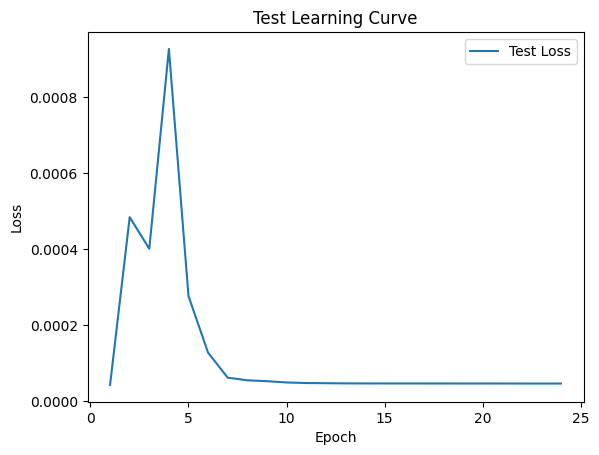


 Epoch: (25/30) Loss = 4.603151683113538e-05

 Epoch: (25/30) Loss_rmse = 0.006784652825444937

 Epoch: (25/30) R^2 = 0.9985811710357666

 Epoch: (25/30) MAE = 0.0049910768866539
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0.

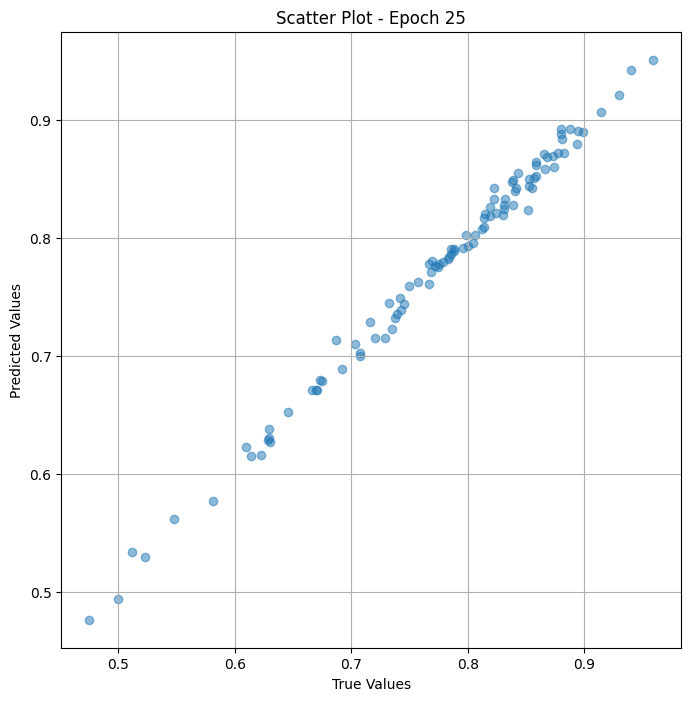

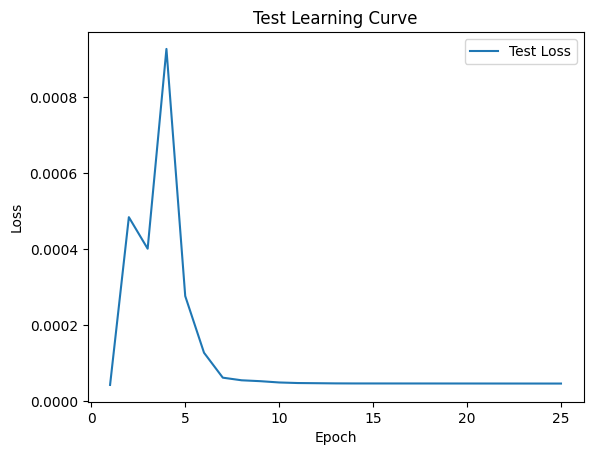


 Epoch: (26/30) Loss = 4.600121974362992e-05

 Epoch: (26/30) Loss_rmse = 0.006782419979572296

 Epoch: (26/30) R^2 = 0.998582124710083

 Epoch: (26/30) MAE = 0.004989027976989746
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 0

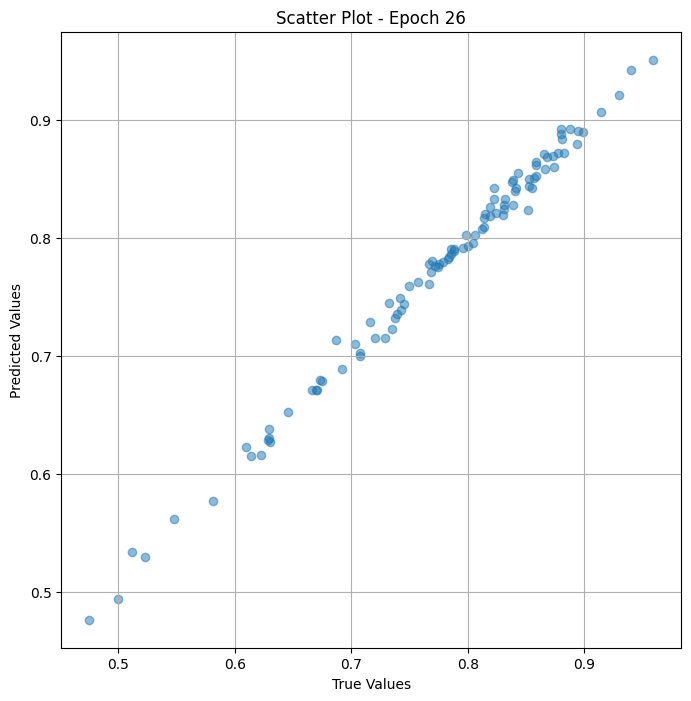

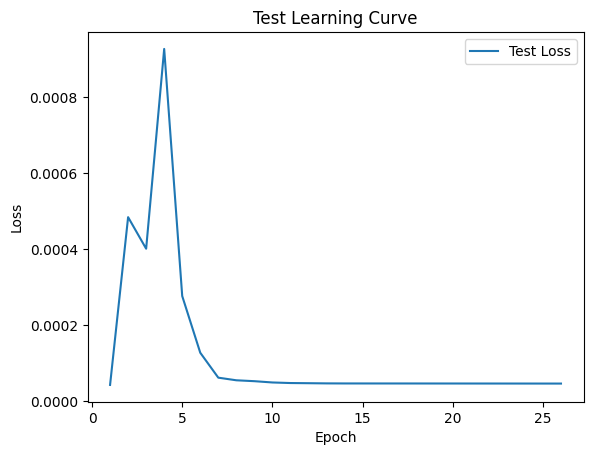


 Epoch: (27/30) Loss = 4.5970238716108724e-05

 Epoch: (27/30) Loss_rmse = 0.006780135445296764

 Epoch: (27/30) R^2 = 0.9985830783843994

 Epoch: (27/30) MAE = 0.004986993968486786
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

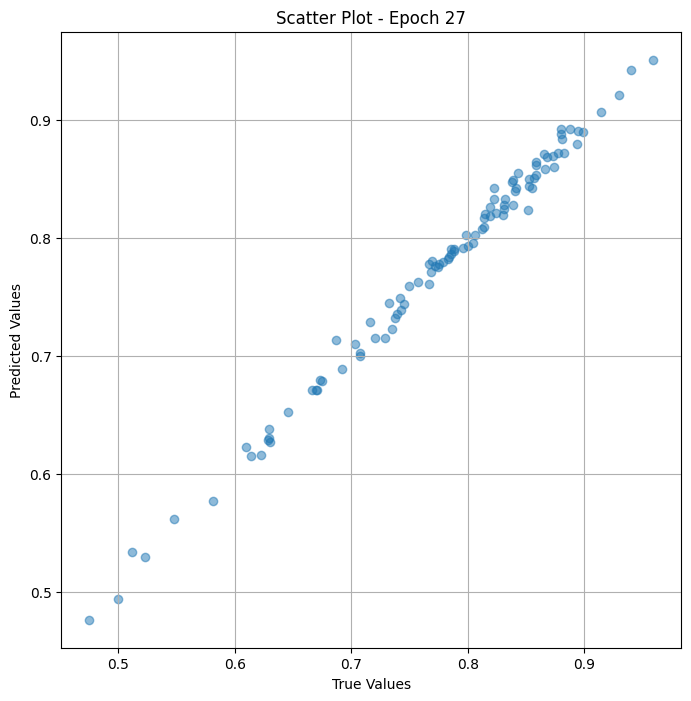

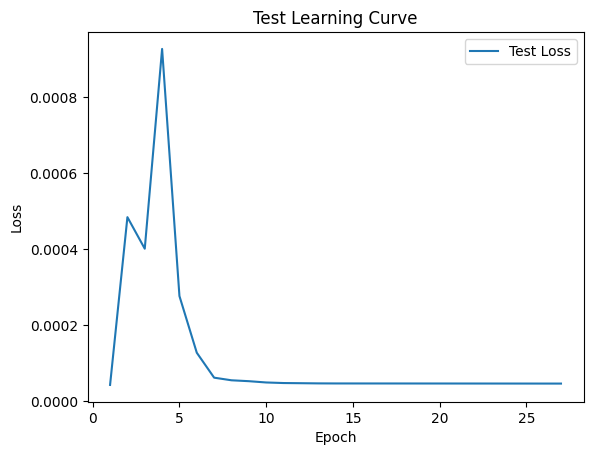


 Epoch: (28/30) Loss = 4.593962512444705e-05

 Epoch: (28/30) Loss_rmse = 0.006777877453714609

 Epoch: (28/30) R^2 = 0.9985840320587158

 Epoch: (28/30) MAE = 0.004984945058822632
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906, 

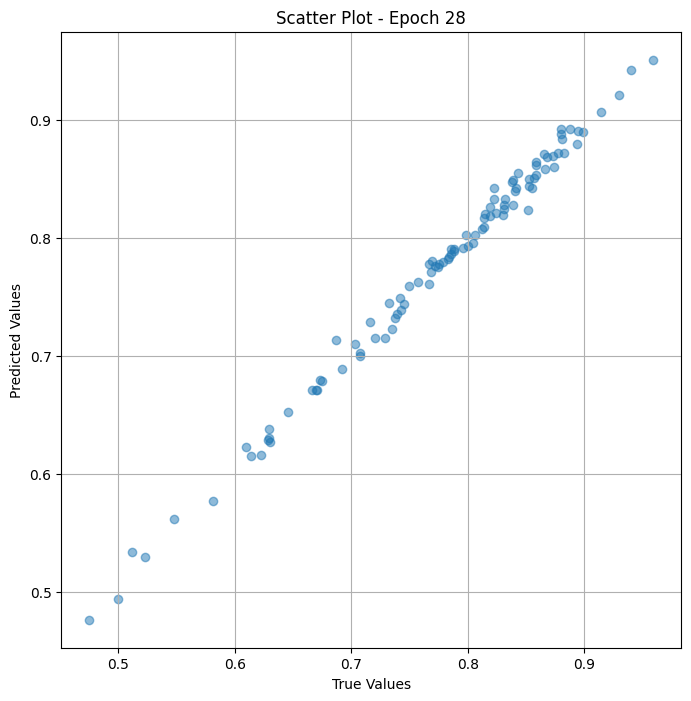

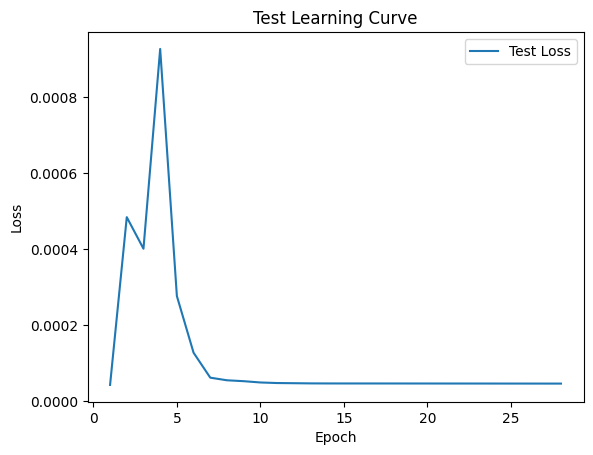


 Epoch: (29/30) Loss = 4.590886601363309e-05

 Epoch: (29/30) Loss_rmse = 0.0067756082862615585

 Epoch: (29/30) R^2 = 0.9985849857330322

 Epoch: (29/30) MAE = 0.004982843995094299
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

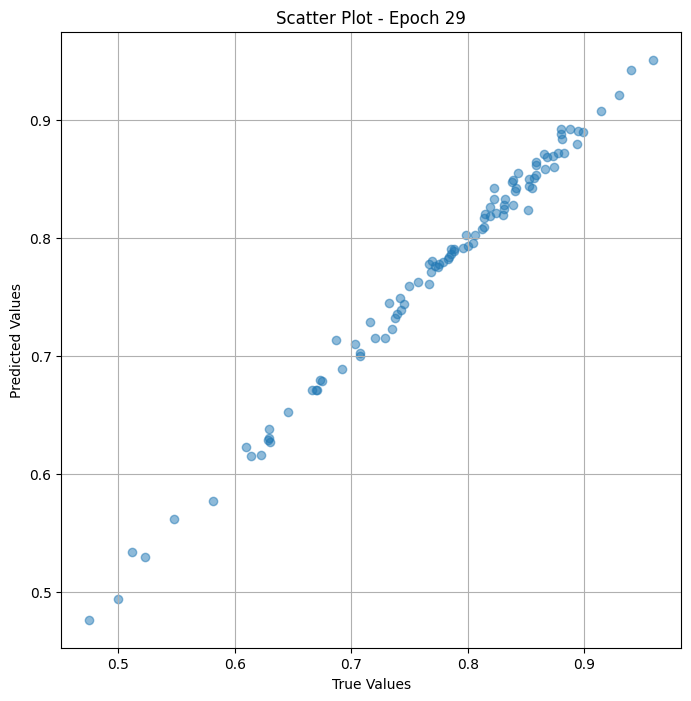

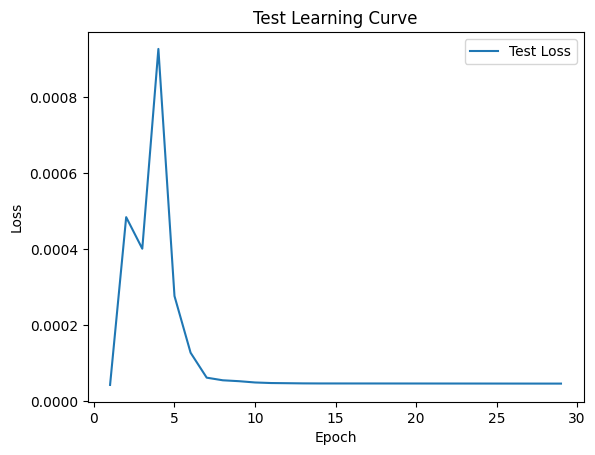


 Epoch: (30/30) Loss = 4.587657531374134e-05

 Epoch: (30/30) Loss_rmse = 0.0067732250317931175

 Epoch: (30/30) R^2 = 0.9985859394073486

 Epoch: (30/30) MAE = 0.004980660974979401
Spearman correlation coefficient: SignificanceResult(statistic=0.994577400119975, pvalue=3.2906403530306144e-94)

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.71590906, 0.73913044, 0.5809524, 0.78571427, 0.74285716, 0.8938053, 0.85263157, 0.84090906, 0.60952383, 0.7207207, 0.78846157, 0.88297874, 0.54761904, 0.6869565, 0.7326733, 0.72897196, 0.6752137, 0.78333336, 0.6226415, 0.75757575, 0.88095236, 0.8666667, 0.6292135, 0.8651685, 0.5232558, 0.5113636, 0.7685185, 0.74489796, 0.8877551, 0.8152174, 0.8738739, 0.8229167, 0.78846157, 0.8301887, 0.8224299, 0.9302326, 0.8804348, 0.7717391, 0.6458333, 0.74157304, 0.78571427, 0.8313253, 0.87341774, 0.7029703, 0.9591837, 0.79816514, 0.81914896, 0.83116883, 0.85858583, 0.6666667, 0.87777776, 0.79611653, 0.8125, 0.8584906,

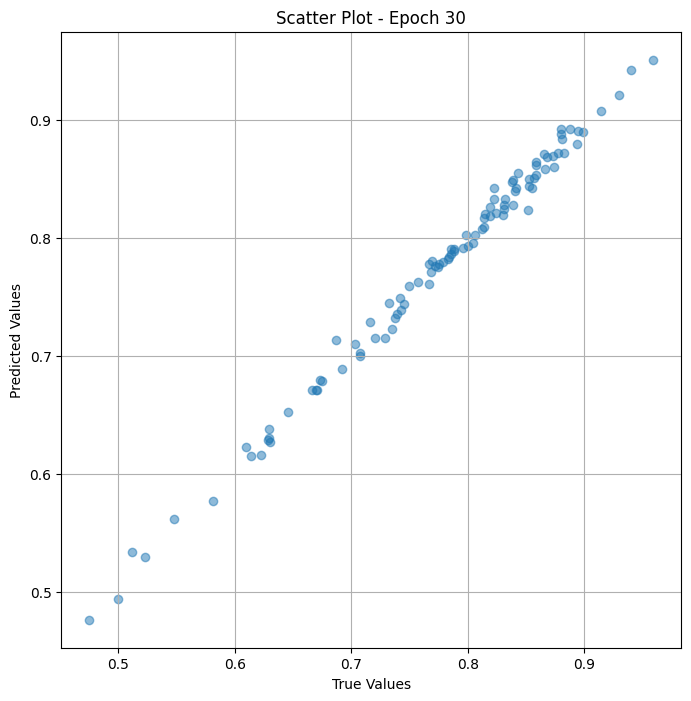

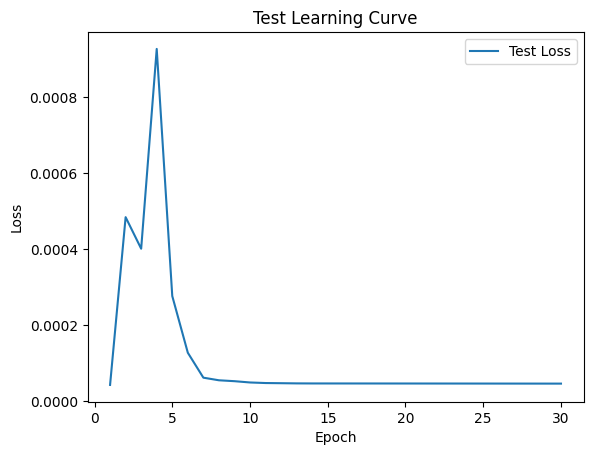

In [ ]:
# val the model and save weights
fit(30,model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds = model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_sports' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result_fine = pd.DataFrame({
    'Image Path': df_test_sports['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result_fine)

                                           Image Path  True Value  \
0   /content/sports/94ca4d01f90bef1c_preprocessed.jpg    0.715909   
1   /content/sports/f8c03a5c3f92c873_preprocessed.jpg    0.739130   
2   /content/sports/d6686aeee94c1def_preprocessed.jpg    0.580952   
3   /content/sports/4575138b6f7a9772_preprocessed.jpg    0.785714   
4   /content/sports/b8942e8ca4682cb2_preprocessed.jpg    0.742857   
..                                                ...         ...   
95      /content/sports/000000275933_preprocessed.jpg    0.629310   
96      /content/sports/000000115635_preprocessed.jpg    0.880000   
97  /content/sports/888013ce63acbff2_preprocessed.jpg    0.475248   
98  /content/sports/7f6a04e04c276070_preprocessed.jpg    0.940594   
99  /content/sports/cb015f171d060a5f_preprocessed.jpg    0.813725   

    Predicted Value  
0          0.721317  
1          0.743483  
2          0.617140  
3          0.780205  
4          0.758551  
..              ...  
95         0.6851

# ทดสอบกับรูปอื่นๆ

In [ ]:
model = Resnet_model_test_res_vehicle()
image = Image.open("/content/animal/000000002066.jpg")

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data = preprocess(image)

# Add batch dimension as the model expects a batch
input_data = input_data.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model = Resnet_model_test_res_vehicle()
memorability = model(input_data)

print(f"Estimated memorability: {memorability}")



Estimated memorability: tensor([[0.4737]], grad_fn=<SigmoidBackward0>)
